In [49]:
%load_ext autoreload
%autoreload 2
from notebook import *
# if get something about NUMEXPR_MAX_THREADS being set incorrectly, don't worry.  It's not a problem.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<div class="namebox">    
Double Click to edit and enter your

1.  Shayan Nikfar
2.  A16585115
3.  snikfar@ucsd.edu
    
</div>

<div style=" font-size: 300% !important;
    margin-top: 1.5em;
    margin-bottom: 1.5em;
    font-weight: bold;
    line-height: 1.0;
    text-align:center;">Lab 4: The Memory Hierarchy (Part II)</div>


This lab is a continuation of the previous lab.  While that lab focused on the basics of cache-aware programming and spatial locality, this lab will focus more on temporal locality and how you can modify your programs to maximize it.

As a reminder, between these two labs, you'll learn about the concepts of:

1.  Memory alignment
2.  Thinking in cache lines
3.  Working sets
4.  The cache hierarchy
5.  The impact of miss rate on performance
6.  The role of the TLB in determining performance 
7.  Spatial locality
8.  Temporal locality
9.  Cache-aware optimizations
10.  The impact of data structures on memory behavior

Along the way, we'll address several of the "interesting questions" we identified in the first lab, including:

* Why does increasing the size of array change `CPI`? And why does this change occur so quickly?
* How and why do the datatypes we use change `IC` and  `CPI`?
* Why does the order in which the program performs calculations affect `CPI`?

This lab includes a programming assignment. 

Check the course schedule for due date(s).

# FAQ and Updates

* There are no updates, yet.

# Additional Reading

If you want to learn _a lot_ more about optimizing matrix multiply, try this paper:  https://www.cs.utexas.edu/~flame/pubs/GotoTOMS_revision.pdf

# Before You Do Anything Else

Run this cell.  It'll fix your git repo history so you can successfully merge in updates

In [176]:
!./fix-repo

fatal: remote upstream already exists.


# Browser Compatibility

We are still working out some bugs in some browsers.  Here's the current status:

1.  Chrome -- well tested.  Preferred option. **Required for Moneta**
2.  Firefox -- seems ok, but not thoroughly tested.
3.  Edge -- seems ok, but not thoroughly tested.
4.  Safari -- not supported at the moment.
5.  Internet Explorer -- not supported at the moment.

At the moment, the authentication step must be done in Chrome.  You usually _will not_ have to re-authenticate between labs, so if things work OK for the first, things will probably work here. 

# About Labs In This Class

_This section is the same in all the labs.  It's repeated here for your reference._

Labs are a way to **learn by doing**.  This means you _must_ **do**.  I have built these labs as Jupyter notebooks so that the "doing" is as easy and seamless as possible.

In this lab, what you'll do is answer questions about how a program will run and then compare what really happened to your predictions.  Engaging with this process is how you'll learn.  The questions that the lab asks are there for several purposes:

1.  To draw your attention to specific aspects of an experiment or of some results.
2.  To push you to engage with the material more deeply by thinking about it.
3.  To make you commit to a prediction so you can wonder why your prediction was wrong or be proud that you got it right.
4.  To provide some practice with skills/concepts you're learning in this course.
5.  To test your knowledge about what you've learned.

The questions are graded in one of three ways:

1. "Correctness" questions require you to answer the question and get the correct answer to get full credit.
2. "Completeness" questions require you to answer the question.
3. "Optional" questions are...optional.  They are there if you want to go further with the material.

Some of the "Completeness" problems include a solution that will be hidden until you click "Show Solution".  To get the most from them, try them on your own first.

Many of the "Completeness" questions ask you to make predictions about the outcome of an experiment and write down those predictions.  To maximize your learning, think carefully about your prediction and commit to it.  **You will never be penalized for making an incorrect prediction.**

You are free to discuss "Completeness" and "Optional" questions with your classmates.  You must complete "Correctness" questions on your own.

If you have questions about any kind of question, please ask during office hours or during class.

## How To Succeed On the Labs

Here are some simple tips that will help you do well on this lab:

1.  Read/skim through the entire lab _before_ class.  If something confuses you, you can ask about it.
2.  Start early.  Getting answers on edstem/piazza can take time.  So think through the lab questions (and your questions about them) carefully.
    1. Go through the lab once (several days before the deadline), do the parts that are easy/make sense
    2. Ask questions/think about the rest
    3. Come back and do the rest.
3.  Start early.  The DSMLP cluster gets busy and slow near deadlines.  "The cluster was slow the night of the deadline" is not an excuse for not getting the lab done and it is not justification for asking for an extension.
4.  Follow the guidelines below for asking answerable questions on edstem/piazza.

You may think to yourself: "If I start early enough to account for all that, I'd have to start right after the lab was assigned!"  Good thought!

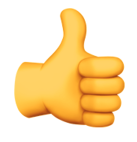


<div class="alert alert-block alert-danger">

**The Cluster Will Get Slow** DSMLP and our cloud machines will get crowded and slow _before every deadline_.  This is completely predictable.  DSMLP can also get crowded due to deadlines in other courses.  You need to start early so you can avoid/work around these slowdowns.  Unless there's some kind of complete outage, we will not grant extensions because the servers are crowded.
    
</div>

## Getting Help

You might run into trouble while doing this lab.  Here's how to get help:

1.  Re-read the instructions and make sure you've followed them.
2.  Try saving and reloading the notebook.
3.  If it says you are not authenticated, go to the [the login section of the lab](#Logging-In-To-the-Course-Tools) and (re)authenticate.
4.  If you get a `FileNotFoundError` make sure you've run all the code cells above your current point in the lab.
4.  If you get an exception or stack dump, check that you didn't accidentally modify the contents of one of the python cells.
5.  If all else fails, post a question to edstem/piazza.

## Posting Answerable Questions on Edstem/Piazza

If you want useful answers on edstem/piazza, you need to provide information that is specific enough for us to provide a useful answer.  Here's what we need:

1.  Which part of which lab are you working on (use the section numbers)?
2.  Which problem (copy and paste the _text_ of the question along with the number).

If it's question about instructions:

1.  Try to be as specific as you can about what is confusing or what you don't understand (e.g., "I'm not sure if I should do _X_ or _Y_.")

If it's a question about an error while running code, then we need:

1.  If you've committed anything, your github repo url.
2.  If you've submitted a job with `cse142` you _must_ provide the job id.  It looks like this: `544e0cf2-4771-43c3-86f8-1c30d7af601f`.  With the id, we can figure out just about anything about your job.  Without it, we know nothing.
3.  The _entire_ output you received.  There's no limit on how long an edstem/piazza post can be.  Give us all the information, not just the last few lines.  We like to scroll!

For all of the above **paste the text** into the edstem/piazza question.  Please **do not provide screen captures**.  The course staff refuses to type in job ids found in screen shots.


<div class="alert alert-block alert-danger">

**We Can't Answer Unanswerable Questions** If you don't follow these guidelines (especially about the github repo and the job id), we will probably not be able to answer your question on edstem/piazza.  We will archive it and ask you to re-post your question with the information we need.
    
</div>

## Keeping Your Lab Up-to-Date

Occasionally, there will be changes made to the base repository after the
assignment is released.  This may include bug fixes and updates to this document.  We'll post on piazza/edstem when an update is available.

In those cases, you can use the following commands to pull the changes from upstream and merge them into your code.  You'll need to do this at a shell.  It won't work properly in the notebook.  Save your notebook in the browser first.


First, you need to run the `./fix-repo` in the cell at the top of this section.  After that you can run  

```
./pull-updates
```

at a terminal.

Then, reload this page in your browser.

## Editing Code

For programming assignments, it can be nice to use an editor other than the jupyter notebook editor.  Below are some student-provided instructions for using various editors with datahub.  These are supported, but if you provide feedback about them, we'll try to update and improve them.

### VSCode

1. Install the “SSH-Remote” extension in VS Code
2. Open the Command Palette in VS Code
3. Type “remote-ssh” and click “Remote-SSH: Connect current window to host”
4. It should ask you to put in the command: ssh {your_username}@dsmlp-login.ucsd.edu
5. If it asks for fingerprint authorization or something similar, accept
6. It should then ask for your password (your ucsd.edu email password)
7. Once logged in, click "Open Folder" in the file explorer sidebar
8. Open the folder pertaining to the lab you are working on


## How To Use This Document

You will use Jupyter Notebook to complete this lab.  You should be able to do much of this lab without leaving Jupyter Notebook.  The main exception will be some of the programming assignments.  The instructions will make it clear when you should use the terminal.

### Logging In

If you haven't already, you can go to [the login section of the lab](#Logging-In-To-the-Course-Tools) and follow the instructions to login into the course infrastructure.

### Running Code

Jupyter Notebooks are made up of "cells".  Some have Markdown-formatted text in them (like this one).  Some have Python code (like the one below).

For code cells, you press `shift-return` to execute the code.  Try it below:

In [36]:
print("I'm in python")

I'm in python


Code cells can also execute shell commands using the `!` operator.  Try it below:

In [37]:
!echo "I'm in a shell"

I'm in a shell


### Telling What The Notebook is Doing

The notebook will only run one cell at a time, so if you press `shift-return` several times, the cells will wait for one another.  You can tell that a cell is waiting if it there's a `*` in the `[]` to the left the cell:

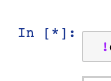


You'll can also tell _where_ the notebook is executing by looking at the table of contents on the left.  The section with the currently-executing cell will be red:

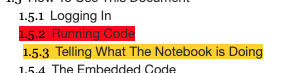

### What to Do Jupyter Notebook It Gets Stuck

First, check if it's actually stuck: Some of the cells take a while, but they will usually provide some visual sign of progress.  If _nothing_ is happening for more than 10 seconds, it's probably stuck.

To get it unstuck, you stop execution of the current cell with the "interrupt button":

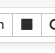

You can also restart the underlying python instance (i.e., the confusingly-named "kernel" which is not the same thing as the operating system kernel) with the restart button:

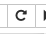

Once you do this, all the variables defined by earlier cells are gone, so you may get some errors.  You may need to re-run the cells in the current section to get things to work again.

You can also try reloading the web page.  That will leave Python kernel intact, but it can help with some problems.

### Common Errors and Non-Errors

1.  If you get `sh: 0: getcwd() failed: no such file or directory`, restart the kernel.
2.  If you get `INFO:MainThread:numexpr.utils:Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.`.  It's not a real error.  Ignore it. 
3.  If you get a prompt asking `Do you want to cancel them and run this job?` but you can't reply because you can't type into an output cell in Jupyter notebook, replace `cse142 job run` with `cse142 job run --force`. (see useful tip below.)
4.  If you get an `Error: Your request failed on the server: 500 Server Error: Internal Server Error for url=http://cse142l-dev.wl.r.appspot.com/file`, trying running the job again.
5.  Sometimes `cse142 job run` will just sit there and seemingly do nothing.  Weirdly, interrupting the kernel (button above) seems to jolt it awake and cause it to continue.
6.  If you get an error like this, stop your datahub server and restart it.

![image.png](attachment:image.png)

7. If you get `http.cookiejar.LoadError: '/home/youruserrname/.djr-cookies.txt` does not look like like a Netscape format cookies file.` remove the file and re-authenticate.
8.  The table of contents disappears and/or the questions are not highlighted like they usually are.  Do this:    
    1.  Go to the file browser in jupyter
    2.  At the top, there is tab labeled "Nbextensions".  Click on it.
    3.  find "Table of Contents (2)".  It should be checked.  Un check it, and check it again.
    4.  Click the "refresh button" (circular arrows)at upper right.
    5. Reload your notebook.
9.  You produce too much output from a program and your notebook refuses to open because it's too big.  Try
    1.  Backup up your notebook!
    2.  This will work, but it will clear _all_ your output: https://stackoverflow.com/a/47774393/3949036
    3.  You can open the notebook file in a text editor and remove the output manually.
    

### Useful Tips

1.  If you need to edit a cell, but you can't you can unlock it by pressing this button in the tool bar (although you probably shouldn't do this because it might make the lab work incorrectly.  A better choice is to copy and paste the cell, _and then_ unlock the copy):
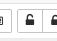

### The Embedded Code

The code embedded in the lab falls into two categories:

1.  Code you need to edit and understand.
2.  Code that you do not need to edit or understand -- it's just there to display something for you.

For code in the first category, the lab will make it clear that you need to study, modify, and/or run the code.  If we don't explicitly ask you to do something, you don't need to.

Most of the code in the second category is for drawing graphs.  You can just run it with shift-return to the see the results.  If you are curious, it's mostly written with `Pandas` and `matplotlib`. The code is all in `notebook.py`.   These cells should be un-editable.  However, if you want to experiment with them, you can copy _the contents_ of the cell into a new cell and do whatever you want (If you copy the cell, the copy will also be uneditable).

<div class="alert alert-block alert-info">

**Most Cells are Immutable** Many of the cells of this notebook are uneditable. The only ones you should edit are some of the code cells and the text cells with questions in them.
</div>

<div class="alert alert-block alert-info">

**Pro Tip** The "carrot" icon in the lower right (shown below) will open a scratch pad area.  It can be a useful place to do math (or whatever else you want.
    
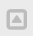
</div>

### Showing Your Work

Several questions ask you to show your work for calculations.  We don't need anything fancy.  Many of the questions ask you to compute something based on results of an experiment.  Your experimental results will be different than others', so your answer will be different as well.

To make it possible to grade your work (and give you partial credit), we need to know where your answer came from.  This why you need to show your work.  For instance this would be fine as answer to "On average, how many weeks do you have per lab?":

```
Weeks in quarter/# of labs = 5/5 = 1 week/lab
```

2 significant figures is sufficient in all cases, but you can include more, if you want.

If you are feeling fancy, you can use LaTex, but it's not at all required.

When it's appropriate, you can also paste in images.  However, Jupyter Notebook is flaky about it.  Save your notebook by clicking the disk icon:

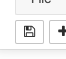

### Answering Questions

Throughout this document, you'll see some questions (like the one below).  You can double click on them to edit them and fill in your answer.  Try not to mess up the formatting (so it's easy for us to grade), but at least make sure your answer shows up clearly.  When you are done editing, you can `shift-return` to make it pretty again.

A few tips, pointers, and caveats for answering questions:

1. The answers are all in [github-flavored markdown](https://guides.github.com/features/mastering-markdown/) with some html sprinkled in.  Leave the html alone.
2. Many answers require you to fill in a table, and many of the `|` characters will be missing.  You'll need to add them back.
3. The HTML needs to start at the beginning of a line.  If there are spaces before a tag, it won't render properly.  If you accidentally add white space at the beginning of a line with an html tag on it, you'll need to fix it.
4. Text answers also need to start at the beginning of a line, otherwise they will be rendered as code.
5. Press `shift-return` or `option-return` to render the cell and make sure it looks good.
6. There needs to be a blank line between html tags and markdown.  Otherwise, the markdown formatting will not appear correctly.


You'll notice that there are three kinds of questions: "Correctness", "Completeness", and "Optional".  You need to provide an answer to the "Completeness" questions, but you won't be graded on its correctness.  You'll need to answer "Correctness" questions correctly to get credit.  The "Optional" questions are optional.

# Logging In To the Course Tools

    
In the course you will use some specialized tools to let you perform detailed measurements of program behavior.  To use them you need to login with your `@ucsd.edu` email address using the instructions below. **You need to use the email address that appears on the course roster.  That's the email address we created an account for.  In almost all cases, this is your `@ucsd.edu` email address.**

You'll do this periodically when you get an error about not being authenticated.  You can return to this notebook (or any other of the lab notebooks) to login at any time.

Here's what to do:

1.  Enter your `@ucsd.edu` email address in quotes after `login` below.  It'll take a few seconds to load.
2.  Click the google "G" login button below and login with your `@ucsd.edu` email address. 
3. **Click the google button regardless of whether it says "sign in" or "signed in".  Then be sure to select your `@ucsd.edu account` if it shows you multiple google acocunts**
4. You'll see a very long string numbers an letters appear above.  Click "Copy it" to copy it.

**Note:** If it doesn't give you a choice about which account to log into and authentication fails, that means you are logged into a single Google account and that account is _not_ your `@ucsd.edu` account.  You'll have to log into your `@ucsd.edu` through Gmail or through Chrome's account manager and then try again.

<div class="alert alert-block alert-danger">

**Use Chrome** The login process doesn't seem to work properly with Safari or Firefox.  Use Chrome to login.  You can use any of the other compatible browsers you want for the doing the rest of the lab, and it should be fine.

</div>



In [192]:
login("snikfar@ucsd.edu") 


Next step:  Paste it below between the quote marks.  Press `shift-return`.

In [193]:
token("eyJhbGciOiJSUzI1NiIsImtpZCI6IjQwMmYzMDViNzA1ODEzMjlmZjI4OWI1YjNhNjcyODM4MDZlY2E4OTMiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJhY2NvdW50cy5nb29nbGUuY29tIiwiYXpwIjoiMjgwMzY3MjAzNDk1LWdzczA1cGtzN2o3MDExYmhhODl0YWg2NzRrbDVicDV1LmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwiYXVkIjoiMjgwMzY3MjAzNDk1LWdzczA1cGtzN2o3MDExYmhhODl0YWg2NzRrbDVicDV1LmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwic3ViIjoiMTA0Njg3NzQzMDk2NzAyMDk2NDE2IiwiaGQiOiJ1Y3NkLmVkdSIsImVtYWlsIjoic25pa2ZhckB1Y3NkLmVkdSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJhdF9oYXNoIjoiYnViNk5JRXZBVTV0TUduLVRNT2UyQSIsIm5hbWUiOiJTaGF5YW4gTmlrZmFyIiwicGljdHVyZSI6Imh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9hL0FJdGJ2bW1oTWQ0Z1JsOXpTWXZfU3pLMm9hZG9fZmgxZG1WeEtGcFJDSHVHPXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6IlNoYXlhbiIsImZhbWlseV9uYW1lIjoiTmlrZmFyIiwibG9jYWxlIjoiZW4iLCJpYXQiOjE2NjE1NTk1OTQsImV4cCI6MTY2MTU2MzE5NCwianRpIjoiM2E3ZDEzMDJiZWM5NjRmNzk3ZDRkOWU4OTE2NGFlNGNjZTU2NmQwOCJ9.JXaKXMJKxqbwNGcbURlq5Srkam9FtdDYPVEtssYDggzsQCvr7MYv20PGozUcpRAHeSwIXSmN-IiIg5BTP3gVUYrl9DleXvC8AbEi16PhypkSCLigApUv89ofF-c7c5D17C0zjv_KxT9RJYT7qrAgqB1pFVnsmE9gO1cZ2R3eSVoQEacrTQMoDJe6PZNr4QCq7nsMZVTtjLgnRX-2Cz0NaSjFbbdR77KQbZ12LEG8oNkeZJOl4RLVjSj2xXyyr8gUlMQAkbxmQjShSHXmr_Q0blzTUIX5FYLecDagMzhNtERT6VhBScyo8f7Vf8cu6hOlgv1vjEhuPLLGMhyU0Xm_YA")


You are authenticated as snikfar@ucsd.edu



It should have replied with

``` 
You are authenticated as <your email>
```

You are now logged in!  Try submitting a job: 

In [194]:
!cse142 job run "echo Hello World"

You are submitting a job for lab "Lab 4: Caches II" (caches2).
The due date for Lab 4: Caches II has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job 57dd431e-f888-4a7b-b190-2f0932b37c3d 0.00 0.00
Ready for submission. 3.04 3.04
Job 57dd431e-f888-4a7b-b190-2f0932b37c3d is in state 'PUBLISHED'. 2.06 5.09 
Job 57dd431e-f888-4a7b-b190-2f0932b37c3d is in state 'RUNNING'. 1.05 6.14. 
Job 57dd431e-f888-4a7b-b190-2f0932b37c3d is in state 'DONE_RUNNING'. 2.09 8.23.. 
Job 57dd431e-f888-4a7b-b190-2f0932b37c3d succeeded. 3.14 11.37Writing results 1.00 12.37
Hello World
Updated these files: 
Job Complete 0.47 12.85


If you see "Hello World", you're all set.  Proceed with the lab!

<div class="alert alert-block alert-danger">

Delete your token from the above cell. Because your token is esssentially your username and password combined, you should treat it like a password or ssh private key.  **Sharing your token with another student or posessing another student's token is an AI violation**.
</div>

# Grading

Your grade for this lab will be based on the following components

| Part                       | value |
|----------------------------|-------|
| Jupyter Notebook           | 48%   |
| Programming Assignment     | 50%   |
| Post-lab survey.           | 2%    |

No late work or extensions will be allowed.

We will grade 5 of the "completeness" problems.  They are worth 3 points each.  We will grade all of the "correctness" questions.

You'll follow the directions at the end of the lab to submit the lab write up and the programming assignment through gradescope. 

Please check gradescope for exact due dates.

# Temporal Locality

In the last lab, we examined the notion of spatial locality in detail.  Now, we will turn to temporal locality.

Temporal locality exists when a program accesses the same memory multiple times within a short time.  Caches exploit temporal locality by holding on to data that has been accessed recently.  If the processor accesses it again, the cache can provide it very quickly.

With spatial locality, it was pretty easy to predict the cache miss rate for a simple loop that performs stride-based accesses (see below).  With temporal locality it is harder because of associativity and conflicts.  Before we dive into that, let's have quick refresher about how caches work (if this is fuzzy, go back and the review the slides and/or readings).

When a memory operation (load or store) accesses a memory location, $A$, the cache breaks $A$'s address into three parts: 

| tag | index | offset | 
|-----|-------|--------|
| the remaining bits | `log2(# of associative sets)` | `log2(cache line size)`|

Together, the tag and the index of $A$ are a unique name (or number) for the cacheline-sized (and cacheline size-aligned) piece of memory that contains $A$.  The index of $A$ tells that cache which associative set might contain that cache line.

The cache can then check that set to see if $A$ is present.  If it is, it's a hit.  If not, it's a miss, and the cache will choose one of the lines in the set to evict to make room for $A$'s cache line.

There are two important things to note:

1.  $A$'s cacheline is in the cache if and only if, it is in the associative set corresponding to its index (it can never be in another associative set).
2.  There are many, many other cache lines that also "live" in $A$'s associative set.

The L1 data cache in our processor is 32kB, with 64-byte lines, and it's 8-way set associative. So, there are 32,768/64 = 512 cache lines arranged in 512/8 = 64 associative sets.  If the machine has 16GB of memory, it has 256-Million cache lines of main memory.  So, there are about 4 million cache lines that "live" in each associative set.  Clearly, there is plenty of opportunities for conflicts.

To see how temporal locality plays out in practice, here's the same code we looked at in the last lab:

In [195]:

t = fiddle("stride.cpp", function="stride", name="spatial", opt="-O1",
code=r"""
#include"pin_tags.h"
#include"CNN/tensor_t.hpp"
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* stride(uint64_t * data, uint64_t size, uint64_t arg1) {
    tensor_t<uint32_t> t(size,1,1,1, (uint32_t *)data);
    TAG_START("init", t.data, &t.as_vector(t.element_count()), true);

    for(uint i = 0; i < arg1; i++) {
        for(uint x = 0; x < size; x+=arg1) {
            t.get(x,0,0,0) = x;
        }
    }
    
    TAG_STOP("init");
    return data;
}

FUNCTION(one_array_1arg, stride);
""")
compare([t.source, t.cfg])

Compiling your code...
make build/stride.s build/stride.so C_OPTS='-O1' fiddle.exe 
make: 'build/stride.s' is up to date.
make: 'build/stride.so' is up to date.
make: 'fiddle.exe' is up to date.

Done running.
Building representations
sym.stride
sym.stride
Done build representations.


We are going to run it again with a fixed stride of 16 elements (64 bytes -- our cache line size) and we will vary `size` between 1024 and 16,384 (16 * 1024).  This corresponds to region of memory between 4kB and 128kB.  Setting the stride to the cache line size ensures that our access stream has very little _spatial_ locality, since every access will refer to a different cache line.

<div class="question completeness">

<div class="question-text">
    
Given the conditions described above, estimate the _number of cache misses_ that will occur for `size = 1024`, `size = 4096`, and `size = 16384`.  Assume we run `stride()` 10,000 times with the same values of `data` and `size`.

</div>
    
<div class="answer">
    
**Cache misses for size = 1024: 64**

**Cache misses for size = 4096:  256**

**Cache misses for size = 16384: 163840000**
    
</div>
</div>

<div class="solution">

With `size = 1024`, the data occupies 4kB or 64 cache lines.  The first time we access each cache line in the inner loop of `stride`, we can expect a cache miss, so that's 64 misses.  Notably, each of these will land in a _different_ associative set.  After those 64 misses, however, there shouldn't be any more:  Our code doesn't access any other memory, so those 64 cache lines should remain in the cache. 

With `size = 4096`, the data occupies 256 cache lines, which should result in 256 misses.  This time, we will use $256/64 = 4$ cache lines in each associative set. There's still plenty of room left in the cache, so we shouldn't expect any more misses.
    
Moving to `size = 16384` will change things:  Now we have 1024 cache lines, which is twice as many as our cache can hold.  On the first iteration of the inner loop, we will take a cache miss and bring a cache line into the cache at some index, $N$.  During the first 511 iterations of the inner loop, we will touch 511 more cache lines, incurring a total of 512 misses, and occupying all 8 cache lines in each of the 64 associative sets.  On the 513th iteration, the cache will have to evict a line at index $N$.  Then, over the next 511 iterations we will evict _everything_ in the cache, incurring a total of 1024 cache misses. 

During the next iteration of the outer loop (`arg1`) will repeat this process 16 times for `16*1024 = 16,384` misses per call to `stride`.   We call `stride` 10,000 times for `16,384*10,000 = 163,840,000`  cache misses.

</div>

Run the cells below to see how your prediction played out.

In [43]:

t = fiddle("stride.cpp", function="stride", name="temporal", run=["perf_count"], tagged_only=True, opt="-O1", 
           cmdline=f"--size 1024 2048 4096 8192 16384 32768 --arg1 16 --iters 10000", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")
# compare([t.source, t.cfg]) # Uncomment this line to see the code again.

Compiling your code...
make build/stride.s build/stride.so C_OPTS='-O1' fiddle.exe 
make: 'build/stride.s' is up to date.
make: 'build/stride.so' is up to date.
make: 'fiddle.exe' is up to date.

Running your code for perf_count...
Executing: ./fiddle.exe --lib ./build/stride.so --function stride --tag-functions false --stats temporal.csv --stat-set L1.cfg --MHz 3500 --size 1024 2048 4096 8192 16384 32768 --arg1 16 --iters 10000
You are submitting a job for lab "Lab 4: Caches II" (caches2).
The due date for Lab 4: Caches II has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job 680567ea-2010-4d3b-ac43-fc7b147670eb 0.00 0.00
Ready for submission. 3.10 3.10
Job 680567ea-2010-4d3b-ac43-fc7b147670eb is in state 'PUBLISHED'. 3.81 6.91 
Job 680567ea-2010-4d3b-ac43-fc7b147670eb is in state 'RUNNING'. 1.05 7.96.. 
Job 680567ea-2010-4d3b-ac43-fc7b1

,function,size,arg1,IC,CPI,L1_MPI,L1_cache_misses
0,stride,1024,16,74190754,0.227534,0.000003,253
1,stride,2048,16,145870759,0.246570,0.000003,479
2,stride,4096,16,289230789,0.230815,0.000006,1608
3,stride,8192,16,575950850,0.225932,0.002048,1179751
4,stride,16384,16,1149391152,0.430348,0.142520,163810916
5,stride,32768,16,2296271753,0.523765,0.142700,327678770


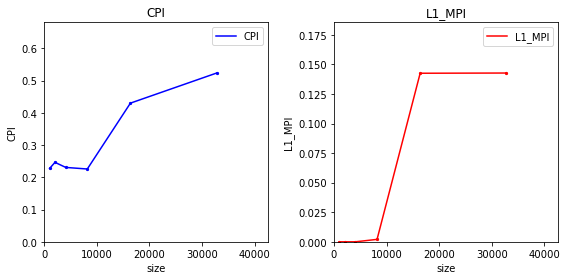

In [44]:
display(render_csv("temporal.csv", columns=["function","size", "arg1", "IC", "CPI", "L1_MPI","L1_cache_misses"]))
plotPE("temporal.csv", lines=True, what=[ ('size', 'CPI'), ("size", 'L1_MPI')])

<div class="question completeness">

#### How well do your predictions match the results?
  
<div class="answer">
    it was not really accurate but it was really close to the actual values
</div>
</div>

<div class="solution">

For small sizes, agreement is not great.  We predicted 64 misses at `size=1024` and 256 at `size=4096` but we have a few hundred. This is fine, there's other stuff going on and the L1_MPI is still very, very low.
    
Our prediction at `size = 16384` is much better. 
    
The `size=8196` is interesting. It should exactly fit, but we have a lot more misses.  This is because there's other stuff in memory (e.g., the stack) and the tensor should just barely fit.   However, while get ~1000x more misses than at `size=4096`, `L1_MPI` is still quite low and `CPI` doesn't change at all.
    
</div>

Moneta has a simple cache simulator built into that can estimate how a cache will behave and let us visualize the results.  It models a fully-associative cache.  Run the next two cells to see.

In [196]:

t = fiddle("stride.cpp", function="stride", name="temporal", run=["moneta"], tagged_only=False, opt="-O1", 
           cmdline=f"--size 1024 4096 16384 --arg1 16 --iters 1", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500 --calc misses_per_iter=L1_cache_misses/iterations")

Compiling your code...
make build/stride.s build/stride.so C_OPTS='-O1' fiddle.exe 
make: 'build/stride.s' is up to date.
make: 'build/stride.so' is up to date.
make: 'fiddle.exe' is up to date.

Running your code for moneta...
Executing: ./fiddle.exe --lib ./build/stride.so --function stride --size 1024 4096 16384 --arg1 16 --iters 1
Running: /cse142L/CSE141pp-Tool-Moneta-Pin/pin.sh -ifeellucky -injection child  -t /cse142L/CSE141pp-Tool-Moneta-Pin/source/tools/ManualExamples/obj-intel64/trace_tool.so -name temporal -file_count 1 -cache_lines 512 -block 64 -start main -ol 10000000  -skip 0 -- ./fiddle.exe --lib ./build/stride.so --function stride --size 1024 4096 16384 --arg1 16 --iters 1
Done running.
Building representations
sym.stride
sym.stride
Done build representations.


 In the plots, compulsory misses are light blue, hits are purple, and capacity misses are gold.
 
 The green line on the y-axis shows the size of the L1 cache (32kB), and the large blocks are the accesses for `size = 1024`, `size = 4096`, and `size = 16k`. 

In each block, each upward-slanting line is one iteration through the outer loop (they are probably blurred together for 1024), and if you zoom in you can see that the stride is 64 bytes (try it!).  As you can see, when the region of memory is larger than the cache, the whole block turns gold instead of purple.

This is a good chance to use Moneta's measurement tool: Click on the ruler icon above the Moneta graph and use it to select the the middle block of accesses.   A display on the right will open up with some statistics about that region of the plot:

![Measuring with the ruler tool](img/measuring.gif)

The "Cache Measurement" heading provides information about the cache that Moneta is simulating.  Under "current selected area", you can see that the selected area contains accesses to 256 distinct cache lines.  You can also see the cache miss rate for that area.

In [177]:

show_trace("./temporal_0.hdf5", show_tag=["init0","init1","init2"], layer_preset=["misses-compulsory-all", "misses-all", "hits-all"])

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

<div class="question completeness">

<div class="question-text">
    
How many distinct cache lines are accessed with `size = 16384`? Use the measurement tool to check.
    
</div>

<div class="answer">
    256
    
    

</div>

</div>

<div class="solution"> 

I got 1021, but it's probably actually 1024.

</div>

Let's try another experiment and increase the stride by 4x to 64 element (256 bytes) while using `1024`, `4096`, and `16384` for `size`.

<div class="question completeness">

<div class="question-text">

How will increasing the stride to 64 affect the number of misses when `size = 16384`?
    
</div>
    
<div class="answer"> 
    it will reduce them

</div>
</div>

<div class="solution"> 
    
Let's see what happens:
</div>

In [ ]:
t = fiddle("stride.cpp", function="stride", run=["moneta"], tagged_only=False, opt="-O1", 
           cmdline=f"--size 1024 4096 16384 --arg1 64 --iters 1", 
           perf_cmdline="--stat-set L1.cfg --MHz 1900 --calc misses_per_iter=L1_cache_misses/iterations")
show_trace("./stride_0.hdf5", show_tag=["init0","init1","init2"], layer_preset=default_layers)

<div class="_solution">

Here's a screen cap if Moneta is too slow.
    
![image.png](img/Q4.png)
    
Everything is purple!  Use the measurement 
    to see how many individual cachelines are accessed when `size = 16384` (the right-most block of accesses).  You should find that it can now fit comfortably in the cache.
</div>

<div class="question correctness points-2">

<div class="question-text">

Why did increasing the stride size reduce the cache miss rate even though `size` remained the same?</div>

<div class="answer">
    The reason is that it is more likely to save more bytes

</div>

</div>

# Working Sets

In lecture you heard about the "working set" of an application, and the notion of a working set is deeply tied to temporal locality.
The working set is the _portion of memory that the program is currently using_.  The connection between working sets and temporal locality lies in the word "currently" since that refers to a period of time.  In essence, the working set is the set of cache lines that a program accesses repeatedly over a period of time.

One thing to note:  Without reuse, there can be no temporal locality.  A single access to a cache line has no temporal locality.

Generally speaking, there will be fewer cache misses (and performance will be faster) if the working set fits in the L1 cache (or failing that, in the L2 cache).

To illustrate how working set size influences cache behavior, we'll use the `set` container object from the C++ standard template library.  Internally, `set` is implemented as a red-black binary tree.  The code below creates an `std::set` and then fills it with 4096 pseudo-random (and non-repeating) `uint64_t` values using `insert()` and then performs a bunch of queries with `find()`.  The crazy `&(*a), &(*a)+ 1` is just to set the bounds for the Moneta tag so we know where the `set` lives in memory.  Run the cell, and it'll open up the resulting trace in Moneta.

## One Data Structure

In [117]:

working = fiddle("working.cpp", function="working", opt="-O1",
code=r"""
#include"pin_tags.h"
#include"function_map.hpp"
#include"archlab.hpp"
#include<set>
#include<cstdint>

extern "C"
uint64_t* working(uint64_t * data, uint64_t size, uint64_t arg1) {
    auto s = new std::set<uint64_t>();
    uint64_t seed = 1;

    TAG_START("build", (void*)-1, 0, true);
    for(uint x = 0; x < size; x++) {
        auto t = fast_rand(&seed);
        s->insert(t);
        auto a = s->find(t);
        TAG_GROW("build",  &(*a), &(*a)+ 1);
    }
    TAG_STOP("build");
    
    seed = 1;
    
    TAG_START("search", (void*)-1, 0, true);
    for(uint x = 0; x < size; x++) {
        auto a = s->find(fast_rand(&seed));
        TAG_GROW("search", &(*a), &(*a)+ 1);
    }
    TAG_STOP("search");

    TAG_START_ALL("delete", false);
    delete s;
    TAG_STOP("delete");
    return data;
}

FUNCTION(one_array_1arg, working);
""",
           run=["moneta"], name="set",
           cmdline=f"--size {4* 1024}   --iters 1")

Compiling your code...
make build/working.s build/working.so C_OPTS='-O1' fiddle.exe 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread    -O1 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/working.cpp -o build/working.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -O1 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/working.cpp -o build/working.o
g++-8 build/working.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl   -shared -o build/working.so
make: 'fiddle.exe' is up to date.

Running your code for moneta...
Executing: ./fiddle.exe --lib ./build/working.so 

In [118]:

show_trace("./set_0.hdf5", show_tag=['build','search'], layer_preset=["misses-compulsory-all", "misses-all", "hits-all"])

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

Here's a screen cap in Moneta is flaking on you.

![image.png](img/Q6.png)

You should see a big speckled, multi-colored triangle.  What you are looking at is the region of the heap that the C++ standard library is allocating to hold the set.  Since, it's a tree-based structure, it's made up of many small objects that get allocated with `new`.  The heap is allocating space starting at a low address and working upward -- hence the diagonal.

The color key is the same as above:

* Compulsory misses are light blue
* hits are purple.
* Conflict misses are gold.

If necessary, lock the X axis and then use the "hand" tool to move the triangle down so it sits on the horizontal axis. Be sure not cut off any of the triangle.

<div class="question completeness">
    
<div class="question-text">
    
Approximately how many bytes does the `set` occupy?  What's the ratio of bytes occupied to the number of values the `set` contains?  How many bytes would be needed to store the same elements in an array?  What is the light blue line along the top slope of the triangle?
    
</div>

<div class="answer"
    
**Bytes for the `set`**: 192 KB
    
**Bytes per element in the `set`: 47.6** 
    
**Bytes to store elements:** 16384
    
**What is the blue line?:** compulsory misses
     
</div>
</div>

<div class="solution">

**Bytes for the `set`**:  You can measure this with the ruler tool or "eyeball" it from the y-axis.  It's about 195kB
    
**Bytes per element in the `set`:**  The code inserts 4096 elements, so that's about `195000/4096 = 47.6`.  Which is really inefficient in terms of space!  If you ever need to store very large sets of integers, you might want to consider a different data structure.
    
**Bytes to store elements in array?:** Much less than this set is using: `4096 * 8 = 16384`.
    
**What is the blue line?:** The blue line is compulsory misses, so the cache can't help us there.  The fall on a nice line because each access to newly-allocated memory is a compulsory miss.
    
</div>

In the code, we created two tag: `build` and `search`.  The graph shows both of them.  Let's see which is which.  Click on the "Tags" drop down on the right and you'll get a list of the tags in this trace.  Clicking the check box next to the tag will hide and show the memory accesses for that tag.

![Turning tags on and off](img/tags.gif)

Use the check boxes to figure out which part of the graph is `build` and which is `search`.


Also, recall that the green line on the vertical axis is the size of the cache that Moneta is modeling.  Use the ruler tool to answer this question:

<div class="question correctness points-2">
    
<div class="question-text">
    
At the beginning of the build portion of the experiment what is miss rate?  When does it start to climb?  Why?

</div>
    
<div class="answer">
    
**Miss rate at the beginning?:1.75%**  
    
**WHen does it start to rise?: it starts to rise when an address above the green line gets allocated** 
    
**Why does it climb?:it is probably because of the capacity miss which happens because of accessing memory and allocating value to that after it is already full**  
    
</div>
</div>

<div class="question completeness">
    
<div class="question-text">
    
Where are hits more concentrated on the graph?  What part of the data structure do think they are accessing (think carefully about how `std::set` is implemented and accessed)?

</div>    
<div class="answer">
    
**Where are they concentrated?:** bottom of the graph 
    
**What part of the data structure are they accessing?  Be as specific as you can.: it seems like it is a part really close to the root, which it tries to access that** 
        
</div>
</div>

<div class="solution">

**Where are hits concentrated?:**  They are generally more hits near the bottom of the graph.  There's also an interesting strip of purple right under the compulsory misses during `build`.
    
**What part of the data structure are hits accessing?:**  These areas of memory correspond to the part of the tree closest to the root.  They are the "hottest" part of the tree because they are accessed very frequently:  Every insertion or query touches the root node, half of the queries touch each of the roots children, 1/4 of the queries touch each of the roots grand-children, etc.  
  
We know that each node in tree takes about 48 bytes, so the cache can hold about `32k /48 = 682` nodes.  That corresponds to the `log2(682) = 9.4` layers of a perfectly balanced binary tree (Red-black trees are not perfectly balanced, but they are pretty balanced).

Each time we query the red black tree, the code traverses about  12 levels of the tree.   However, about 9 of them will be in the cache, something like 75% of accesses should hit in the cache.   If we doubled the size of the tree to 8192 nodes, the depth only increases by one, so the hit rate will go from `9/12 = 75%` to `9/13 = 69%`.
    
In your earlier classes you learned about how trees are good for performance because have logarithmic complexity for insertion and deletion.  That's great, but their structure also provide a high degree of temporal locality because the nodes near the root are accessed so frequently.  This property is widely exploited in many different data storage systems.  For instance, databases typically store very large indexes in a tree with nodes near the root in memory (where they will be accessed quickly and frequently) and the leaves on disk (where access is slow but infrequent).
    
</div>

<div class="question optional">
    
<div class="question-text">
    
If you zoom out in the Moneta trace above, you can find the memory operations in the `delete` tag.  Then there is another column of memory accesses that touches the same area.  What is going on there?
    </div>
    
<div class="answer">
</div>
</div>

<div class="question optional">
    
<div class="question-text">
    
The STL provides another data structure: `unordered_set` that uses a hash table instead of binary tree.  Copy the code cells above, repeat this whole section with `unordered_set` instead of `set`.  See what you find. 
    
</div>
    
<div class="answer">
</div>
</div>

# The Three C's

Recall from lecture (or review the slides) that we can classify cache misses into types (known as "The Thee C's"):

1.  **Compulsory**: These misses occur because the processor has not accessed this cache line before.

2.  **Capacity**: These occur because the program is accessing more memory than the cache can hold (i.e., it's working set is bigger than the cache).

3.  **Conflict**: These occur because a given cache line of memory can only live in one of the associative sets of the cache.

## Capacity and Compulsory Misses

The our investigation of spatial locality, temporal locality, and working sets illustrated compulsory and capacity misses.

<div class="question completeness">
    
<div class="question-text">
    
Look back over the Moneta graphs in previous sections of this lab and grab screen captures of examples of compulsory and capacity misses.  Paste them below and describe why the illustrate each kind of miss.
</div>
    
<div class="answer">
    
**Compulsory**
    ![image.png](img/image1.png) 
    
**Capacity**
     ![image.png](img/image2.png) 
</div>
</div>

<div class="solution">

**Compulsory** The misses that occur in the first time through the inner loop of `stride()` are all compulsory misses.

![image.png](img/compulsory.png)

</div>

<div class="_solution">

**Capacity** In the same experiment, we saw that when the number of cachelines accessed exceeds the number of cache lines in the cache, we get many misses.  These are all capacity misses:
    
![image.png](img/capacity.png)
   
</div>

## Conflict Misses

Let's try to produce some conflict misses.  In the last lab, we used a miss machine to generate lots of misses.  They were mostly capacity misses (i.e., we accessed too many cache lines), and the miss machine let us produce lots of seemingly random accesses really fast.  For conflict misses, we need something different:  Highly-organized misses placed precisely.

The necessary ingredients for lots of conflicts misses are many memory accesses that will map to the same associative set in the cache.  If we access many of these cache lines, the associative set will "overflow" and that will causes misses.

<div class="question completeness">

<div class="question-text">
    
Assume our 32kB cache with 64-byte lines and 8-way associativity and 64-bit addresses.  Given an address $A$, how can we compute a new address, $B$, that will map to the same associative set but is not part of the same cache line as $A$?  Given an index, $i$, into an array, how can we compute the index of another element, $j$, that will conflict with the first?

</div>
<div class="answer">

**How do you compute `B`?** B=A+4096

**How do you compute `j`?** j =  i+1024

</div>
</div>

<div class="solution">

From our earlier discussion, we know we have:
    
1.  `log2(64) = 6` offset bits.
2.  `32kB/64B = 512` cache lines.
3.  `512/8 = 64` associative sets.
4.  `log2(64) = 6` index bits.
5.  `64-6-6 = 52` tag bits.

We also know that two addresses are in the same cache line if their `tag` and `index` bits match and that they map to the same associative set if they have the same `index`.  So, we need $B$ to have the same `index` but a different tag.  The first tag bit is in position `offset bits + index bits = 12`, so adding $2^{12} = 4096$  to $A$ will give $B$ a different `tag` and an identical `index`, which is just what we needed!

Computing the index of a conflicting element is easy:  We just divide $2^{12}$ by the size of the elements of the array.  For `uint32_t`, we get $2^{12}/4 = 1024$, so $j = i + 1024$.

</div>

Let's see if your formula worked.  We'll run `stride()` from early with a stride of 16 and 1024.  In the experiment below we set `--size` so that we cover 64 strides worth of the memory, since both strides are larger than cache line, each execution of the loop will touch 64 cache lines.

In [197]:


from notebook import *

t = fiddle("conflict.cpp", code="""
#include"pin_tags.h"
#include"CNN/tensor_t.hpp"
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* conflict(uint64_t * data, uint64_t size, uint64_t arg1) {
    tensor_t<uint32_t> t(size,1,1,1, (uint32_t *)data);
    TAG_START("init", t.data, &t.as_vector(t.element_count()), true);

        for(uint x = 0; x < size; x+=arg1) {
            t.get(x,0,0,0) = x;
        }
    TAG_STOP("init");
    return data;
}

FUNCTION(one_array_1arg, conflict);
""")

stride16 = fiddle("conflict.cpp",
           function="conflict", opt="-O1",
           run=["perf_count"], name="stride16",
           cmdline=f"--size {16*64} --arg1 16  --iters 10000", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")
stride1024 = fiddle("conflict.cpp",
           function="conflict", opt="-O1",
           run=["perf_count"], name="stride1024",
           cmdline=f"--size {1024*64} --arg1 1024 --iters 10000", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")

df = render_csv(["stride16.csv", "stride1024.csv"])

Compiling your code...
make build/conflict.s build/conflict.so C_OPTS='' fiddle.exe 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/conflict.cpp -o build/conflict.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/conflict.cpp -o build/conflict.o
g++-8 build/conflict.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl   -shared -o build/conflict.so
make: 'fiddle.exe' is up to date.

Done running.
Building representations
Done build representations.
Compiling your 

,size2,size3,size,arg1,tile_size,cmdlineMHz,function,iterations,rep,IC,ET,cycles,L1_cache_misses,TLB_misses,CT,CPI,realMHz,L1_MPI,TLB_MPI,Unnamed: 19
0,1048576,1048576,1024,16,64,3500,conflict,10000,0,36690791,0.003716,12917744,214,18,2.877026e-10,0.352070,3475.811222,0.000006,4.905863e-07,NaN
0,1048576,1048576,65536,1024,64,3500,conflict,10000,0,36690856,0.005640,19411387,672600,328,2.905281e-10,0.529052,3442.008038,0.018332,8.939557e-06,NaN


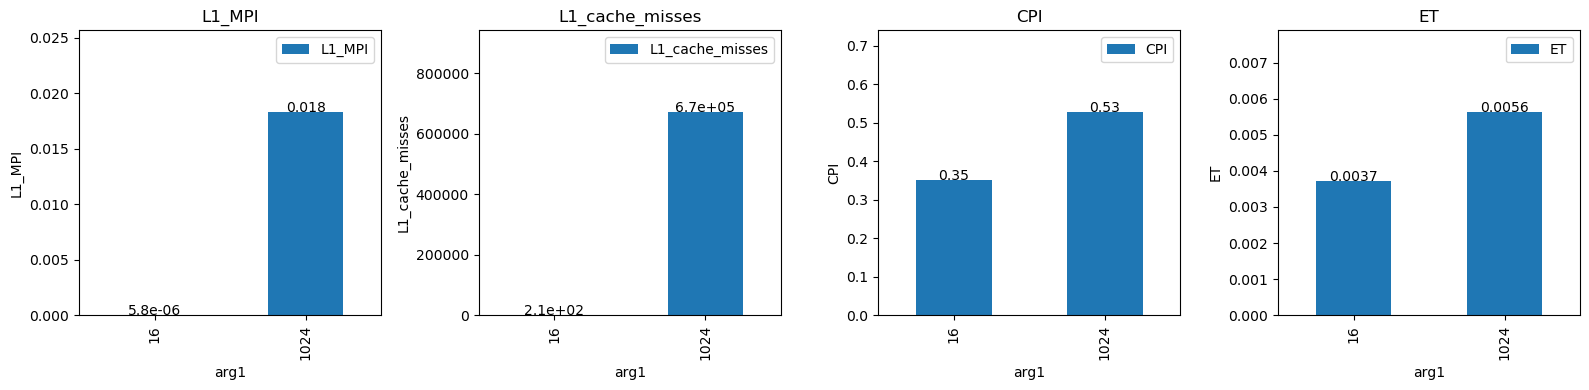

In [198]:
display(df)
plotPEBar(df=df, what=[("arg1", "L1_MPI"),("arg1", "L1_cache_misses"), ("arg1", "CPI"), ("arg1", "ET")])

<div class="question completeness">
    
<div class="question-text">
    
Based on our analysis above, what do you think will happen with if the stride is one cache line longer (1040 bytes) or or one cache line shorter (1008 bytes)?  Why?
    
</div>
    
<div class="answer">
**Stride 1008:it won't change the index or offset because all the caches line will into a single associative set**
    
**Stride 1040: adding it will change the index so the cache lines will not fall in single associative set. so cache misses would be much lower**
    
</div>
    
</div>

<div class="solution">

In the analysis analysis above, we chose 1024 because it was $2^{12}/\mathrm{sizeof(uint32\_t)}$, and we choose $2^{12}$ because that stride size would change the tag bits without changing the index bits.  And this, in turn, would cause all the cache lines to fall in a singe associative set.  A look at the binary representation of $2^{12}$ shows with this is true: `1 0000 0000 0000b`. (the `b` means binary).  Since there are no 1's in low order bits, adding $2^{12}$ won't change the index or offset.
    
For stride 1040 in an array of `uint32_t`, the number of bytes in stride is 4160:  Let's look at 4160 in binary: `1 0000 0100 0000b`.  It has 1 down there, so adding it _will_ change the index.  So, the cache lines _will not_ fall into a single associative set.  Hence, cache misses should much lower.
   
Let's see what happens:
</div>


In [ ]:
stride1008 = fiddle("conflict.cpp",
           function="conflict", opt="-O1",
           run=["perf_count"], name="stride1008",
           cmdline=f"--size {1023*64} --arg1 1008  --iters 10000", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")
stride1040 = fiddle("conflict.cpp",
           function="conflict", opt="-O1",
           run=["perf_count"], name="stride1040",
           cmdline=f"--size {1025*64} --arg1 1040 --iters 10000", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")

df = render_csv(["stride16.csv", "stride1008.csv", "stride1024.csv", "stride1040.csv"])

In [ ]:
plotPEBar(df=df, what=[("arg1", "L1_MPI"), ("arg1", "CPI"), ("arg1", "ET")])

<div class="_solution">
    
The number of misses per instruction is almost identical to the stride-16 case!
    
</div>

The main lesson here is that conflict misses are largely product of bad luck:  It may happen that for a particular cache capacity, associativity, and line size, that many cache lines in the application's working set happen to map to the same associative set.

Fortunately, in modern processors caches are pretty highly-associative (our is 8-way) and at that level of associativity conflict misses are not a huge problem.  If you working set is smaller than your cache's capacity, you'd have to be very unlucky to have enough cache lines land in the same associative set to cause many conflict misses.  As the example above shows, however, it is not hard to construct programs that are this unlucky.  We have a term for these access patterns:  We say they are "pathological".

By definition, pathological access patterns are rare, so we don't spend too much time worrying about them.  But they can crop up and it's a good idea to be aware of the possibility.

<div class="question optional">

<div class="question-text">

Consider the implementation of `tensor_t` described earlier in the lab.  Accessing a tensor column-wise produces strided accesses which could lead to conflict misses if the dimensions of the tensor are "unlucky".  Why is this so?  What constitutes "unlucky" dimensions?  How could you modify `tensor_t` make it (mostly) immune to "unlucky" dimensions?
    
</div>

<div class="answer">
    
</div>
</div>

# The L2 and L3 Caches

So far in these two labs, we have focused on the L1 cache, but our machine also has L2 and L3 caches.  Here's how they are organized:

![image.png](img/cacheorg.png)

As a reminder, the L1 is 32kB, 8-way set associative, with 64-byte lines.  So, there are 512 cache lines divided into 16 associative sets.

The L1 and L2 are private to each core while the L3 is shared among all the cores on the CPU.  We may look at the L3 in more details when we study multi-core.  For now, we will take a look at the L2.  The L2 is 256kB and is 8-way set associative.

The code below is similar to the `stride` function we used in the prevous lab.  The change is that the outer loop is setup so we do the same number of memory accesses for all values of `size` (This is why we divide by `size`).  Our goal is to measure the L1 and L2 MPI as size increases.  The CPU's performance counters don't let us collect L1 and L2 statistics at the same time, so we have to run the experiment once for each cache.

<div class="question completeness">
    
<div class="question-text">
    
As `size` increases, the miss rate for the L1 and L2 will rise.  At value of `size` would you expect to see significant increases in L1 and L2 MPI?
</div>
    
<div class="answer">

**L1 critical `size`: yes**

**L2 critical `size`: yes**
    
</div>
</div>

In [199]:

space = lambda x: " ".join(map(str, x))
L2 = fiddle("L23.cpp", function="L23", name="L2", run=["perf_count"], tagged_only=True, opt="-O1",
            code=r"""
#include"pin_tags.h"
#include"CNN/tensor_t.hpp"
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* L23(uint64_t * data, uint64_t size, uint64_t arg1) {
    tensor_t<uint32_t> t(size,1,1,1, (uint32_t *)data);
    TAG_START("init", t.data, &t.as_vector(t.element_count()), true);

    for(uint i = 0; i < (1 << 20)/size; i++) {
        for(uint x = 0; x < size; x+=arg1) {
            t.get(x,0,0,0) = x;
        }
    }
    
    TAG_STOP("init");
    return data;
}

FUNCTION(one_array_1arg, L23);
""",
           cmdline=f"--size {space([2**i for i in range(4, 20)])} --arg1 16 --iters 10000", 
           perf_cmdline="--stat-set L2.cfg --MHz 3500")

L1 = fiddle("L23.cpp", function="L23", name="L1", run=["perf_count"], tagged_only=True, opt="-O1",
           cmdline=f"--size {space([2**i for i in range(4, 20)])} --arg1 16 --iters 10000", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")

Compiling your code...
make build/L23.s build/L23.so C_OPTS='-O1' fiddle.exe 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread    -O1 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/L23.cpp -o build/L23.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -O1 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/L23.cpp -o build/L23.o
g++-8 build/L23.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl   -shared -o build/L23.so
make: 'fiddle.exe' is up to date.

Running your code for perf_count...
Executing: ./fiddle.exe --lib ./build/L23.so --function L23 --tag-functions f

,function,size,arg1,IC,CPI,L1_MPI,L1_cache_misses,L2_MPI,L2_cache_misses
0,L23,16,16,9831663459,0.333503,2.020004e-07,1986,1.477878e-07,1453
1,L23,32,16,7210222413,0.280368,1.895919e-07,1367,1.217716e-07,878
2,L23,64,16,5899501828,0.222611,1.595050e-07,941,1.961183e-07,1157
3,L23,128,16,5244141657,0.212129,1.620856e-07,850,1.414912e-07,742
4,L23,256,16,4916461599,0.212915,2.345183e-07,1153,1.655662e-07,814
5,L23,512,16,4752621575,0.214583,1.813736e-07,862,2.592254e-07,1232
6,L23,1024,16,4670701548,0.214642,2.785449e-07,1301,2.477144e-07,1157
7,L23,2048,16,4629742810,0.536901,1.141964e-06,5287,2.419141e-07,1120
8,L23,4096,16,4609261606,0.228813,2.725816e-06,12564,8.656484e-07,3990
9,L23,8192,16,4599021581,0.222253,1.256131e-03,5776974,3.161542e-06,14540


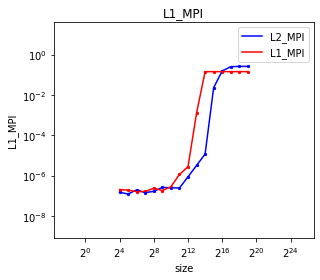

In [200]:

data = render_csv("L1.csv")
L2_data = render_csv("L2.csv")
data[["L2_MPI", "L2_cache_misses"]] = L2_data[["L2MPI", "PAPI_L2_DCM"]]
display(data[["function","size", "arg1", "IC", "CPI", "L1_MPI","L1_cache_misses", "L2_MPI","L2_cache_misses"]])
plotPE(df=data, logx=2, logy=10, combined=True, lines=True, what=[ ("size", 'L2_MPI'), ("size", 'L1_MPI')])

<div class="question completeness">
    
<div class="question-text">
    
Do the data match your prediction?   If not, how did it differ?
    
</div>
    
<div class="answer">

**L1 prediction correct?: yes**

**L2 prediction correct?: yes**
    
</div>
</div>

As always, we are more interested in performance than MPI.  Let's see how CPI behaved:

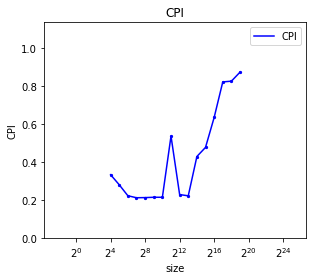

In [201]:

plotPE(df=data, logx=2, combined=True, lines=True, what=[ ('size', 'CPI')])

<div class="question correctness points-2">
    
#### Based on this data, how much speedup could you expect from reducing your working set size (in bytes) from...
    
<div class="answer">

**2MB to 1MB?:1.111** 

**512kB to 128kB?: 0.4139552729460366**  
    
**512kB to 32kB?: 1.03** 

**32kB to 8kB?:2.14** 
</div>
</div>

# The TLB

The three levels of on-chip caches set the number of _cache lines_ the processor can quickly access.  As you heard in 142, though, there is another kind of cache in the processor:  the TLB.   Instead of data, the TLB caches the translations from virtual addresses to physical addresses, and its size sets the number of _pages_ your program can access quickly.

Here's what our processor has:

1. 64 entries for 4kB pages (256kB total)
2. An L2 TLB with 1024 entries (8-way set associative; 4MBs total @ 4kB pages).
3. 32 entries for 2MB pages (64MB total).
4. 4 entries for 1GB pages (4GB total).

This is a little more complicated than what you heard about in 142.  First off, there is an L1 TLB _and_ an L2 TLB.  If we think of the L1 TLB as cache for memory translations, then the L2 TLB is exactly analogous to the L2 cache:  If the processor has a TLB miss in the L1 TLB, it can look in the L2 TLB.  One important point:  memory address translation _always_ happens at the L1 cache because _all_ the caches are physically tagged.  This means that the L2 TLB _has nothing to do with the L2 Cache_.  

The L2 TLB can cover 4MBs worth of 4kB pages of virtual address space.  If you are using more pages than that, you'll get TLB misses and your performance will suffer. 

Here's a fun idea!:  Let's use a miss machine to measure the L1 TLB miss latency.

The the code below is version of our miss machine code from the last lab but with a few changes:

1.  It has a template-configurable link size (`BYTES`).
2.  We allocate the `MM` links in array that 4096-byte aligned.
3.  We use [`madvise()`](https://man7.org/linux/man-pages/man2/madvise.2.html) to prevent us from using 2MB pages, which Linux will automatically use when it can.  We'll come back to that.
4.  We can set the _total size_ of the miss machine _in bytes_ with the `size` parameter.  It should be a multiple of `BYTES`.

Read through the code to make sure it makes sense.

In [50]:
render_code("TLB.cpp", show=("//START", "//END"))

// TLB.cpp:2-60 (59 lines)
//START
#include<cstdint>
#include<cstdlib>
#include<vector>
#include<algorithm>
#include"function_map.hpp"
#include <sys/mman.h>

template<size_t BYTES>
struct MM {
    struct MM* next;  // I know that pointers are 8 bytes on this machine.
    uint64_t junk[BYTES/8 - 1]; // This forces the struct MM to take a up a whole cache line, abolishing spatial locality.
};


template<class MM>
MM *  __attribute__ ((noinline))  miss(MM * start, uint64_t count)  {
    for(uint64_t i = 0; i < count; i++) { // Here's the loop that does this misses. It's very simple.
        start = start->next;
    }
    return start;
}

template<size_t BYTES>
uint64_t* TLB(uint64_t * data, uint64_t size, uint64_t arg1) {
    struct MM<BYTES> * array = NULL;
    int r =  posix_memalign(reinterpret_cast<void**>(&array), 4096, size);
	if (r == -1) { 
		std::cerr << "posix_memalign() failed.  Exiting: " << strerror(errno) << "\n";
		exit(1);
    }

    r = madvise(reinterpret_cast<void*>(array), size, MADV_NOHUGEPAGE);
	if (r == -1) { 
		std::cerr << "madvise() failed.  Exiting: " << strerror(errno) << "\n";
		exit(1);
    }
    
    std::cout << "array alignment is " << (reinterpret_cast<uintptr_t>(array) % 4096) << "\n";
    std::cout << "array size is " << size/BYTES << " element; " << size << "B\n";
    
    // This is clever part  'index' is going to determine where the pointers go.  We fill it consecutive integers.
    std::vector<uint64_t> index;
    for(uint64_t i = 0; i < size/BYTES; i++) {
        index.push_back(i);
    }
    // Randomize the list of indexes.
    std::random_shuffle(index.begin(), index.end());

    // Convert the indexes into pointers.
    for(uint64_t i = 0; i < size/BYTES; i++) {
        array[index[i]].next = &array[index[(i + 1) % (size/BYTES)]]; 
    } 

    MM<BYTES> * start = &array[0];
    start = miss(start, arg1); // 128 million accesses.
    return reinterpret_cast<uint64_t*>(start); // This is a garbage value, but if we don't return it, the compiler will optimize out the call to miss.
} 
//END

There are two parameters we need to set:  The size of `MM` (`BYTES` in the code above) and the `size`.
 
Here's what the `miss()` function looks like for `BYTES = 4096`.  It should be familiar from Lab 3:

mkdir -p build/
cp TLB.cpp build/TLB.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -march=x86-64 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/TLB.cpp -o build/TLB.o
g++-8 build/TLB.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl   -shared -o build/TLB.so
sym.MM_4096ul__miss_MM_4096ul____MM_4096ul___unsigned_long_


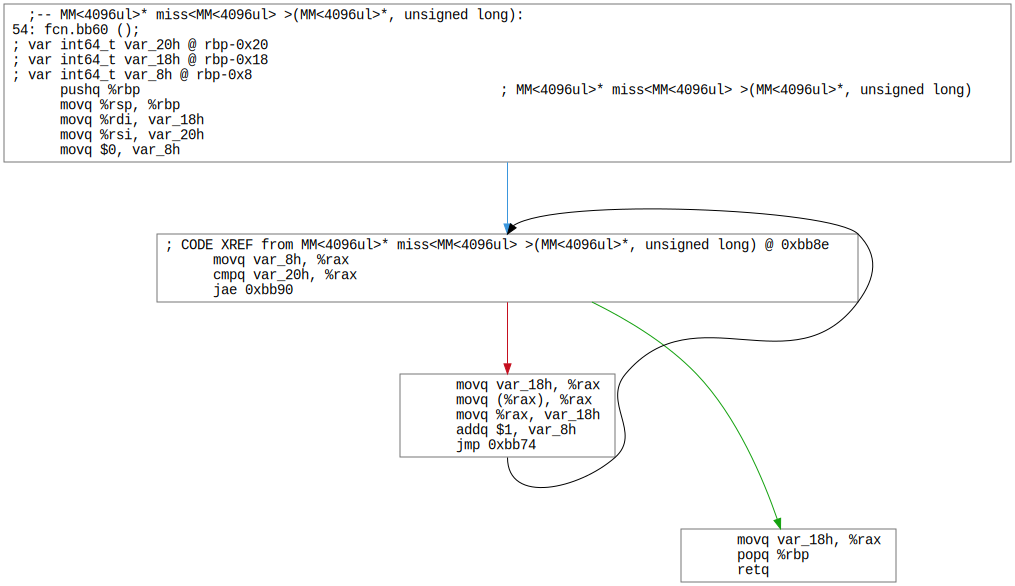

In [207]:
!make build/TLB.so
do_cfg("build/TLB.so", symbol="sym.MM_4096ul__miss_MM_4096ul____MM_4096ul___unsigned_long_", output="tlb.png")

<div class="question completeness">
    
<div class="question-text">
    
Using the code above, what values of `BYTES` and `size` should we run the miss machine with to measure the L1-TLB miss latency?  (The fact that there are two experiments listed is a hint that you'll need to run two different experiments.)
    
</div>
   
<div class="answer">

|| `BYTES` | `size` |
|--|------------|--|
|Experiment 1|8 |4096 |
|Experiment 2|512|4096 |
    
</div>
</div>

<div class="solution">

We are trying to measure the L1 TLB miss latency.  What is that exactly?  It's the difference in latency between an L1 cache hit that hits in the TLB and an L1 cache hit that misses in the TLB.  We want the accesses to be cache _hits_ because otherwise, our measurement might include the L1 cache miss latency as well.
    
So, we need to take two measurements.  For the first, we want to ensure that there are no TLB misses and no L1 cache misses.  For the second measurement, we would like there to be many TLB misses and no L1 cache misses.
    
**No L1-TLB misses/No L1 cache misses:**  Pretty easy.  We could make `MM` occupy 8 bytes and set `size` to 8B.   This would create a miss machine with a single link, which would result in no misses of any kind.  We could also set `size = 4096` (or actually any thing less than 32kB) and the effect would be the same.
    
**Many L1 TLB misses/No L1 cache misses** This is trickier:  We need to spread our accesses across many more than 64 4kB pages (to have lots of TLB misses) but we need to access no more than 512 cache lines (so they will all fit in the L1 cache).  Fortunately, 512 is much larger than 64, so we can access one cache line in each of 512 pages.
    
A good first try would be to set `size` to 512*4kB and `BYTES` to 4096.  That way, each `MM` will occupy one page.  Let's try that!
    
The code below will invoke `TLB_4096` with `size = 4096` (1 page) and `size = 512*4096` (512 pages).  Here's the code for `TLB_4096`:
    

In [51]:
render_code("TLB.cpp", show="TLB_4096")

// TLB.cpp:70-72 (3 lines)
uint64_t* TLB_4096(uint64_t * data, uint64_t size, uint64_t arg1) {
        return TLB<4096>(data, size, arg1);
}

In [208]:

t = fiddle("TLB.cpp", name="TLB1", function=["TLB_4096"], opt="-O3", run=['perf_count']
, cmdline=f"--size 4096 {512*4096} --arg1 {128*1024*1024} --iters 1", 
     perf_cmdline="--stat-set L1.cfg --MHz 3500")


df = render_csv("TLB1.csv", columns=["function","size","arg1", "IC", "CPI", "CT", "ET", "L1_MPI", "L1_cache_misses", "cycles"])
df["load_latency_cyc"] = df["cycles"]/df["arg1"]
df["load_latency_ns"] = df["load_latency_cyc"]*df['CT']*1e9

df

Compiling your code...
make build/TLB.s build/TLB.so C_OPTS='-O3' fiddle.exe 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread    -O3 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/TLB.cpp -o build/TLB.s
make: 'build/TLB.so' is up to date.
make: 'fiddle.exe' is up to date.

Running your code for perf_count...
Executing: ./fiddle.exe --lib ./build/TLB.so --function TLB_4096 --stats TLB1.csv --stat-set L1.cfg --MHz 3500 --size 4096 2097152 --arg1 134217728 --iters 1
You are submitting a job for lab "Lab 4: Caches II" (caches2).
The due date for Lab 4: Caches II has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job 3d22d390-8226-4024-8fdd-f803f6c11a28 0.00 0.00
Ready 

,function,size,arg1,IC,CPI,CT,ET,L1_MPI,L1_cache_misses,cycles,load_latency_cyc,load_latency_ns
0,TLB_4096,4096,134217728,1073751557,1.036071,2.868574e-10,0.319124,5.541319e-07,595,1112483141,8.288645,2.377659
1,TLB_4096,2097152,134217728,1074023206,6.498808,2.869213e-10,2.002674,1.249708e-01,134221492,6979871039,52.004092,14.921081


<div class="_solution">
    
In this data, changing `size` from 4096 to 512*4096 (2,097,152) increased CPI from 1 to 12. And load latency seems to have increasdeb by 12x to 48 cycles. But let's check our data more closely.  Did the experiments a achieve our goals?

The first line looks pretty good. Last lab we saw that L1 hit latency was 4 cycles, which is what we see in the last column.   Also, note that L1 cache misses are very low (i.e., `L1_MPI` is very low).
    
The second line, however, was supposed to have low L1 hits _and_ high TLB misses.  The `L1_MPI` is quite high: 0.25. Since there are only 4 instructions in the `miss()` loop, that means all the loads are missing in the L1.  But wait, we only have 512 links in our miss machine -- they should all fit in our cache at once!  What's going on?!?!?  Think carefully about what's going on before you read the next paragraph.

The problem is conflict misses:  since all the `MM` links are 4kB aligned, they fall into a small number of associative sets in the L1.  Hence, cache misses!  

To fix this, we can increase the size of `MM` by one cache line to 4160 bytes.  That will ensure that the `MM` structs are spread across all the associative sets (If this doesn't make sense, working out the cache indexes of `MM` structs of size 4096 vs 4160 should help clear it up.).  Here's the experiment:

In [ ]:

t = fiddle("TLB.cpp", name="TLB2", function=["TLB_4160"], opt="-O3", run=['perf_count']
, cmdline=f"--size 4160 {512*4160} --arg1 {128*1024*1024} --iters 1", 
     perf_cmdline="--stat-set L1.cfg --MHz 3500")


In [ ]:

df = render_csv("TLB2.csv", columns=["function","size","arg1", "IC", "CPI", "CT", "ET", "L1_MPI", "L1_cache_misses", "cycles"])
df["load_latency_cyc"] = df["cycles"]/df["arg1"]
df["load_latency_ns"] = df["load_latency_cyc"]*df['CT']*1e9
df

<div class="_solution">
    
This looks better.  The first line is essentially unchanged.

The second line is much improved: `L1_MPI` is very low.

The new load latency with the L1 TLB misses is 13 cycles -- 9 more than the baseline L1 latency, so an L1 TLB misses takes 9 cycles or about 2.6 ns.

</div>

<div class="question optional">
    
<div class="question-text">

The measurement above is for a miss to the L1 TLB.  Perform a different experiment to measure the L2 TLB miss latency.  This is harder than it appears at first.
    
</div>
    
</div>
    

<div class="question optional">
    
<div class="question-text">

The measurements above are based on 4kB pages, but we can also use 2MB "huge pages".  Repeat the experiment above to determine whether 2MB TLB entries can also reside in the L2 TLB.      
</div>
 
<div class="answer">

A few notes:
    
1.  This one is a little involved.  You'll need to significantly tweak the experiments we did above.
2.  Whether 2MB TLB entries can be in the in the L2 TLB is not clearly specified in any documents I have found, so I don't know the answer.
3.  To get the system to use 2MB huge pages, remove the call to `madvise()` in `TLB.cpp` and ask `posix_memalign()` to give 2MB-aligned memory.
4.  Look in `TLB.cpp` for examples of how to change `BYTES`.  `TLB_2M()` is a good starting point.

</div>
</div>
    

# Optimizing For Locality

Minimizing cache misses is critical for maximizing performance because, as you have seen, even a small number of misses can inflate `CPI` and `ET`.  As a result, programmers who are concerned about performance often spend a lot of effort optimizing there code to reduce misses.

Below, we'll take a look a two common optimizations:  Loop reordering and tiling.  

In the compiler lab, you explored several other optimizations that compilers apply very effectively.  While there are compilers that apply these (and other) locality optimizations, many do not and even when they do, these locality optimizations do not work as effectively when applied automatically, so performance-obsessed programmers often apply locality optimizations by hand (but, of course, only when profiling and Amdahl's law demonstrates it's potentially profitable!).

## Loop Renesting

Loop reordering or "re-nesting" is an optimization that changes the order in which loops are nested to improve locality.  For instance, consider the code below.  It initializes a 2D tensor, but it does it twice:  The first time, the loop for `x` is on the outside of the loop nest.  The second time, `x` is on the inside.

In [209]:
 x_outside = fiddle("renest.cpp", function="x_outside", name="x_outside", run=["moneta","perf_count"], tagged_only=True, opt="-O1",
                code=r"""
#include"pin_tags.h"
#include"CNN/tensor_t.hpp"
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* x_inside(uint64_t * data, uint64_t size, uint64_t arg1) {
    tensor_t<uint32_t> t(size/arg1,arg1,1,1, (uint32_t *)data);
    
    TAG_START("x_inside", t.data, &t.as_vector(t.element_count()), true);

    for(uint y = 0; y < arg1; y++) {
        for(uint x = 0; x < size/arg1; x++) {
            t.get(x,y,0,0) = x;
        }
    }
    
    TAG_STOP("x_inside");

    return data;
}

FUNCTION(one_array_1arg, x_inside);

extern "C"
uint64_t* x_outside(uint64_t * data, uint64_t size, uint64_t arg1) {
    tensor_t<uint32_t> t(size/arg1,arg1,1,1, (uint32_t *)data);
    
    TAG_START("x_outside", t.data, &t.as_vector(t.element_count()), true);

    for(uint x = 0; x < size/arg1; x++) {
        for(uint y = 0; y < arg1; y++) {
            t.get(x,y,0,0) = x;
        }
    }
    
    TAG_STOP("x_outside");
    
    return data;
}

FUNCTION(one_array_1arg, x_outside);
""",
            cmdline=f"--size {1024*1024} --arg1 {1024*4}", perf_cmdline="--stat-set L1.cfg --MHz 3500")

x_inside = fiddle("renest.cpp", function="x_inside", name="x_inside", run=["moneta","perf_count"], tagged_only=True, opt="-O1",

                  cmdline=f"--size {1024*1024} --arg1 {1024*4}", perf_cmdline="--stat-set L1.cfg --MHz 3500")

Compiling your code...
make build/renest.s build/renest.so C_OPTS='-O1' fiddle.exe 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread    -O1 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/renest.cpp -o build/renest.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -O1 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/renest.cpp -o build/renest.o
g++-8 build/renest.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl   -shared -o build/renest.so
make: 'fiddle.exe' is up to date.

Running your code for moneta...
Executing: ./fiddle.exe --lib ./build/renest.so --functio

In [210]:
show_trace("./x_inside_0", show_tag=["x_inside"], layer_preset=["x_inside"])

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

In [211]:
show_trace("./x_outside_0", show_tag=["x_outside"], layer_preset=["x_outside"])

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

Amazingly, those two plots contain exactly the same number of memory accesses, they just distributed differently through time.

Recall from our earlier discussion of `tensor_t`, that incrementing the first argument to `get()` corresponds to moving to the next element in the underlying array of data.  In the code above, `x` is the first argument to `get()`, so putting the `x` loop inside leads to better spatial locality.

You can see this reflected in the traces:  With `x` on the inside, the program marches linearly through memory.   With the `x` loop outside, it takes large strides through the array.  In particular, it doesn't access the same 64 byte cache line again until long after it has been evicted from the cache.

<div class="question completeness">
   
<div class="question-text">

Use Moneta's measurement tool to measure the cache miss rate for both versions of the code.
    
</div>
    
<div class="answer">

| version | hit rate | 
|---------|----------|
| x loop inside           |93.75 % | 
| x loop outside           |0 | 

</div>

</div>

<div class="question completeness">
   
<div class="question-text">

What value of `--arg1` should result in a very high (e.g., > 95%) hit rate, even with the `x` loop on the outside?  Try to reason through the correct value before running any experiments.

</div>
    
<div class="answer">
 it would be values less than 512 because anything more than that would increase chances for the cache miss

</div>

</div>

<div class="solution">
    
Recall how `tensor_t` accesses it's internal array.  For the function above, the index calculation becomes:
    
```
index = y * size/arg1 + x;
```
    
When the `x` loop is on the outside, the first iteration of the `y` loop code brings in a cache line and uses one element.  The next iteration of the `y` loop accesses an element that is `size/arg1 ` elements away.  As long as `size/arg1 ` represents more than 64 bytes, that location will be in a different cache line.  In the code above, each element is a `uint32_t`, so if `size/arg1  > 16`, the next element is in a new cache line. 
    
So, each iteration of the `y` loop touches a different cache line.  In our code, that equates to `arg1` cache lines.
    
When the `y` loop is finished, `x` will increment and the `y` loop will access access the same cache lines in the same order.
    
The misses arise when `arg1` is larger than the number cache lines in our cache.  Our cache is 32kB with 64-bytes lines, so it has 512 cache lines.  As a result, if `arg1 > 512` there will be lots of cache misses.  You can verify this by running the code above with `arg1` equal to 511, 512, and 513.

Remember, though, that Moneta provides a fully-associative cache model.  The real cache is 8-way associative.  The cell below runs `x_outside` for a wide range of `arg1` values.  The cell below graphs the resulting misses per instructions vs. `arg1`.
</div>

In [212]:

def srange(low, high, step):
    return " ".join(map(str,range(low, high, step)))

tuned_size = fiddle("renest.cpp", function="x_outside", name="tuned_size", run=["perf_count"], opt="-O1", 
                    cmdline=f"--size {128*16*1024} --arg1 {srange(512-256, 512+256, 4)} --stat-set L1.cfg --iters 8")


Compiling your code...
make build/renest.s build/renest.so C_OPTS='-O1' fiddle.exe 
make: 'build/renest.s' is up to date.
make: 'build/renest.so' is up to date.
make: 'fiddle.exe' is up to date.

Running your code for perf_count...
Executing: ./fiddle.exe --lib ./build/renest.so --function x_outside --stats tuned_size.csv  --size 2097152 --arg1 256 260 264 268 272 276 280 284 288 292 296 300 304 308 312 316 320 324 328 332 336 340 344 348 352 356 360 364 368 372 376 380 384 388 392 396 400 404 408 412 416 420 424 428 432 436 440 444 448 452 456 460 464 468 472 476 480 484 488 492 496 500 504 508 512 516 520 524 528 532 536 540 544 548 552 556 560 564 568 572 576 580 584 588 592 596 600 604 608 612 616 620 624 628 632 636 640 644 648 652 656 660 664 668 672 676 680 684 688 692 696 700 704 708 712 716 720 724 728 732 736 740 744 748 752 756 760 764 --stat-set L1.cfg --iters 8
You are submitting a job for lab "Lab 4: Caches II" (caches2).
The due date for Lab 4: Caches II has passed.  You

In [ ]:

ts1 = render_csv("tuned_size.csv")
plotPE(df=ts1, what=[("arg1","L1_MPI")], lines=True, average_by="arg1" ,columns=1)

<div class="_solution">
    
It's not very clean, but the increase occurs around the right place.  The two most notable things are the spikes in `L1_MPI` below 512 and the relatively slow increase in MPI past 512.

The spikes are due to the real L1 cache's limited associativity.  The L1 has 512 cache lines with 8 lines per associative set, so there are 64 sets.  For certain unlucky values of `arg1`, many of the cache lines that the loop accesses will land in the same associative set.
    
The slow rise in MPI after 512 is a little harder to explain, but there are two likely candidates:
    
1. Intel's cache replacement policies are reported to guard against poorly behave loops (which `x_outside` is) "blowing out" the cache.
2. Intel's processors also include several prefetchers that predict accesses with a constant stride, which `x_outside` certainly has.  I've disabled as many of the prefetchers as I have found documentation for, but graphs like this make me think there's still one running somewhere.  
    
</div>


## Loop Tiling

Renesting loops can improve spatial locality, but it is generally less effective for improving temporal locality.  There are two criteria that must be met in order to exploit temporal locality:

1.  The cache line must be re-used.
2.  The re-use must occur before the cache line is evicted by other cache lines coming in the cache.

This second condition has a direct connection to working set size:  If the working set size of a piece of code is too large, it is likely that parts of it will be evicted before they are accessed again, making it hard for the processor to exploit the temporal _and_ spatial locality.

Our goal, then is to shrink the working set so that it fits in the cache and we can exploit the resulting locality.

As an example, let's consider a 1-dimensional convolution.  

### 1-D Convolution

One-dimensional convolution a simple algorithm and a fundamental building block for many signal processing systems.   The inputs are two 1-dimensional arrays (we will use `tensor_t<uint32_t>`) that we will call the `source` and the `kernel` and it produces a third array called the `target`.  The `kernel` is much smaller than the `source` and the `length(target) = length(source) - length(kernel)`.

Conceptually, we compute the entries of `target` by "sliding" `kernel` along `source` and computing the dot product at each position.  Here's a video that illustrates:

In [52]:
display(IFrame("https://www.youtube.com/embed/ulKbLD6BRJA", width=560, height=315))

The code is below.   Run the cell to generate a Moneta trace for a 16kB source and 4kB kernel:

In [53]:
render_code("convolution.cpp", show=("//START", "//END"))

// convolution.cpp:8-43 (36 lines)
//START
extern "C"
void do_convolution(const tensor_t<uint32_t> & source,
                    const tensor_t<uint32_t> & kernel,
                    tensor_t<uint32_t> & target, int32_t tile_size) {
	for(register int32_t i = 0; i < target.size.x; i++) {
		for(register int32_t j = 0; j < kernel.size.x; j++) {
			target.get(i,0,0,0) += source.get(i + j,0,0,0) * kernel.get(j,0,0,0);
		}
	}
}

extern "C"
uint64_t* convolution(uint64_t * source_space, uint64_t source_size,
                      uint64_t * kernel_space, uint64_t kernel_size, 
                      uint64_t * target_space, uint64_t _target_size, int32_t tile_size) {
	tensor_t<uint32_t> source(source_size,1,1,1, (uint32_t *)source_space);
	tensor_t<uint32_t> kernel(kernel_size,1,1,1, (uint32_t *)kernel_space);
	uint64_t target_size = source_size - kernel_size;
	tensor_t<uint32_t> target(target_size,1,1,1, (uint32_t *)target_space);
	TAG_START("source", source.data, &source.as_vector(source.element_count()), true);
	TAG_START("kernel", kernel.data, &kernel.as_vector(kernel.element_count()), true);
	TAG_START("target", target.data, &target.as_vector(target.element_count()), true);

	
	// Here's the the key part:
	do_convolution(source, kernel, target, tile_size);
  
	TAG_STOP("source");
	TAG_STOP("kernel");
	TAG_STOP("target");
	return target_space;
}

FUNCTION(convolution, convolution);
//END

Run the cell below to take a look at the trace.

In [15]:
fiddle("convolution.cpp", function="convolution", analyze=False, 
       name="convolution", run=["moneta"], tagged_only=False, 
       opt="-O3", 
       cmdline=f"--size {4*1024} --size2 {1024} --size3 {4*1024}  --tile-size 64")
show_trace("./convolution_0", show_tag=["source", "kernel","target"])

Compiling your code...
make build/convolution.s build/convolution.so C_OPTS='-O3' fiddle.exe 
make: 'build/convolution.s' is up to date.
make: 'build/convolution.so' is up to date.
make: 'fiddle.exe' is up to date.

Running your code for moneta...
Executing: ./fiddle.exe --lib ./build/convolution.so --function convolution --size 4096 --size2 1024 --size3 4096  --tile-size 64
Running: /cse142L/CSE141pp-Tool-Moneta-Pin/pin.sh -ifeellucky -injection child  -t /cse142L/CSE141pp-Tool-Moneta-Pin/source/tools/ManualExamples/obj-intel64/trace_tool.so -name convolution -file_count 1 -cache_lines 512 -block 64 -start main -ol 10000000  -skip 0 -- ./fiddle.exe --lib ./build/convolution.so --function convolution --size 4096 --size2 1024 --size3 4096 --tile-size 64
Done running.


PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

You should see three strips of color.  Yellow line is `target`, the light blue band is `kernel`, and the `source` is in purple.  The slow shift upward of `source` shows the sliding slice of `source` that `kernel` is being dot-producted (dot-produced?) with.

Let's see how much of the cache the program is taking up.  Use the measuring tool to select a narrow, vertical band from top to bottom and spans 1M memory accesses. Check the number of cache lines being touched and the cache hit rate.  This is the a rough measure of the working set of the algorithm.  You can drag the measured area around to see how the size of the working set changes (or doesn't).

![Oct-01-2021%2022-35-16.gif](img/strips_of_color.gif)

<div class="question completeness">
    
<div class="question-text">

Based on measurements with the ruler tool, how big (in cache lines) is the working set for this computation?  Does it vary throughout the computation?
    
</div>
    
<div class="answer">
It is somewhere between 160 to 360 and it varies as we move it
    

</div>
    
</div>    

### Memory Behavior in 1-D Convolution

The measurement tool can measure the working set of this computation: if we take a narrow, vertical slice of the trace, that tells us how many cache lines the program is using during that period.  If that working set is larger than the cache, than it's likely we will have poor performance.  

We can see from the trace that there is quite a bit of reuse:  The code reads `kernel` over and over again, and there's a lot of overlap between the parts of `source` that the program accesses.  There is _a lot_ of temporal locality, and we should be able to use it.

Here's the assembly for `do_convolution()`.  A few notes:

1. `%rdi` points to `source`
2. `%rsi` points to `kernel`
3. `%rdx` points to `target`
4.  Note how constant propagation and inlining have turned all those calls to `get()` into very simple code.


sym.do_convolution


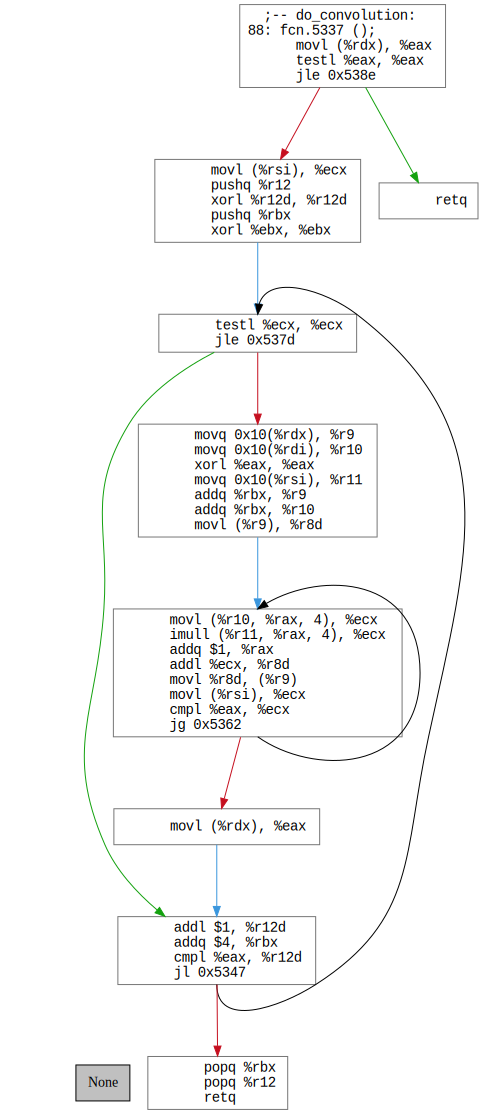

In [30]:
do_cfg("build/convolution.so", symbol="do_convolution", output="convolution1.png")

<div class="question correctness points-2">
    
<div class="question-text">

How many loads does the inner loop perform per iteration?  How many stores? (Recall that `op rl, r2` in x86 means `r2 = r1 op r2`).  If `source` has 4096 element and `kernel` has 512 element, what's the dynamic instruction count for each loop (to within 10%)?  What fraction of the execution is spent on the outer loop?
    
</div>
<div class="answer">

|  | Inner loop | Outer loop (excluding the inner loop) | 
|--|-------------|----------|
| Instructions | 8| 14|
| Loads | 3 | 5|
| Stores | 1| 0|

    
|  | Inner loop | Outer loop (excluding the inner loop) |
|--|-------------|----------|
| Dynamic Instruction count| 4048| 7160| 
| % of IC | 31.25| 68.75

</div>
    
</div>    


<div class="question completeness">
    
<div class="question-text">

Compute (rather than measure as you did above) the size of the working set of this computation?  What would it be if `kernel` were 32kB, and `source` was 128kB.  Roughly estimate the cache hit rate in each case.
    
</div>
<div class="answer">
 
**Working set for 16kB source and 4kB kernel**: 1024 lines

**Estimated hit rate**: 0.015
    
**Working set for 128kB source and 32kB kernel**: 1024 lines

**Estimated hit rate**: 0.015

</div>
    
</div>    


<div class="solution">

In both cases, working set is roughly twice the size of `kernel`.  Each iteration accesses all of `kernel`, an equal-sized chunk of `source`, and one element of `target`.
    
For a 4kB kernel (`size = 1024`), this is 8kB (or 128 cache lines).  For a 32kB kernel, it 64kB or about 1024 cache lines.

To estimate the cache miss rate, first note that for the smaller data size, the working set is smaller than the L1, so the hit rate should be near zero.
    
For the larger size, we need to think through the source code.  From the previous question (and Amdahl's Law), we know know that the inner loop is all that really matters, so we can focus there.

Each iteration of the inner loop performs 4 memory operations:

<div class="answer">

| | |
|-|-|
| first `movl` | load from `source`| 
| `mull` | load from `kernel`| 
| `movl %r8d, (%r9) | Store to `target`|
| `movl (%rsi) %ecx` | load the size of `kernel` | 

</div>
    
The `movl` and the `mull` are both going to take capacity misses for each cache line they access, even though the tend to access the same data from iteration of the outer loop to the next.   Between them they read 64kB of data, too much for the L1 to hold.  Since `uint32_t` is 4 bytes, there are 16 of them per cache line.  Therefore, both of these instructions will miss 1/16 of the time. 

The store to `target` and the final `movl` will usually be a hit, since `%rsi` and `%r9` only changes in the outer loop. 

I don't know why the load from `%rsi` is there, but I couldn't get the compiler to get rid of it (exercise for the reader).

So, there are likely to be 2 * 1/16 of a cache miss per iteration of the inner loop.  There are 8 instructions in the inner loop, so the `L1_MPI` should be about 0.015.

Let's check:

</div>

In [45]:

fiddle("convolution.cpp", function="convolution", analyze=False, name="little", run=["perf_count"], tagged_only=False, opt="-O3",
                      cmdline=f"--size {4*1024} --size2 {1024} --size3 {4*1024} --tile-size 64", perf_cmdline="--stat-set L1.cfg --MHz 3500")
fiddle("convolution.cpp", function="convolution", analyze=False, name="big", run=["perf_count"], tagged_only=False, opt="-O3",
                      cmdline=f"--size {32*1024} --size2 {8*1024} --size3 {32*1024}  --tile-size 64", perf_cmdline="--stat-set L1.cfg --MHz 3500")

render_csv("big.csv").append(render_csv('little.csv'))[["size", "size2", "size3", "IC", "CPI", "CT", "ET", "L1_MPI"]] 

Compiling your code...
make build/convolution.s build/convolution.so C_OPTS='-O3' fiddle.exe 
make: 'build/convolution.s' is up to date.
make: 'build/convolution.so' is up to date.
make: 'fiddle.exe' is up to date.

Running your code for perf_count...
Executing: ./fiddle.exe --lib ./build/convolution.so --function convolution --stats little.csv --stat-set L1.cfg --MHz 3500 --size 4096 --size2 1024 --size3 4096 --tile-size 64
You are submitting a job for lab "Lab 4: Caches II" (caches2).
The due date for Lab 4: Caches II has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job 78105217-4d95-4c59-8254-beb8ae3ee3aa 0.00 0.00
Ready for submission. 3.79 3.79
Job 78105217-4d95-4c59-8254-beb8ae3ee3aa is in state 'PUBLISHED'. 2.59 6.39 
Job 78105217-4d95-4c59-8254-beb8ae3ee3aa is in state 'RUNNING'. 1.05 7.44. 
Job 78105217-4d95-4c59-8254-beb8ae3ee3

,size,size2,size3,IC,CPI,CT,ET,L1_MPI
0,32768,8192,32768,1610958270,0.251584,2.869394e-10,0.116294,0.015598
0,4096,1024,4096,25209958,0.255901,2.881535e-10,0.001859,0.000029


<div class="_solution">
    
Pretty good agreement!  The `L1_MPI` should match our prediction for the large data size and be roughly 0 for the small data size.

</div>

### Tiling 1-D Convolution

We are going to "tile" the execution of this function to reduce the number of cache misses for large data sets.  Tiling works by breaking up the execution of a set of nested loops into smaller parts with smaller working sets.  If the resulting working set fits in the cache, the number of cache misses should drop significantly.

We'll perform the tiling in two steps:

1.  We'll "split" a loop into two nested loops. 
2.  Then we'll renest the resulting loops.

To split a loop, we will break the loop into fixed-size chunks.   The outer loop will iterate over the chunks, and the inner loop will iterate over the elements within a chunk.  This first transformation _has no effect_ on the order in which computation occurs.

Here's version of the convolution code with the `kernel` loop split into chunks of size `tile_size` (we'll set `tile_size` to 64 for now):

In [54]:
render_code("convolution.cpp", show="do_convolution_new_loop")

// convolution.cpp:47-61 (15 lines)
void do_convolution_new_loop(const tensor_t<uint32_t> & source,
			     const tensor_t<uint32_t> & kernel,
			     tensor_t<uint32_t> & target, int32_t tile_size) {

	for(int32_t i = 0; i < target.size.x; i++) {
		for(int32_t jj = 0; jj < kernel.size.x; jj += tile_size) { // We create a new loop variable jj that advanced one chunk at a time.
			for(int32_t j = jj; j < kernel.size.x && j < jj + tile_size; j++) { // We iterate over the chunk.  The more complicated termination 
				// condition keeps ups from running off the end of the arry
				target.get(i,0,0,0) += source.get(i + j,0,0,0) * kernel.get(j,0,0,0);
			}
		}
	}
  

}

In [47]:
fiddle("convolution.cpp", function="convolution_new_loop", analyze=False, name="convolution_new_loop_small", run=["moneta"], tagged_only=False, opt="-O3",
            cmdline=f"--size {4*1024} --size2 {1024} --size3 {4*1024}  --tile-size 64")
fiddle("convolution.cpp", function="convolution_new_loop", analyze=False, name="convolution_new_loop_big", run=["moneta"], tagged_only=False, opt="-O3",
        cmdline=f"--size {32*1024} --size2 {8*1024} --size3 {32*1024}  --tile-size 64")

Compiling your code...
make build/convolution.s build/convolution.so C_OPTS='-O3' fiddle.exe 
make: 'build/convolution.s' is up to date.
make: 'build/convolution.so' is up to date.
make: 'fiddle.exe' is up to date.

Running your code for moneta...
Executing: ./fiddle.exe --lib ./build/convolution.so --function convolution_new_loop --size 4096 --size2 1024 --size3 4096  --tile-size 64
Running: /cse142L/CSE141pp-Tool-Moneta-Pin/pin.sh -ifeellucky -injection child  -t /cse142L/CSE141pp-Tool-Moneta-Pin/source/tools/ManualExamples/obj-intel64/trace_tool.so -name convolution_new_loop_small -file_count 1 -cache_lines 512 -block 64 -start main -ol 10000000  -skip 0 -- ./fiddle.exe --lib ./build/convolution.so --function convolution_new_loop --size 4096 --size2 1024 --size3 4096 --tile-size 64
Done running.
Compiling your code...
make build/convolution.s build/convolution.so C_OPTS='-O3' fiddle.exe 
make: 'build/convolution.s' is up to date.
make: 'build/convolution.so' is up to date.
make: 'fi

Here's the trace on as small data set.  It looks just like it did in the original version.

In [29]:
show_trace("./convolution_new_loop_small_0", show_tag=["source", "kernel", "target"])

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

Here it is the same code on a much larger data set that doesn't fit in the L1.  The slop of the lines is less pronounced because are only seeing the first 10 million memory accesses (which is all that poor datahub's brain can handle).  You might notice that the data structures are laid out differently (i.e., the color stripes are in a different order) in this plot than the one above.  This is the memory allocator putting things wherever it wants.  The color scheme is the same across all these plots.

In [30]:
show_trace("./convolution_new_loop_big_0", show_tag=["source", "kernel", "target"])

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

The next step is to renest the split loop.  Here's the code.  The only change is that we swapped the order of the `jj` loop and the `i` loop. Now, we will run the whole algorithm for 2048 elements of the `kernel` at a time.

In [31]:
render_code("convolution.cpp", show="do_convolution_tiled")

// convolution.cpp:130-141 (12 lines)
void do_convolution_tiled(const tensor_t<uint32_t> & source,
			  const tensor_t<uint32_t> & kernel,
			  tensor_t<uint32_t> & target, int32_t tile_size) {

	for(int32_t jj = 0; jj < kernel.size.x; jj += tile_size) {  // Move the jj chunk loop outside
		for(int32_t i = 0; i < target.size.x; i++) {
			for(int32_t j = jj; j < kernel.size.x && j < jj + tile_size; j++) {
				target.get(i,0,0,0) += source.get(i + j,0,0,0) * kernel.get(j,0,0,0);
			}
		}
	}
}

We'll run it first, with a small data set so you can see what the renesting does.   Here it is on a small data set:

In [32]:
fiddle("convolution.cpp", function="convolution_tiled", analyze=False, name="convolution_tiled_little", run=["moneta"], tagged_only=False, opt="-O3",
            cmdline=f"--size {4*1024} --size2 {1024} --size3 {4*1024} --tile-size 64", perf_cmdline="--stat-set L1.cfg --MHz 3500")

show_trace("./convolution_tiled_little_0", show_tag=["source", "kernel", "target"])

Compiling your code...
make build/convolution.s build/convolution.so C_OPTS='-O3' fiddle.exe 
make: 'build/convolution.s' is up to date.
make: 'build/convolution.so' is up to date.
make: 'fiddle.exe' is up to date.

Running your code for moneta...
Executing: ./fiddle.exe --lib ./build/convolution.so --function convolution_tiled --size 4096 --size2 1024 --size3 4096 --tile-size 64
Running: /cse142L/CSE141pp-Tool-Moneta-Pin/pin.sh -ifeellucky -injection child  -t /cse142L/CSE141pp-Tool-Moneta-Pin/source/tools/ManualExamples/obj-intel64/trace_tool.so -name convolution_tiled_little -file_count 1 -cache_lines 512 -block 64 -start main -ol 10000000  -skip 0 -- ./fiddle.exe --lib ./build/convolution.so --function convolution_tiled --size 4096 --size2 1024 --size3 4096 --tile-size 64
Done running.


PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

Well, that's different! 

Let's take a look at the access pattern for each of the tensors:

**`kernel`**

The kernel is in light blue and labeled with tag 'kernel'.  If you click on "tags" on the right, you'll see a list of the tags.  CLick the magnifying glass next to "kernel" and you'll zoom into the kernel.

The chunking structure shows up as a "stair step" pattern.  Each of the light blue blocks shows the portion of the `kernel` tensor the code is processing for each chunk.

If you zoom way in, you'll see that the code repeatedly accesses the whole chunk, updating the sum stored in each entry of tensor.

Rerun the cell above or press the "undo" arrow in the viewer to zoom back out.

**`target`**

Zoom in on `target`.  Zoom waaay in so you can see individual accesses.  You'll see that for each chunk, we make a linear pass over `target`, accessing each element once.

**`source`**

Zoom in on `source`.  AT first, it looks like `target`, but if you zoom in further you'll see that the purple lines are "thick":  The code accesses each element of the tensor repeatedly during each chunk.

`target` and `source` both exhibit reuse -- one of the two criteria necessary to leverage spatial locality.  The second criteria is that the working set fits in the cache.

Let's run it on a data set that won't fit in the L1.  The trace shows just 1.5 or so chunks worth of executino.  The "sawtooth" pattern would continue if we could trace more accesses.

In [33]:
fiddle("convolution.cpp", function="convolution_tiled", analyze=False, name="convolution_tiled_big", run=["moneta"], tagged_only=False, opt="-O3",
       cmdline=f"--size {32*1024} --size2 {8*1024} --size3 {32*1024} --tile-size 64", perf_cmdline="--stat-set L1.cfg --MHz 3500")
show_trace("./convolution_tiled_big_0", show_tag=["source", "kernel", "target"])

Compiling your code...
make build/convolution.s build/convolution.so C_OPTS='-O3' fiddle.exe 
make: 'build/convolution.s' is up to date.
make: 'build/convolution.so' is up to date.
make: 'fiddle.exe' is up to date.

Running your code for moneta...
Executing: ./fiddle.exe --lib ./build/convolution.so --function convolution_tiled --size 32768 --size2 8192 --size3 32768 --tile-size 64
Running: /cse142L/CSE141pp-Tool-Moneta-Pin/pin.sh -ifeellucky -injection child  -t /cse142L/CSE141pp-Tool-Moneta-Pin/source/tools/ManualExamples/obj-intel64/trace_tool.so -name convolution_tiled_big -file_count 1 -cache_lines 512 -block 64 -start main -ol 10000000  -skip 0 -- ./fiddle.exe --lib ./build/convolution.so --function convolution_tiled --size 32768 --size2 8192 --size3 32768 --tile-size 64
Done running.


PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

<div class="question completeness">
    
<div class="question-text">
    
Use the ruler tool to measure the working set size by measuring 1M memory operations. What's the cache hit rate?
    
</div>
<div class="answer">
    0.9999

</div>
    
</div>    

Let's run the code again with twice as much data.  This time, the trace won't even cover 1 chunk:

In [ ]:
convolution = fiddle("convolution.cpp", function="convolution_tiled", analyze=False, name="convolution_tiled", run=["moneta"], tagged_only=False, opt="-O3",
            cmdline=f"--size {64*1024} --size2 {16*1024} --size3 {64*1024}  --tile-size 64")


show_trace("./convolution_tiled_0", show_tag=["source", "kernel", "target"])

<div class="question completeness">
    
<div class="question-text">
    
Use the ruler tool to measure the working set size by measuring 1M instructions.  For larger data, what's the cache miss rate?
</div>
<div class="answer">
0.001
</div>
    
</div>    

So the hit rate doesn't change with the input size and it's very, very high!

Let's compare the performance of the original (un-tiled) version with our tiled version on the same data set.  In theory, the tiled version should be much faster because it has better temporal locality:

In [37]:
!make clean
fiddle("convolution.cpp", function=["convolution", "convolution_tiled"], analyze=False, name="convolution", run=["perf_count"], tagged_only=False, opt="-O3 ",
            cmdline=f"--size {64*1024} --size2 {16*1024} --size3 {64*1024} --tile-size 64", perf_cmdline="--stat-set L1.cfg --MHz 3500")
#fiddle("convolution.cpp", function="convolution_tiled", analyze=False, name="convolution_tiled",run=["perf_count"], tagged_only=False, o
#            cmdline=f"--size {64*1024} --size2 {16*1024} --size3 {64*1024} --tile-size 64", perf_cmdline="--stat-set L1.cfg --MHz 3500")

rm -rf build/ .tmp
rm -rf *.gv *-gv.pdf *.pin-trace #*.csv 
rm -rf *.exe *.o *.i *.s *.out *.d *.gcda *.gcno *.gprof *.gcov *.csv.raw core	
rm -rf 
Compiling your code...
make build/convolution.s build/convolution.so C_OPTS='-O3 ' fiddle.exe 
mkdir -p build/
cp convolution.cpp build/convolution.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread    -O3  -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/convolution.cpp -o build/convolution.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -O3  -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/convolution.cpp -o build/convolution.o
g++-8 build/convolution.o    -pthread   -L/usr/local/lib -L/cse142

In [36]:
render_csv("convolution.csv", columns=["function", "size", "size2", "size3", "IC", "CPI", "CT", "ET", "L1_MPI"])

,function,size,size2,size3,IC,CPI,CT,ET,L1_MPI
0,convolution,65536,16384,65536,6443141674,0.269503,2.870187e-10,0.498392,0.015617
1,convolution_tiled,65536,16384,65536,8254248613,0.303057,2.869806e-10,0.717884,0.000191


Hmmm....

What happened?  L1_MPI is low, CPI went down, but ET went up!

Ugh! IC rose by 1.3x!  Crud.  Let's look at the assembly.  On the left is the untiled version.  On the right, it is tiled. (It might help to open the images below in separate tabs or download and print them.  That's what I had to do.)

In [55]:
from notebook import *
compare([do_cfg("build/convolution.so", symbol="sym.do_convolution", output="normal"), do_cfg("build/convolution.so", symbol="sym.do_convolution_tiled", output="tiled")], ["not tiled", "tiled"])

sym.do_convolution
sym.do_convolution_tiled


<div class="question correctness points-6">
    
<div class="question-text">

Find the innermost loop body in both CFGs.  Fill out the table below assuming that `kernel` is 64kB (16k entries) and `source` is 512kB (64k entries). 
    
</div>
<div class="answer">

| |# of times executed | static insturctions  | dynamic instructions | 
|--|-|-|-|
|untiled | 512|7|3854
|tiled | 512|10|5120

**Ratio of Tiled IC/Untiled IC**: 1.42857143
    
</div>
    
</div>    

In the tiled code, there are some extra instructions in the inner loop.  They are due to the more complex loop completion condition required by tiling.  To put it another way:  The higher loop overhead increased IC more than better locality reduce CPI.

Use this fiddle to answer the question below:

<div class="question completeness">
    
<div class="question-text">

Modify the fiddle below (it's the same code as `convolution_tiled()`) to reduce loop overhead and achieve speedup with tiling.

the easiest way to do this is to unroll the loop, but my implementation was not successful.
</div>
    
</div>    

In [39]:

convolution = fiddle("convolution_question.cpp", function="convolution_question", analyze=False, run=["perf_count"], tagged_only=False, opt="-O3",
                code=r"""
#include"pin_tags.h"
#include"CNN/tensor_t.hpp"
#include"function_map.hpp"
#include<cstdint>

extern "C"
void do_convolution_question(const tensor_t<uint32_t> & source,
                    const tensor_t<uint32_t> & kernel,
                    tensor_t<uint32_t> & target, int32_t tile_size) {

    for(int32_t jj = 0; jj < kernel.size.x; jj += tile_size) {  // Move the jj chunk loop outside
        for(int32_t i = 0; i < target.size.x; i++) {
            for(int32_t j = jj; j < kernel.size.x && j < jj + tile_size; j++) {
                target.get(i,0,0,0) += source.get(i + j,0,0,0) * kernel.get(j,0,0,0);
            }
        }
    }
  

}

extern "C"
uint64_t* convolution_question(uint64_t * source_space, uint64_t source_size,
                      uint64_t * kernel_space, uint64_t kernel_size, 
                      uint64_t * target_space, uint64_t _target_size,
                      int32_t tile_size) {
    tensor_t<uint32_t> source(source_size,1,1,1, (uint32_t *)source_space);
    tensor_t<uint32_t> kernel(kernel_size,1,1,1, (uint32_t *)kernel_space);
    uint64_t target_size = source_size - kernel_size;
    tensor_t<uint32_t> target(target_size,1,1,1, (uint32_t *)target_space);
    TAG_START("source", source.data, &source.as_vector(source.element_count()), true);
    TAG_START("kernel", kernel.data, &kernel.as_vector(kernel.element_count()), true);
    TAG_START("target", target.data, &target.as_vector(target.element_count()), true);

    // Here's the the key part:
    do_convolution_question(source, kernel, target, tile_size);
    
    TAG_STOP("source");
    TAG_STOP("kernel");
    TAG_STOP("target");
    return target_space;  
}

FUNCTION(convolution, convolution_question);

""",
cmdline=f"--size {64*1024} --size2 {16*1024} --size3 {64*1024}  --tile-size 64", perf_cmdline="--stat-set L1.cfg --MHz 3500")
data = render_csv("convolution.csv").append(render_csv("build/convolution_question.csv"))
data[["function", "size", "size2", "size3", "IC", "CPI", "CT", "ET", "L1_MPI"]] 

Compiling your code...
make build/convolution_question.s build/convolution_question.so C_OPTS='-O3' fiddle.exe 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread    -O3 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/convolution_question.cpp -o build/convolution_question.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -O3 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/convolution_question.cpp -o build/convolution_question.o
g++-8 build/convolution_question.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl   -shared -o build/convolution_question.so
make: 'fiddl

,function,size,size2,size3,IC,CPI,CT,ET,L1_MPI
0,convolution,65536,16384,65536,6443141602,0.256273,2.869080e-10,0.473743,0.015615
1,convolution_tiled,65536,16384,65536,8254248618,0.302824,2.869338e-10,0.717214,0.000191
0,convolution_question,65536,16384,65536,8254247981,0.210634,2.869592e-10,0.498914,0.000191


<div class="solution">
    
Loop overhead is additional instructions that are necessary to implement and terminate the loop:  Exit condition checks, counter increments, branches.  Each iteration incurs these overheads, so the total overhead is equal to the number of iteration multiplied by the per-iteration overhead.  So, we can reduce the total overhead by reducing the number of iterations or the per-iteration overhead.

Let's start with reducing the number of iterations.  The easiest way to achieve this would be to unroll the loop.  For some reason the compiler choose not to unroll this loop, but let's force it to:

</div>

In [56]:
render_code("convolution.cpp", show="do_convolution_tiled_unrolled")

// convolution.cpp:167-179 (13 lines)
void  __attribute__((optimize("unroll-loops"))) do_convolution_tiled_unrolled(const tensor_t<uint32_t> & source,
									      const tensor_t<uint32_t> & kernel,
									      tensor_t<uint32_t> & target, int32_t tile_size) {

	for(int32_t jj = 0; jj < kernel.size.x; jj += tile_size) {  // Move the jj chunk loop outside
		for(int32_t i = 0; i < target.size.x; i++) {
			for(int32_t j = jj; j < kernel.size.x && j < jj + tile_size; j++) {
				target.get(i,0,0,0) += source.get(i + j,0,0,0) * kernel.get(j,0,0,0);
			}
		}
	}

}

In [43]:
fiddle("convolution.cpp", function="convolution_tiled_unrolled", analyze=False, name="convolution_tiled_unrolled", run=["perf_count"], tagged_only=False, opt="-O3",
            cmdline=f"--size {64*1024} --size2 {16*1024} --size3 {64*1024}  --tile-size 64", perf_cmdline="--stat-set L1.cfg --MHz 3500")
data = render_csv("convolution.csv").append(render_csv("convolution_tiled_unrolled.csv"))
data[["function", "size", "size2", "size3", "IC", "CPI", "CT", "ET", "L1_MPI"]] 

Compiling your code...
make build/convolution.s build/convolution.so C_OPTS='-O3' fiddle.exe 
make: 'build/convolution.s' is up to date.
make: 'build/convolution.so' is up to date.
make: 'fiddle.exe' is up to date.

Running your code for perf_count...
Executing: ./fiddle.exe --lib ./build/convolution.so --function convolution_tiled_unrolled --stats convolution_tiled_unrolled.csv --stat-set L1.cfg --MHz 3500 --size 65536 --size2 16384 --size3 65536  --tile-size 64
You are submitting a job for lab "Lab 4: Caches II" (caches2).
The due date for Lab 4: Caches II has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job 386783e9-207a-4c6a-b464-43f49a7b5a1a 0.00 0.00
Ready for submission. 3.66 3.66
Job 386783e9-207a-4c6a-b464-43f49a7b5a1a is in state 'PUBLISHED'. 2.86 6.52 
Job 386783e9-207a-4c6a-b464-43f49a7b5a1a is in state 'RUNNING'. 1.04 7.55..

,function,size,size2,size3,IC,CPI,CT,ET,L1_MPI
0,convolution,65536,16384,65536,6443141602,0.256273,2.869080e-10,0.473743,0.015615
1,convolution_tiled,65536,16384,65536,8254248618,0.302824,2.869338e-10,0.717214,0.000191
0,convolution_tiled_unrolled,65536,16384,65536,6882710657,0.222882,2.869581e-10,0.440202,0.000229


<div class="_solution">

It's a little better, but not much. It appears the compiler's decision not to unroll was not quite correct.

But why didn't it help more?  Let's look at the unrolled assembly:

</div>

sym.do_convolution_tiled_unrolled


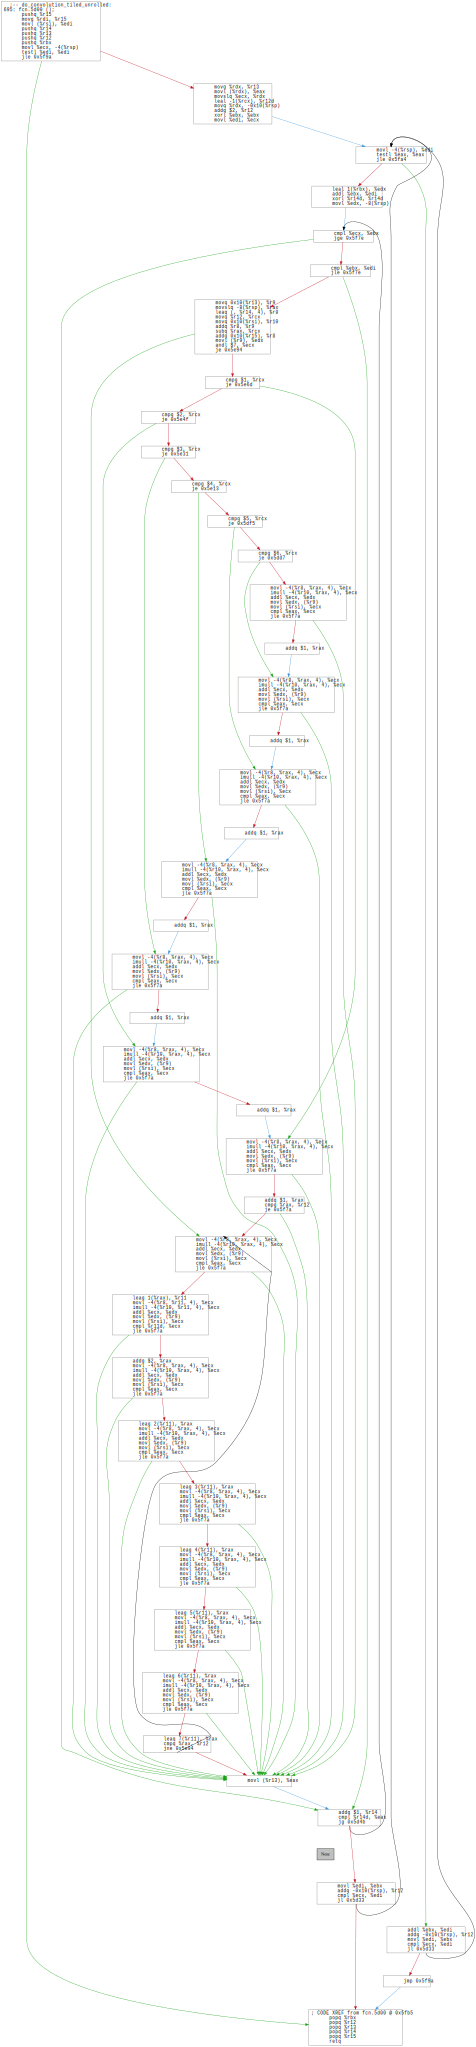

In [42]:
do_cfg("build/convolution.so", symbol="sym.do_convolution_tiled_unrolled", output="convolution2.png")

<div class="_solution">

What a mess!

It appears to be a huge jumble but it's not actually that complicated.  Here's the pseudo code for what's (roughly) going on the unrolled loop:

```
for(i =0; i < bound; i+=8) {
    do_iteration(i++);
    if (i <= bound) goto end;
    do_iteration(i++);
    if (i <= bound) goto end;
    do_iteration(i++);
    if (i <= bound) goto end;
    do_iteration(i++);
    if (i <= bound) goto end;
    do_iteration(i++);
    if (i <= bound) goto end;
    do_iteration(i++);
    if (i <= bound) goto end;
    do_iteration(i++);
    if (i <= bound) goto end;
    do_iteration(i++);
}
end:
```

It really isn't saving any loop bound checks, so it's not surprising that IC doesn't change much.

Don't give up yet!  We can do better.

We need to make the compiler's job easier.  The reason for all the bounds checks in the unrolled loop is that the bound could be anything.  If we constrain the loop bound, the compiler can unroll more efficiently.
    
We have not solved the problem, but we can now ask a more focused question.

</div>

<div class="question completeness">
    
<div class="question-text">

Go back up to the fiddle you worked on earlier.  Try to reduce loop overhead due to unrolling. Feel free to start with the code for `convolution_tiled_unrolled()`.

    
    I tried to do it but it did not work properly but definitely we should reduce loop iteration
</div>
    
</div>    

<div class="solution">

Most of the time, the inner loop runs from `jj` to `jj+tile_size`.  But, once every outer loop iteration, it might run fewer iterations if `jj+tile_size > kernel.size.x`.
    
As mentioned, in Lab 2, gcc likes to unroll loops 8 times.  This means that if `tile_size` is a multiple of 8, then the common case (`j = jj..jj+tile_size`) should not required any bounds checks in the unrolled loop body.  The compiler can just do this:

    
```
for(j = jj; j < jj + tile_size; i+=8) {
    do_iteration(i++);
    do_iteration(i++);
    do_iteration(i++);
    do_iteration(i++);
    do_iteration(i++);
    do_iteration(i++);
    do_iteration(i++);
    do_iteration(i++);
}
```

So, how can we 1) ensure that `tile_size % 8 == 0` and 2) separate out the `j = jj..jj+tile_size` case from the occasional boundary condition?  
                  
For #1, we can just check chop off the 3 low-order bits of `tile_size`.  Note that it's not sufficient to just pass multiples of 8 with `--tile-size` parameter, the compiler must know for certain that `tile_size` is multiple of 8.
    
For #2, we can check for the boundary condition and handle it as a special case, but do it _outside the loop_.  Then, we'll rely on the compiler to unroll:

</div>

In [57]:
render_code("convolution.cpp", show="do_convolution_tiled_split")

// convolution.cpp:208-230 (23 lines)
void __attribute__((optimize("unroll-loops"))) do_convolution_tiled_split(const tensor_t<uint32_t> & source, 
									  const tensor_t<uint32_t> & kernel,
									  tensor_t<uint32_t> & target, int32_t tile_size) {

	int32_t real_tile_size = tile_size/8 * 8; // this clears the low 3 bits.  Check the assembly!
	assert(tile_size>=8);

	for(int32_t jj = 0; jj < kernel.size.x; jj += real_tile_size) {  // Move the jj chunk loop outside
		for(int32_t i = 0; i < target.size.x; i++) {
			if (jj + real_tile_size > kernel.size.x) {
				for(int32_t j = jj; j < kernel.size.x; j++) {
					target.get(i,0,0,0) += source.get(i + j,0,0,0) * kernel.get(j,0,0,0);
				} 
			} else {
				for(int32_t j = jj; j < jj + real_tile_size; j++) {
					target.get(i,0,0,0) += source.get(i + j,0,0,0) * kernel.get(j,0,0,0);
				}
			}
		}
	}
	

}

In [ ]:
fiddle("convolution.cpp", function="convolution_tiled_split", analyze=False, name="convolution_tiled_split", run=["perf_count"], tagged_only=False, opt="-O3",
            cmdline=f"--size {64*1024} --size2 {16*1024} --size3 {64*1024}  --tile-size 64", perf_cmdline="--stat-set L1.cfg --MHz 3500")
data = render_csv("convolution.csv").append(render_csv("convolution_tiled_unrolled.csv")).append(render_csv("convolution_tiled_split.csv"))
data[["function", "size", "size2", "size3", "IC", "CPI", "CT", "ET", "L1_MPI"]] 

<div class="_solution">

Finally!  AT long last!  Speedup greater than 1! 1.46x in fact!

Let's checkout the CFG:

</div>

sym.do_convolution_tiled_split


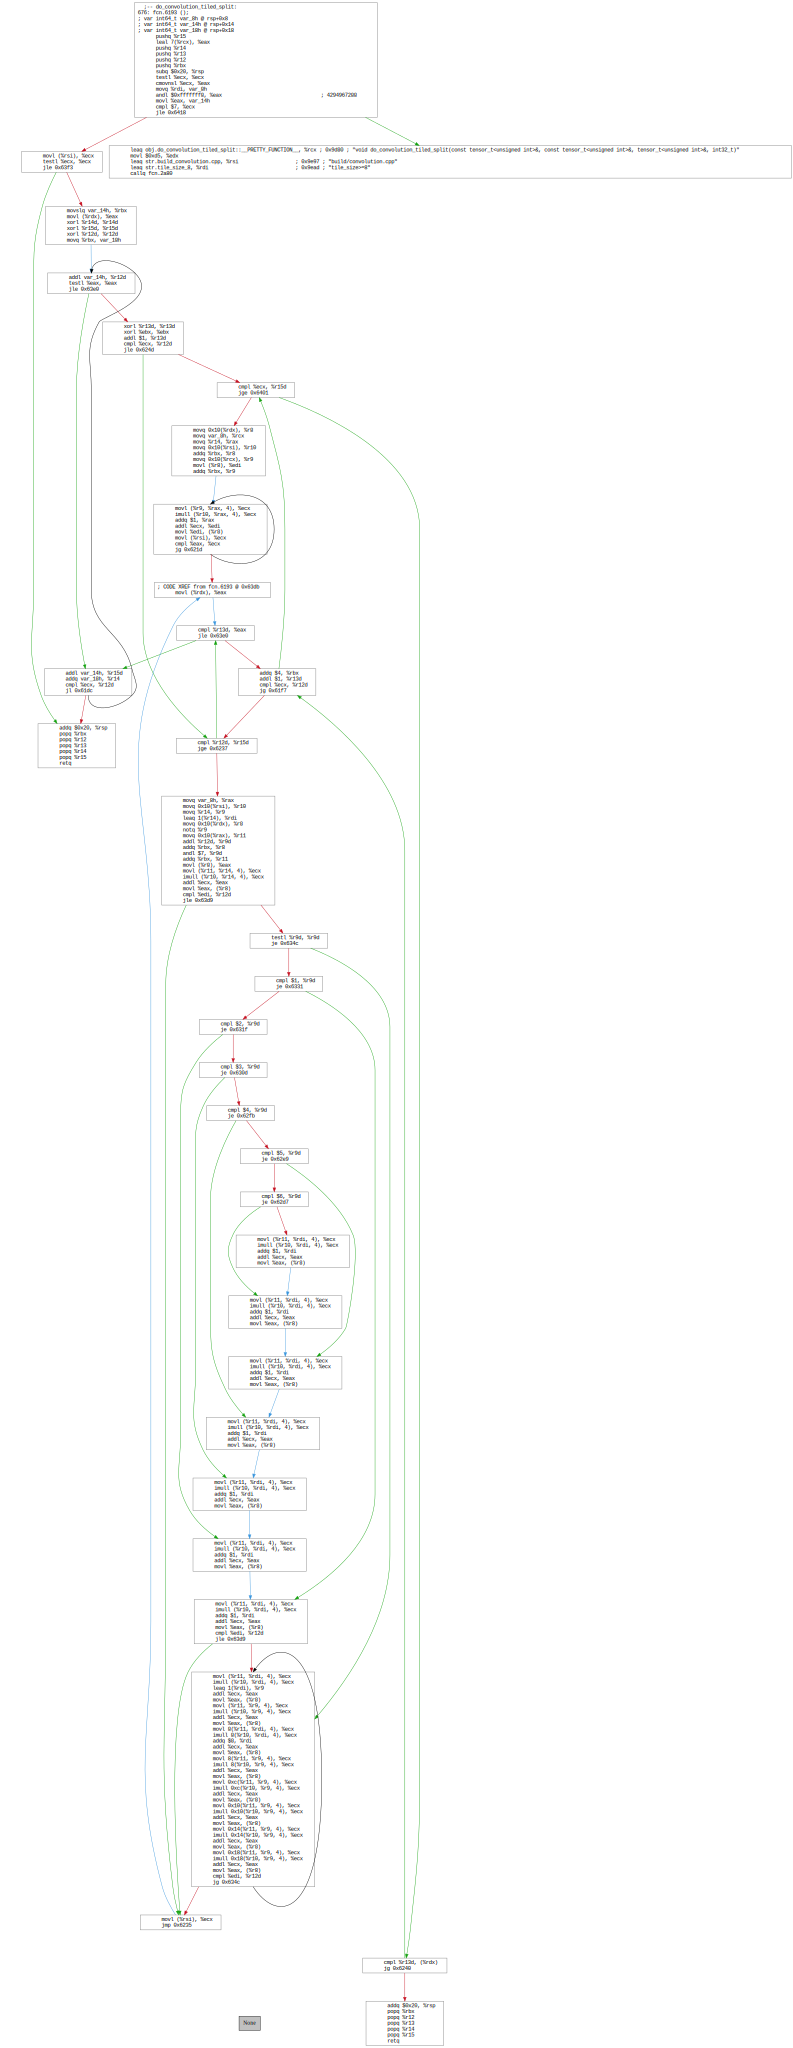

In [40]:
do_cfg("build/convolution.so", symbol="sym.do_convolution_tiled_split", output="convolution3.png")

<div class="_solution">

Check out that huge basic block!  Such efficiency!  Such an absence of loop condition checks!

</div>

### Discussion

Let's take a moment to think about why that was so hard.  Let's address two questions.

**First question** Why was it so hard to realize significant performance improvements for 1-D convolution by reducing cache misses?  

There are two main reasons:  First, the inner loop of convolution is very small, so the extra loop overhead from tiling really killed us.  If the loop body had been larger, the relative impact of the loop overhead would have been smaller.

Second, there was no loop-carried dependence between loads:  None of the loads in one iteration needed to finish before the loads in the next iteration could begin.  This means there was a lot of instruction level parallelism (ILP, which you are just learning about in 142) and, in particular, there is a lot of memory parallelism.  This mean that multiple loads (and probably multiple cache misses) ran in parallel.  When multiple long-latency operation run in parallel, we say their latency is "hidden".  We'll talk about that more in Lab 5.

**Second question** What lessons should you take away from this example? 

The most important lesson is about the process:  I made small changes, measured their impact, study the code to understand the cause, and made changes to try to improve things.  This is one part of how you should approach the programming assignment.

A secondary lesson is the "trick" with the `if` statement to make the common case faster.  You should _not_ just decide to apply that trick to every loop you encounter, but it is a good tool to have.  Like all manual optimizations, though, it should only be applied when you have data to suggest it'll work.

<div class="question optional">
    
<div class="question-text">

Take what you've learned about loop unrolling and see if you can speedup the `baseline` implementation _without_ tiling.  Can you beat the `tiled-split` version?
    
</div>
    
</div>    

<div class="question optional">
    
<div class="question-text">

I'm divided on whether the `if` around the two versions of the inner loop is elegant or ugly.  Can you find a more elegant way to express the loop bound that allows the compiler to unroll the loop effectively?  Do you think it makes the performance characteristics of the code more or less maintainable? ("maintainable" in this case means that it is unlikely that someone later will inadvertently change the code in a way the causes the compiler to no longer unroll the loop correctly)
    
</div>
    
</div>    

### Tuning Tile Size

Shockingly, we aren't done with 1D convolution yet!  What about the `tile_size`?  What's the right value?  

We could try to do some math to figure out exactly how big it should be, but at this point, you're tired and I so am I.  Let's just check experimentally.  We'll run it with powers of 2 from 8 to 8k and see what's best.  (We can't do 1, 2, or 4 because they are not multiples of 8)


In [41]:
fiddle("convolution.cpp", function="convolution_tiled_split", analyze=False, name="tile_size", run=["perf_count"], tagged_only=False, opt="-O3",
            cmdline=f"--size {64*1024} --size2 {16*1024} --size3 {64*1024}  --tile-size 8 16 32 64 128 256 1024 2048 4096 8192", perf_cmdline="--stat-set L1.cfg --MHz 3500")


Compiling your code...
make build/convolution.s build/convolution.so C_OPTS='-O3' fiddle.exe 
make: 'build/convolution.s' is up to date.
make: 'build/convolution.so' is up to date.
make: 'fiddle.exe' is up to date.

Running your code for perf_count...
Executing: ./fiddle.exe --lib ./build/convolution.so --function convolution_tiled_split --stats tile_size.csv --stat-set L1.cfg --MHz 3500 --size 65536 --size2 16384 --size3 65536  --tile-size 8 16 32 64 128 256 1024 2048 4096 8192
You are submitting a job for lab "Lab 4: Caches II" (caches2).
The due date for Lab 4: Caches II has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job 8148c7e7-0ebd-4c26-90c3-cd3735ff3b63 0.00 0.00
Ready for submission. 3.48 3.48
Job 8148c7e7-0ebd-4c26-90c3-cd3735ff3b63 is in state 'PUBLISHED'. 2.50 5.98 
Job 8148c7e7-0ebd-4c26-90c3-cd3735ff3b63 is in state 'SCHED

In [44]:
display(render_csv("tile_size.csv", columns=["tile_size", "IC", "CPI", "CT", "ET", "L1_MPI"]))
data = render_csv("convolution.csv").append(render_csv("convolution_tiled_unrolled.csv"))
data = data.append(render_csv("convolution_tiled_split.csv")).append(render_csv("tile_size.csv").iloc[6])
plotPE("tile_size.csv", what=[("tile_size", "IC"),("tile_size", "CPI"),("tile_size", "ET"), ("tile_size", "L1_MPI")], logx=2, lines=True)

,tile_size,IC,CPI,CT,ET,L1_MPI
0,8,8053083019,0.265972,2.870342e-10,0.614798,0.001563
1,16,5838481798,0.263200,2.870556e-10,0.441116,0.001077
2,32,4731181222,0.271787,2.870435e-10,0.369101,0.000665
3,64,4177530926,0.271230,2.870287e-10,0.325224,0.000377
4,128,3900705757,0.266834,2.869848e-10,0.298706,0.000202
5,256,3762293181,0.267056,2.869088e-10,0.288269,0.000105
6,1024,3658483770,0.272077,2.869063e-10,0.285584,0.000030
7,2048,3641182204,0.274236,2.868855e-10,0.286468,0.000025
8,4096,3632531450,0.285003,2.869114e-10,0.297034,0.002270
9,8192,3628206259,0.351943,2.869004e-10,0.366349,0.027825


TypeError: 'NoneType' object is not subscriptable

We want to minimize `ET`.  There's pretty broad minimum area where the `IC` (why does increasing `tile_size` reduce IC?) is pretty low and `CPI` is not too high due to `L1_MPI` shooting up when `tile_size` gets big enough to blow out the L1 cache.

Here's all our data so far:

In [45]:
display(data[["function", "tile_size","IC", "CPI", "CT", "ET", "L1_MPI"]])

,function,tile_size,IC,CPI,CT,ET,L1_MPI
0,convolution,64,6443141602,0.256273,2.869080e-10,0.473743,0.015615
1,convolution_tiled,64,8254248618,0.302824,2.869338e-10,0.717214,0.000191
0,convolution_tiled_unrolled,64,6882710657,0.222882,2.869581e-10,0.440202,0.000229


Turing `tile_size` gave us an additional 0.32/0.27 = 1.14x.  This is mostly from reducing `IC`.  Interestingly, we also dropped `L1_MPI` by a factor of 10, although it was already very low, so the impact is negligible.

There's one more things we'll try before call it a day:  We can help the compiler a bit more by converting `tile_size` to a constant:

In [58]:
render_code("convolution.cpp", show="do_convolution_tiled_fixed_tile")

// convolution.cpp:256-279 (24 lines)
void __attribute__((optimize("unroll-loops"))) do_convolution_tiled_fixed_tile(const tensor_t<uint32_t> & source, 
									  const tensor_t<uint32_t> & kernel,
									  tensor_t<uint32_t> & target, int32_t tile_size) {

#define real_tile_size 1024
//	int32_t real_tile_size = tile_size/8 * 8; // this clears the low 3 bits.  Check the assembly!

	
	for(int32_t jj = 0; jj < kernel.size.x; jj += real_tile_size) {  // Move the jj chunk loop outside
		for(int32_t i = 0; i < target.size.x; i++) {
			if (jj + real_tile_size > kernel.size.x) {
				for(int32_t j = jj; j < kernel.size.x; j++) {
					target.get(i,0,0,0) += source.get(i + j,0,0,0) * kernel.get(j,0,0,0);
				} 
			} else {
				for(int32_t j = jj; j < jj + real_tile_size; j++) {
					target.get(i,0,0,0) += source.get(i + j,0,0,0) * kernel.get(j,0,0,0);
				}
			}
		}
	}
	

}

In [48]:
fiddle("convolution.cpp", function="convolution_tiled_fixed_tile", analyze=False, name="convolution_tiled_fixed_tile", run=["perf_count"], tagged_only=False, opt="-O3",
            cmdline=f"--size {64*1024} --size2 {16*1024} --size3 {64*1024}  --tile-size 1024 ", perf_cmdline="--stat-set L1.cfg --MHz 3500")
data = render_csv("convolution.csv").append(render_csv("convolution_tiled_unrolled.csv"))
data = data.append(render_csv("convolution_tiled_split.csv")).append(render_csv("tile_size.csv").iloc[6]).append(render_csv("convolution_tiled_fixed_tile.csv"))
display(data[["function", "tile_size","IC", "CPI", "CT", "ET", "L1_MPI"]])

Compiling your code...
make build/convolution.s build/convolution.so C_OPTS='-O3' fiddle.exe 
make: 'build/convolution.s' is up to date.
make: 'build/convolution.so' is up to date.
make: 'fiddle.exe' is up to date.

Running your code for perf_count...
Executing: ./fiddle.exe --lib ./build/convolution.so --function convolution_tiled_fixed_tile --stats convolution_tiled_fixed_tile.csv --stat-set L1.cfg --MHz 3500 --size 65536 --size2 16384 --size3 65536  --tile-size 1024 
You are submitting a job for lab "Lab 4: Caches II" (caches2).
The due date for Lab 4: Caches II has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job e6cc33e8-91cc-4320-b55d-1f46301d093f 0.00 0.00
Ready for submission. 3.57 3.57
Job e6cc33e8-91cc-4320-b55d-1f46301d093f is in state 'PUBLISHED'. 3.88 7.45 
Job e6cc33e8-91cc-4320-b55d-1f46301d093f is in state 'RUNNING'. 1.05

TypeError: 'NoneType' object is not subscriptable

That's worth another 3% and brings up the total speedup (all from reduced `IC`) to 0.47/0.26 = 1.74x.

Ok.  We are now done with 1-D convolutions.

# Programming Assignment

For your programming assignment in this lab you'll be optimizing a specialized version of matrix multiply called "matrix exponentiation".  The input to your program will be a square matrix, $M$, (stored in a `tensor_t`) and a power, $p$, and your job is to compute $M^p$ as quickly as possible.

The expression $M^p$ means $M$ multiplied by itself, $p$ times, where multiplication is normal matrix multiplication.

This computation has a variety of applications.  For instance, you can use this algorithm to evaluate Markov Chains.

For this assignment we'll be computing on `tensor_t<uint64_t>`.  Many applications would use `float` or `double`, but that problem is harder due [numerical instability](https://en.wikipedia.org/wiki/Numerical_stability) issues.  You don't need to worry about integer overflow in this assignment.  It will happen a lot, and it's consider the "correct" behavior for the purposes of this lab.

## Reference Code

The reference implementation is in `matexp_reference.hpp`:

In [67]:
render_code("matexp_reference.hpp")

// matexp_reference.hpp:1-74 (74 lines)
#ifndef MATEXP_REFERENCE_INCLUDED
#define MATEXP_REFERENCE_INCLUDED
#include <cstdlib>
#include "archlab.hpp"
#include <unistd.h>
#include<cstdint>
#include"function_map.hpp"
#include"tensor_t.hpp"
#include"pin_tags.h"



template<typename T>
void  __attribute__((noinline,optimize("Og"))) mult_reference(tensor_t<T> &C, const tensor_t<T> &A, const tensor_t<T> &B)
{
	// This is just textbook matrix multiplication.
	
	for(int i = 0; i < C.size.x; i++) { 
		for(int j = 0; j < C.size.y; j++) {
			C.get(i,j) = 0;
			for(int k = 0; k < B.size.x; k++) {
				C.get(i,j) += A.get(i,k) * B.get(k,j);
			}
		}
	}
}

template<typename T>
void __attribute__((noinline,optimize("Og"))) matexp_reference(tensor_t<T> & dst, const tensor_t<T> & A, uint32_t power,
		      // parameters you can use for whatever purpose you want (e.g., tile sizes)
		      int64_t p1=1,
		      int64_t p2=1,
		      int64_t p3=1,
		      int64_t p4=1,
		      int64_t p5=1) {
	// Tags for moneta
	
	TAG_START("dst", dst.start_address(), dst.end_address(), false);
	TAG_START("A", A.start_address(), A.end_address(), false);

	// In psuedo code this just
	//
	// dst = I
	// for(i = 0..p)
	//    dst = dst * A
	
	// Start off with the identity matrix, since M^0 == I
	// The result will end up in dst when we are done.
	for(int32_t x = 0; x < dst.size.x; x++) {
		for(int32_t y = 0; y < dst.size.y; y++) {
			if (x == y) {
				dst.get(x,y) = 1;
			} else {
				dst.get(x,y) = 0;
			}	
		}
	}


	for(uint32_t p = 0; p < power; p++) {
		tensor_t<T> B(dst); // Copy dst, since we are going to modify it.
		TAG_START("B", B.start_address(), B.end_address(), false);
		mult_reference(dst,B,A); // multiply!
		TAG_STOP("B");
	
	}

	TAG_STOP("dst");
	TAG_STOP("A");

}

#endif

Read through the code and comments to make sure you understand what the code is doing. 

## Detailed Requirements

The requirements for the lab are pretty simple:

1. $M$ will be square and it's width/height will be less than 2048.
2. $p$ will be less than or equal to 1024.
3. $p$ will be greater than or equal to 0.
4. Like `matexp_reference`, your function need to be a template function, but you can assume that `T` is always `uint64_t`.
5. Values in $M$ can be any `uint64_t` value.
6. Your output must match the output of the code in `matexp_reference.hpp`.
7. Your implementation should go in `matexp_solution.hpp`.  The starter version is just a copy of `matexp_reference.hpp`.


## Running the Code

The driver code for the lab is in `matexp_main.cpp` and `matexp.cpp`.  `matexp_main.cpp` is mostly command line processing (take a look if you want).  `matexp.cpp` is what actually calls your code:

In [68]:
render_code("matexp.cpp")

// matexp.cpp:1-115 (115 lines)
#include"matexp_reference.hpp"
#include"matexp_solution.hpp"

#define ELEMENT_TYPE uint64_t

typedef std::tuple<int, int> Bench;

std::vector<Bench> benches = {
	std::make_tuple(600, 2),
	std::make_tuple(350, 25),
	std::make_tuple(120, 320),
};

#define ITERATIONS 8

extern "C"
void bench_solution(tensor_t<ELEMENT_TYPE> & d, const tensor_t<ELEMENT_TYPE> & C, uint32_t p,
		    uint64_t seed,
		    int64_t p1=1,
		    int64_t p2=1,
		    int64_t p3=1,
		    int64_t p4=1,
		    int64_t p5=1) {
	
	for(auto b : benches) {
		auto size = std::get<0>(b);
		auto power = std::get<1>(b);
		
		tensor_t<ELEMENT_TYPE> D(size,size);
		tensor_t<ELEMENT_TYPE> A(size,size);
		randomize(A, seed, 0, 1024);
		
		ArchLabTimer timer;
		timer.attr("size", size);
		timer.attr("power", power);
		timer.go();
		for(int i = 0; i < ITERATIONS; i++) {
			matexp_solution<ELEMENT_TYPE>(D, A, power, p1,p2,p3,p4,p5);
		}
	} 
}
FUNCTION(matexp_bench, bench_solution);


extern "C"
void bench_reference(tensor_t<ELEMENT_TYPE> & d, const tensor_t<ELEMENT_TYPE> & C, uint32_t p,
		     uint64_t seed,
		     int64_t p1=1,
		     int64_t p2=1,
		     int64_t p3=1,
		     int64_t p4=1,
		     int64_t p5=1) {

	for(auto b : benches) {
		auto size = std::get<0>(b);
		auto power = std::get<1>(b);
		
		tensor_t<ELEMENT_TYPE> D(size,size);
		tensor_t<ELEMENT_TYPE> A(size,size);
		randomize(A, seed, 0,1024);
		
		ArchLabTimer timer;
		timer.attr("size", size);
		timer.attr("power", power);
		timer.go();
		for(int i = 0; i < ITERATIONS; i++) {
			matexp_reference<ELEMENT_TYPE>(D, A, power);
		}
		
	} 
}
FUNCTION(matexp_bench, bench_reference);


extern "C"
void matexp_reference_c(tensor_t<ELEMENT_TYPE> & dst, const tensor_t<ELEMENT_TYPE> & A, uint32_t power,
			uint64_t seed,
			int64_t p1=1,
			int64_t p2=1,
			int64_t p3=1,
			int64_t p4=1,
			int64_t p5=1)
{
	ArchLabTimer timer;					
	timer.attr("size", dst.size.x);
	timer.attr("power", power);
	timer.go();
	for(int i = 0; i < ITERATIONS; i++) {
		matexp_reference<ELEMENT_TYPE>(dst, A, power, p1, p2, p3, p4, p5);
	}
//	std::cerr << dst << "\n";
}
FUNCTION(matexp, matexp_reference_c);


extern "C"
void matexp_solution_c(tensor_t<ELEMENT_TYPE> & dst, const tensor_t<ELEMENT_TYPE> & A, uint32_t power,
		       uint64_t seed,
		       int64_t p1=1,
		       int64_t p2=1,
		       int64_t p3=1,
		       int64_t p4=1,
		       int64_t p5=1)
{
	ArchLabTimer timer;					
	timer.attr("size", dst.size.x);
	timer.attr("power", power);
	timer.go();
	for(int i = 0; i < ITERATIONS; i++) {
		matexp_solution<ELEMENT_TYPE>(dst, A, power, p1, p2, p3, p4, p5);
	}
//	std::cerr << dst << "\n";
}
FUNCTION(matexp, matexp_solution_c);

It defines four functions:

* `matexp_reference_c` Calls the starter code with `size`x`size` matrix and `power`.
* `matexp_solution_c` Calls your code with `size`x`size` matrix and `power`.
* `bench_reference` Runs benchmarks we will use for grading for the starter code.
* `bench_solution` Runs benchmarks we will use for grading for your code.

It runs everything 8 times to get a more reliable measurement.

To invoke these, you can build and run `matexp.exe`:

In [69]:

!make matexp.exe
!./matexp.exe

mkdir -p build/
cp matexp_main.cpp build/matexp_main.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -O3 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/matexp_main.cpp -o build/matexp_main.o
mkdir -p build/
cp matexp.cpp build/matexp.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -O3 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/matexp.cpp -o build/matexp.o
g++-8 build/matexp_main.o build/matexp.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o matexp.exe
registering function: bench_solution
registering function: bench_reference
registering func

`matexp.exe` takes several command line parameters:

In [70]:


!./matexp.exe --help

registering function: bench_solution
registering function: bench_reference
registering function: matexp_reference_c
registering function: matexp_solution_c
ArchLab driver:
  --MHz arg (=-1)                       Which clock rate to run.  Possibilities
                                        on this machine are: -1 
  --function arg (=ALL)                 Which functions to run.
  --power arg (=16)                     Power.  Pass multiple values to run 
                                        with multiple sizes.
  --size arg (=16)                      Size.  Pass multiple values to run with
                                        multiple sizes.
  --p1 arg (=1)                         Parameter 1.
  --p2 arg (=1)                         Parameter 2.
  --p3 arg (=1)                         Parameter 3.
  --p4 arg (=1)                         Parameter 4.
  --p5 arg (=1)                         Parameter 5.
  --min arg (=-1)                       mininum random value in tensors
  --max 

The notable ones are:

1. `--size` -- set the size of the matrix to multiply.
2. `--power` -- set the power to raise it to.
3. `--p1` to `--p5` -- set parameters (see below.)
4. `--function` what functions to run.
5. `--seed` set the random seed.
6. `--stats-file` sets where statistics should go.

The first five of these can take multiple values and `matexp.exe` will run all combinations and they will end up in `stats.csv`:

In [71]:


!./matexp.exe --function matexp_reference_c matexp_solution_c --size 10 20 --power 4 8
render_csv("stats.csv", columns=["function", "size", "power", "seed"])

registering function: bench_solution
registering function: bench_reference
registering function: matexp_reference_c
registering function: matexp_solution_c
Loading Native engine.
Gonna run matexp_reference_c
Gonna run matexp_solution_c
Running matexp_reference_c
.Running matexp_solution_c
.
Running matexp_reference_c
.Running matexp_solution_c
.
Running matexp_reference_c
.Running matexp_solution_c
.
Running matexp_reference_c
.Running matexp_solution_c
.


,function,size,power,seed
0,matexp_reference_c,10,4,1780598545595973480
1,matexp_solution_c,10,4,14013753404179875564
2,matexp_reference_c,10,8,15411833482527428592
3,matexp_solution_c,10,8,162025179874764392
4,matexp_reference_c,20,4,14291825682304283883
5,matexp_solution_c,20,4,17616420176563439203
6,matexp_reference_c,20,8,17062605709943824701
7,matexp_solution_c,20,8,5350644618842467521


And, of course, we run it all in the cloud (we've added `--stat-set L1.cfg` to gather cache and TLB statistics):

In [72]:

!make matexp.exe
!cse142 job run --lab caches2 "./matexp.exe --stat-set L1.cfg --function matexp_reference_c matexp_solution_c --size 10 20 --power 4 8"
render_csv("stats.csv", columns=pa_columns)

make: 'matexp.exe' is up to date.
You are submitting a job for lab "Lab 4: Caches II" (caches2).
The due date for Lab 4: Caches II has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job b1dcd362-cb07-4c07-bace-0fadfb16f7cc 0.00 0.00
Ready for submission. 5.82 5.82
Job b1dcd362-cb07-4c07-bace-0fadfb16f7cc is in state 'PUBLISHED'. 3.26 9.08 
Job b1dcd362-cb07-4c07-bace-0fadfb16f7cc is in state 'RUNNING'. 1.05 10.12. 
Job b1dcd362-cb07-4c07-bace-0fadfb16f7cc is in state 'DONE_RUNNING'. 2.08 12.20... 
Job b1dcd362-cb07-4c07-bace-0fadfb16f7cc succeeded. 4.18 16.38Writing results 1.00 17.38
registering function: bench_solution
registering function: bench_reference
registering function: matexp_reference_c
registering function: matexp_solution_c
Loading PAPI engine.
Tracking PAPI_TOT_INS
Tracking PAPI_TOT_CYC
Tracking PAPI_L1_DCM
Tracking PAPI_TLB

,function,seed,size,power,p1,p2,p3,p4,p5,IC,CPI,CT,ET,L1_MPI,TLB_MPI,L1_cache_misses,TLB_misses
0,matexp_reference_c,1780598545595973480,10,4,1,1,1,1,1,840250,0.315726,2.902842e-10,0.000077,0.000118,0.000015,99,13
1,matexp_solution_c,14013753404179875564,10,4,1,1,1,1,1,569938,0.350431,2.876914e-10,0.000057,0.000191,0.000016,109,9
2,matexp_reference_c,15411833482527428592,10,8,1,1,1,1,1,1668431,0.307147,2.842670e-10,0.000146,0.000055,0.000004,92,7
3,matexp_solution_c,162025179874764392,10,8,1,1,1,1,1,851551,0.337623,2.836115e-10,0.000082,0.000126,0.000009,107,8
4,matexp_reference_c,14291825682304283883,20,4,1,1,1,1,1,6405329,0.292872,2.891361e-10,0.000542,0.000038,0.000002,242,14
5,matexp_solution_c,17616420176563439203,20,4,1,1,1,1,1,3818073,0.321017,2.876978e-10,0.000353,0.000065,0.000005,249,18
6,matexp_reference_c,17062605709943824701,20,8,1,1,1,1,1,12769491,0.290866,2.889879e-10,0.001073,0.000029,0.000001,371,14
7,matexp_solution_c,5350644618842467521,20,8,1,1,1,1,1,5720587,0.320619,2.894876e-10,0.000531,0.000062,0.000003,355,18


## Setting Parameters

One of the key parts of this lab is setting parameters (e.g., tiling sizes), and the `matexp.exe` has support for this built in vias the `--p1` -- `--p5` command line options and function parameters.

You can use these for whatever you'd like:

1.  Setting tile sizes.
2.  Selecting among different implementations.
3.  Whatever else.

Their default value is 1.

Just like `--size` and `--power`, you can multiple values and `matexp.exe` will run all combinations.  For example:

In [73]:

!cse142 job run --lab caches2 "./matexp.exe --stat-set L1.cfg --function matexp_reference_c matexp_solution_c --size 10 20 --power 4 8 --p1 1 2 --p2 3 4 "

You are submitting a job for lab "Lab 4: Caches II" (caches2).
The due date for Lab 4: Caches II has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job 01f47336-0c62-49e0-ac17-6d5419f1dd80 0.00 0.00
Ready for submission. 3.97 3.97
Job 01f47336-0c62-49e0-ac17-6d5419f1dd80 is in state 'PUBLISHED'. 2.23 6.20 
Job 01f47336-0c62-49e0-ac17-6d5419f1dd80 is in state 'RUNNING'. 1.05 7.24.. 
Job 01f47336-0c62-49e0-ac17-6d5419f1dd80 is in state 'DONE_RUNNING'. 3.15 10.39.. 
Job 01f47336-0c62-49e0-ac17-6d5419f1dd80 succeeded. 3.14 13.53Writing results 1.00 14.53
registering function: bench_solution
registering function: bench_reference
registering function: matexp_reference_c
registering function: matexp_solution_c
Loading PAPI engine.
Tracking PAPI_TOT_INS
Tracking PAPI_TOT_CYC
Tracking PAPI_L1_DCM
Tracking PAPI_TLB_DM
Gonna run matexp_reference_c
Go

In [74]:
render_csv("stats.csv", columns=pa_columns)

,function,seed,size,power,p1,p2,p3,p4,p5,IC,CPI,CT,ET,L1_MPI,TLB_MPI,L1_cache_misses,TLB_misses
0,matexp_reference_c,1780598545595973480,10,4,1,3,1,1,1,840249,0.314995,2.837523e-10,0.000075,0.000145,0.000013,122,11
1,matexp_solution_c,14013753404179875564,10,4,1,3,1,1,1,570042,0.353430,3.041325e-10,0.000061,0.000267,0.000030,152,17
2,matexp_reference_c,15411833482527428592,10,4,1,4,1,1,1,840078,0.312711,2.804369e-10,0.000074,0.000137,0.000006,115,5
3,matexp_solution_c,162025179874764392,10,4,1,4,1,1,1,569870,0.352063,2.780738e-10,0.000056,0.000237,0.000016,135,9
4,matexp_reference_c,528455024089156985,10,4,2,3,1,1,1,840079,0.314284,2.826459e-10,0.000075,0.000144,0.000013,121,11
5,matexp_solution_c,2244821756807280952,10,4,2,3,1,1,1,569872,0.355931,2.832789e-10,0.000057,0.000246,0.000025,140,14
6,matexp_reference_c,8919232536781977739,10,4,2,4,1,1,1,840079,0.314849,2.830397e-10,0.000075,0.000146,0.000011,123,9
7,matexp_solution_c,14291825682304283883,10,4,2,4,1,1,1,569872,0.353525,2.840232e-10,0.000057,0.000247,0.000019,141,11
8,matexp_reference_c,10558919176646779355,10,8,1,3,1,1,1,1668432,0.306675,2.930921e-10,0.000150,0.000089,0.000007,149,12
9,matexp_solution_c,1584617725208892958,10,8,1,3,1,1,1,851656,0.342849,2.857865e-10,0.000083,0.000162,0.000014,138,12


**Tips for Using Parameters**

1.  Running multiple values of multiple parameters can result in a lot of experiments... sometimes too many.
2.  Jobs in the cloud are limited to 5 minutes, so you need to limit the number of tests per job.
3.  That said, exploring a wide space of parameter settings can be an effective way to optimize your code.  There are tips in the "Looking at Data Section" about how to deal with lots of data.

## The Test Suite


<div class="alert alert-block alert-success">

**Tests are great:** Tests are about the best thing ever (although writing them is a hassle). If you run the tests consistently, you can worry _much_ less about correctness.  Make small incremental changes to your code, run the tests after each change and enjoy the warm glow of happiness when they pass!
    
</div>

<div class="alert alert-block alert-info">

**NOTE:** You normally will not need to run `run_tests.exe` in the cloud.  It'll work fine, but it takes longer which will slow your work down.  The test suite is about _correctness_ not performance.
     
</div>

The lab  provides a comprehensive test suite for your implementation.  The code in is `run_test.cpp`.  `run_tests.exe` also takes the `--p*` arguments so you can run the regressions with different parameter settings.  This is a _good_ idea.

You can build the tests with:

In [75]:

!make run_tests.exe
!./run_tests.exe

mkdir -p build/
cp run_tests.cpp build/run_tests.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -O3 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/run_tests.cpp -o build/run_tests.o
g++-8 build/run_tests.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl   -L/lib -lgtest -lgtest_main  -o run_tests.exe
Loading Native engine.
[==========] Running 47 tests from 3 test suites.
[----------] Global test environment set-up.
[----------] 4 tests from MatexpTests
[ RUN      ] MatexpTests.one_test
Running one_test with size=16; power=16
[       OK ] MatexpTests.one_test (0 ms)
[ RUN      ] MatexpTests.simple_tests
[       OK ] MatexpTests.simple_tests (0 ms)
[ RUN      ] MatexpTests.simple_random_tests
[       OK ] MatexpTests.simple_rand

### Test Suite Details

You can list all the tests with:

In [76]:
!./run_tests.exe --gtest_list_tests

Loading Native engine.
MatexpTests.
  one_test
  simple_tests
  simple_random_tests
  randomize_tests
MatexpBench.
  bench_tests
MatexpTests/MatexpTestFixture.
  ExpTest/0  # GetParam() = (1, 0)
  ExpTest/1  # GetParam() = (8, 0)
  ExpTest/2  # GetParam() = (64, 0)
  ExpTest/3  # GetParam() = (3, 0)
  ExpTest/4  # GetParam() = (27, 0)
  ExpTest/5  # GetParam() = (243, 0)
  ExpTest/6  # GetParam() = (1, 1)
  ExpTest/7  # GetParam() = (8, 1)
  ExpTest/8  # GetParam() = (64, 1)
  ExpTest/9  # GetParam() = (3, 1)
  ExpTest/10  # GetParam() = (27, 1)
  ExpTest/11  # GetParam() = (243, 1)
  ExpTest/12  # GetParam() = (1, 2)
  ExpTest/13  # GetParam() = (8, 2)
  ExpTest/14  # GetParam() = (64, 2)
  ExpTest/15  # GetParam() = (4, 2)
  ExpTest/16  # GetParam() = (26, 2)
  ExpTest/17  # GetParam() = (242, 2)
  ExpTest/18  # GetParam() = (1, 3)
  ExpTest/19  # GetParam() = (8, 3)
  ExpTest/20  # GetParam() = (64, 3)
  ExpTest/21  # GetParam() = (5, 3)
  ExpTest/22  # GetParam() = (23, 3)
  ExpTes

The first group of tests is (under `MatexpTests`), contains four simple tests that call `do_simple_diag_test()` and `do_simple_offdiag_test()`:

In [77]:
render_code("run_tests.cpp", show=("//START1", "//END1"))

// run_tests.cpp:26-60 (35 lines)
//START1
	void do_simple_diag_test(int size, int power) {
		tensor_t<ELEMENT_TYPE> A(size,size);
		tensor_t<ELEMENT_TYPE> B(size,size);
		for(int j = 0; j < size; j++) {
			A(j,j) = 2;
			B(j,j) = 1 << power;
		}
		
		tensor_t<ELEMENT_TYPE> C(size,size);
		
		matexp_solution(C, A, power, gp1, gp2, gp3, gp4, gp5);
		ASSERT_TENSORS_EQ(ELEMENT_TYPE, C,B) << "diagonal matrix squaring check failed\n" << A << "\nRAISED TO THE " << power << " SHOULD BE  \n" << B << "\nYOUR CODE GOT\n" << C<< "\n";
	}

	void do_simple_offdiag_test(int size, int power) {
		tensor_t<ELEMENT_TYPE> A(size,size);
		tensor_t<ELEMENT_TYPE> B(size,size);
		for(int j = 0; j < size; j++) {
			A(j,size-j-1) = 2;
			if ((power % 2) == 0) {
				B(j,j) = 1 << power; // for even power the result is diagonal
			} else {
				B(j,size-j-1) = 1 << power; // for odd powers its off-diagonal.
								
			}
		}
		
		tensor_t<ELEMENT_TYPE> C(size,size);
		
		matexp_solution(C, A, power, gp1, gp2, gp3, gp4, gp5);
		ASSERT_TENSORS_EQ(ELEMENT_TYPE, C,B) << "off-diagonal matrix squaring check failed\n" << A << "\nRAISED TO THE " << power << " SHOULD BE  \n" << B << "\nYOUR CODE GOT\n" << C<< "\n";
	}

//END1

These two functions take a diagonal or off-diagonal matrix and raise them to a power.  It's easy to calculate the correct results for these computations, so they make good tests.

These tests are:

1. `one_test` runs the two functions above for a given size.
2. `simple_tests` runs the two functions above for a set of small test cases.
3. `simple_random_tests` runs the two functions for 10 randomly generate test cases.

The final test in this group (`randomize_tests`) calls `do_test()` which compares the output `matexp_reference.hpp` with `matexp_solution.hpp` for randomized test cases.

The second group of tests the `size`s and `power`s that the benchmark uses.

The third group of tests (under `MatexpTests/MatexpTestFixture`) calls `do_test` with a bunch of test cases of various sizes.

## Things To Try

There are two main challenges I see in this lab:

1. Make matrix multiplication fast, primarily by improving it's memory behavior.
2. Applying matrix multiplication efficiently to compute $M^p$.

The benchmarks are structured to evaluate your solution's success on both of these challenges.

### Tiling Matrix Multiplication

#### For next time

Tiling is worth about 1.2x.  Mention -- optimization for special cases. Efficient copying.


The obvious approach to improving cache performance is tiling and renesting.  You saw an example of this with 1-D convolution, and the principle is the same, but the problem is a little more complex because there is an extra loop.

There are two ways to approach this task and you should try to apply both at once:

1.  You should think about the data access pattern of matrix multiply in terms of temporal and spatial locality.  
    1.  How can you maximize spatial locality?
    2.  Don't forget to consider all three matrices.
    3.  How large can the tile size be while still fitting in the cache?
2.  You should try different tiling schemes:
    1.  Different ways to split and renest the three loops.
    2.  Different tile sizes (`--p1` to `--p5` are provided for this purpose)
3.  Debugging tiling
    1.  Debugging tiling can be tricky.
    2.  Start with small matrices and small tile sizes.
    3.  Try multiple small tile sizes (pass `--p*` to the regressions)
3.  Don't forget about loop overhead.

There's a nice [Wikipedia page](https://en.wikipedia.org/wiki/Matrix_multiplication_algorithm) about matrix multiplication.  It covers the theory behind implementing it effectively.  The content is good, but don't assume that theory and practice will match.


### Raising to a Power

Computing $M^p$ can done more efficiently than multiplying $M$ by itself $p$ times (which is what the reference code does).  By way of a hint, remember that:

$$M^{p+q} = M^pM^q$$

As you work on this part of the problem, I suggest practicing with integers first.  I found it useful to code my solution with integers and test it and then rewrite it for matrices.

### Using the Test Suite

The test suite is meant to help keep you on the right track as you go through the assignment.  When you make a change to you code, I would:

1.  Run all the tests.  If they all pass, great!
2.  If some fail, run `simple_tests` and then `simple_random_tests`.
3.  Once I find a particular test case that fails, I'd use `one_test` to run just that configuration while debugging.

If and when you make use of parameters (`--p1` etc.), I'd try out the values of interest with `./run_tests.exe` before bothering to run code in the cloud.

One debugging tip:  `tensor_t.hpp` includes support for the `<<` operator so you can say

```
std::cerr << my_tensor
```

This can be very helpful when debugging.


## Useful C++

There are few things in C++ that might be useful in this lab.

### Controlling Compiler Optimizations

First, you can prevent inlining of a particular function by declaring it like so:

```
void __attribute__((noinline)) matexp_solution(...)
```

This can make it easier to debug, because you can set a breakpoint on the function and it'll work like you expect.

Second, you can turn on arbitrary optimizations for particular functions like so:

```
#pragma GCC push_options
#pragma GCC optimize ("unroll-loops")

void your_function() {
}

#pragma GCC pop_options
```


### Assertions

The `assert()` macro is useful tool for debugging and to avoid silly errors.

If you say

```
assert(a > b);
```

And the expression is not true at run time, the assert with "fail" your program will crash with a somewhat useful error message.

This is a useful way to document and enforce assumptions you make in your code.  For instance, I used an assert in `convolution_tiled_split()` to ensure that the tile size was > 8.

You can get access to  `assert()` with 

```
#include<cassert>
```

The overhead of asserts is low, but not zero.  I would not put any in one of your performance-critical loops.

If you want to include asserts in performance-critical areas, you can add `-DNDEBUG` to the optimizations in `config.make`.  It'll disable all the `assert()`s.


## Do Your Work Here

Below are the key commands you'll need to make progress on the lab.

### Setting Optimization Flags

As in your last lab, you can set optimization flags in `config.make`.  The baseline includes `-Og`:

In [78]:
render_code("config.make")

// config.make:1-4 (4 lines)
MATEXP_OPTIMIZE=-O3

### Compiling and Running

You can compile and the benchmarks locally using this command.  This is only useful for debugging.  Performance running locally is not very meaningful:

In [79]:

!make matexp.exe
!./matexp.exe

make: 'matexp.exe' is up to date.
registering function: bench_solution
registering function: bench_reference
registering function: matexp_reference_c
registering function: matexp_solution_c
Loading Native engine.
Gonna run bench_reference
Gonna run bench_solution
Gonna run matexp_reference_c
Gonna run matexp_solution_c
Running bench_reference
.Running bench_solution
.Running matexp_reference_c
.Running matexp_solution_c
.


Run the benchmark in the cloud and compare your performance with the reference.

In [80]:

!make matexp.exe
!cse142 job run --lab caches2 --take ./matexp.exe --take L1.cfg  --force "./matexp.exe --MHz 3500 --stat-set ./L1.cfg  --function bench_solution  --p1 1 --p2 1 --p3 1  --p4 1 --p5 1"

make: 'matexp.exe' is up to date.
You are submitting a job for lab "Lab 4: Caches II" (caches2).
The due date for Lab 4: Caches II has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job b5a25f80-ddaa-4844-9781-94f46402b4e6 0.00 0.00
Ready for submission. 2.53 2.53
Job b5a25f80-ddaa-4844-9781-94f46402b4e6 is in state 'PUBLISHED'. 3.05 5.58 
Job b5a25f80-ddaa-4844-9781-94f46402b4e6 is in state 'RUNNING'. 1.05 6.63.... 
Job b5a25f80-ddaa-4844-9781-94f46402b4e6 is in state 'DONE_RUNNING'. 5.21 11.84.. 
Job b5a25f80-ddaa-4844-9781-94f46402b4e6 succeeded. 3.13 14.98Writing results 1.00 15.98
registering function: bench_solution
registering function: bench_reference
registering function: matexp_reference_c
registering function: matexp_solution_c
Loading PAPI engine.
Tracking PAPI_TOT_INS
Tracking PAPI_TOT_CYC
Tracking PAPI_L1_DCM
Tracking PAPI_TL

Look at the results

In [81]:

render_csv("stats.csv", columns=pa_columns)

,function,seed,size,power,p1,p2,p3,p4,p5,IC,CPI,CT,ET,L1_MPI,TLB_MPI,L1_cache_misses,TLB_misses
0,bench_solution,4773489923190229768,600,2,1,1,1,1,1,16103347454,0.291888,2.898991e-10,1.362634,0.001526,2.957745e-05,24571504,476296
1,bench_solution,4773489923190229768,350,25,1,1,1,1,1,24006078562,0.292092,2.871309e-10,2.013358,0.002041,5.797282e-07,48993025,13917
2,bench_solution,4773489923190229768,120,320,1,1,1,1,1,1679504913,0.287645,2.873123e-10,0.138801,0.001948,8.812121e-08,3271875,148


This command will approximate what the autograder will do, but it let's you pass `--p*` parameters.  The cells below will show your results and what the autograder will do with them.

In [82]:

!make matexp.exe
!cse142 job run --lab caches2 --force  "./matexp.exe --MHz 3500 --stats bench.csv --stat-set ./L1.cfg --function bench_solution  --p1 1 --p2 1 --p3 1 --p4 1 --p5 1"
render_csv("bench.csv", columns=pa_columns)

make: 'matexp.exe' is up to date.
You are submitting a job for lab "Lab 4: Caches II" (caches2).
The due date for Lab 4: Caches II has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job 214ee881-dd5b-4bac-90c7-a877113e847b 0.00 0.00
Ready for submission. 4.29 4.29
Job 214ee881-dd5b-4bac-90c7-a877113e847b is in state 'PUBLISHED'. 3.18 7.47 
Job 214ee881-dd5b-4bac-90c7-a877113e847b is in state 'RUNNING'. 1.04 8.52..... 
Job 214ee881-dd5b-4bac-90c7-a877113e847b is in state 'DONE_RUNNING'. 6.27 14.79... 
Job 214ee881-dd5b-4bac-90c7-a877113e847b succeeded. 4.17 18.96Writing results 1.00 19.96
registering function: bench_solution
registering function: bench_reference
registering function: matexp_reference_c
registering function: matexp_solution_c
Loading PAPI engine.
Tracking PAPI_TOT_INS
Tracking PAPI_TOT_CYC
Tracking PAPI_L1_DCM
Tracking PAPI_

,function,seed,size,power,p1,p2,p3,p4,p5,IC,CPI,CT,ET,L1_MPI,TLB_MPI,L1_cache_misses,TLB_misses
0,bench_solution,4773489923190229768,600,2,1,1,1,1,1,16103347458,0.292678,2.898265e-10,1.365982,0.001580,3.370951e-05,25448085,542836
1,bench_solution,4773489923190229768,350,25,1,1,1,1,1,24006078500,0.290669,2.869830e-10,2.002513,0.002041,3.698230e-07,48997826,8878
2,bench_solution,4773489923190229768,120,320,1,1,1,1,1,1679504904,0.288797,2.869097e-10,0.139161,0.001968,3.786830e-07,3305906,636


In [83]:
from autograde import compute_all_scores
df = compute_all_scores(dir=".")
display(df)
print(f"total points: {round(sum(df['capped_score']), 2)}")

,label,size,power,target_speedup,reference_ET,ET,speedup,bench_score,score,capped_score
0,bench_solution 600 2,600,2,2.2,3.13,1.365982,2.291392,104.154188,34.72,33.333333
1,bench_solution 350 25,350,25,3.5,7.52,2.002513,3.755281,107.293735,35.76,33.333333
2,bench_solution 120 320,120,320,18.5,2.90,0.139161,20.839120,112.643890,37.55,33.333333


total points: 100.0


### Running Regressions

Build the tests:

In [84]:
!make run_tests.exe

make: 'run_tests.exe' is up to date.


Here's a good order run the tests in.

**Run one test**

This is most useful for debugging.  Running a single test doesn't tell you much about your code's correctness.

In [85]:
!./run_tests.exe --gtest_filter=MatexpTests.one_test --size 10 --power 20 --p1 1 --p2 1 --p3 1 --p4 1 --p5 1

Loading Native engine.
Note: Google Test filter = MatexpTests.one_test
[==========] Running 1 test from 1 test suite.
[----------] Global test environment set-up.
[----------] 1 test from MatexpTests
[ RUN      ] MatexpTests.one_test
Running one_test with size=10; power=20
[       OK ] MatexpTests.one_test (0 ms)
[----------] 1 test from MatexpTests (0 ms total)

[----------] Global test environment tear-down
[==========] 1 test from 1 test suite ran. (0 ms total)
[  PASSED  ] 1 test.
Ran with...
seed = 3735928559
p1 = 1
p2 = 1
p3 = 1
p4 = 1
p5 = 1


**Run the simple tests**

Do this for checking basic correctness.

In [86]:
!./run_tests.exe --gtest_filter=MatexpTests.simple* --p1 1 --p2 1 --p3 1 --p4 1 --p5 1

Loading Native engine.
Note: Google Test filter = MatexpTests.simple*
[==========] Running 2 tests from 1 test suite.
[----------] Global test environment set-up.
[----------] 2 tests from MatexpTests
[ RUN      ] MatexpTests.simple_tests
[       OK ] MatexpTests.simple_tests (0 ms)
[ RUN      ] MatexpTests.simple_random_tests
[       OK ] MatexpTests.simple_random_tests (63 ms)
[----------] 2 tests from MatexpTests (63 ms total)

[----------] Global test environment tear-down
[==========] 2 tests from 1 test suite ran. (63 ms total)
[  PASSED  ] 2 tests.
Ran with...
seed = 3735928559
p1 = 1
p2 = 1
p3 = 1
p4 = 1
p5 = 1


**Run more regressions (everything except the benchmark regressions with take a long time)**

In [87]:
!./run_tests.exe --gtest_filter=-MatexpBench*  --p1 1 --p2 1 --p3 1 --p4 1 --p5 1

Loading Native engine.
Note: Google Test filter = -MatexpBench*
[==========] Running 46 tests from 2 test suites.
[----------] Global test environment set-up.
[----------] 4 tests from MatexpTests
[ RUN      ] MatexpTests.one_test
Running one_test with size=16; power=16
[       OK ] MatexpTests.one_test (0 ms)
[ RUN      ] MatexpTests.simple_tests
[       OK ] MatexpTests.simple_tests (0 ms)
[ RUN      ] MatexpTests.simple_random_tests
[       OK ] MatexpTests.simple_random_tests (58 ms)
[ RUN      ] MatexpTests.randomize_tests
size = 5; power = 19
size = 10; power = 5
size = 1; power = 13
size = 9; power = 7
size = 4; power = 14
size = 3; power = 6
size = 7; power = 9
size = 8; power = 16
size = 5; power = 7
size = 8; power = 20
[       OK ] MatexpTests.randomize_tests (0 ms)
[----------] 4 tests from MatexpTests (59 ms total)

[----------] 42 tests from MatexpTests/MatexpTestFixture
[ RUN      ] MatexpTests/MatexpTestFixture.ExpTest/0
[       OK ] MatexpTests/MatexpTestFixture.ExpTes

**Run all the tests**

In [88]:
!./run_tests.exe   --p1 1 --p2 1 --p3 1 --p4 1 --p5 1

Loading Native engine.
[==========] Running 47 tests from 3 test suites.
[----------] Global test environment set-up.
[----------] 4 tests from MatexpTests
[ RUN      ] MatexpTests.one_test
Running one_test with size=16; power=16
[       OK ] MatexpTests.one_test (0 ms)
[ RUN      ] MatexpTests.simple_tests
[       OK ] MatexpTests.simple_tests (0 ms)
[ RUN      ] MatexpTests.simple_random_tests
[       OK ] MatexpTests.simple_random_tests (59 ms)
[ RUN      ] MatexpTests.randomize_tests
size = 5; power = 19
size = 10; power = 5
size = 1; power = 13
size = 9; power = 7
size = 4; power = 14
size = 3; power = 6
size = 7; power = 9
size = 8; power = 16
size = 5; power = 7
size = 8; power = 20
[       OK ] MatexpTests.randomize_tests (0 ms)
[----------] 4 tests from MatexpTests (60 ms total)

[----------] 1 test from MatexpBench
[ RUN      ] MatexpBench.bench_tests
[       OK ] MatexpBench.bench_tests (5162 ms)
[----------] 1 test from MatexpBench (5162 ms total)

[----------] 42 tests fro

### Looking at Data

The `--p*` command line options and parameters give you the ability to test many different configurations for your algorithms.  You should use them!  

The result will be lots of data in lots of csv files.  For instance, if you run the command in the previous section, you'll get `stats.csv`.  Let's generate another stats file:

In [89]:
!cse142 job run --lab caches2 --force "./matexp.exe --MHz 3500 --stats other_stats.csv --stat-set ./L1.cfg  --function bench_solution"

You are submitting a job for lab "Lab 4: Caches II" (caches2).
The due date for Lab 4: Caches II has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job e2ed0994-7a6e-4b69-9f5f-c28dbcb5fa12 0.00 0.00
Ready for submission. 4.52 4.52
Job e2ed0994-7a6e-4b69-9f5f-c28dbcb5fa12 is in state 'PUBLISHED'. 3.48 7.99 
Job e2ed0994-7a6e-4b69-9f5f-c28dbcb5fa12 is in state 'RUNNING'. 1.04 9.03..... 
Job e2ed0994-7a6e-4b69-9f5f-c28dbcb5fa12 is in state 'DONE_RUNNING'. 6.24 15.27... 
Job e2ed0994-7a6e-4b69-9f5f-c28dbcb5fa12 succeeded. 4.16 19.44Writing results 1.00 20.44
registering function: bench_solution
registering function: bench_reference
registering function: matexp_reference_c
registering function: matexp_solution_c
Loading PAPI engine.
Tracking PAPI_TOT_INS
Tracking PAPI_TOT_CYC
Tracking PAPI_L1_DCM
Tracking PAPI_TLB_DM
Gonna run bench_solution

 

  You can load and view several at once like this:

In [90]:
df = render_csv(["stats.csv", "other_stats.csv"], columns=pa_columns).sort_values(by="ET").head(2)
df

,function,seed,size,power,p1,p2,p3,p4,p5,IC,CPI,CT,ET,L1_MPI,TLB_MPI,L1_cache_misses,TLB_misses
2,bench_solution,4773489923190229768,120,320,1,1,1,1,1,1679504913,0.287645,2.873123e-10,0.138801,0.001948,8.812121e-08,3271875,148
2,bench_solution,4773489923190229768,120,320,1,1,1,1,1,1679504913,0.290105,2.870616e-10,0.139866,0.001872,9.943406e-08,3144531,167


That command collects all the `.csv` files provide, selects a useful set of columns for this PA, sorts by `ET`, and display the top 2 elements.

If you'd rather work on the data in Excel (or whatever), you can export it as a CSV file:

In [91]:
df.to_csv("my_data.csv")

## Tools

These are some tools you might find useful as you optimize your implementation.  I encourage you to give some of them a try. 

### Debugging Regressions 

If a regression fails, `run_tests.exe` will tell you which test failed.  Here are some tips for debugging.  First, get a list of the tests:

One of them will be the test that failed.  Then you can debug in gdb (at a terminal again):

```
bash$ gdb run_tests.exe
(gdb) run --gtest_filter=<name_of_failing_test> --gtest_break_on_failure
```
The `--gtest_filter` just runs one test.  and `--gtest_break_on_failure` will stop drop you into the debugger if the error occurs.


### Looking At Assembly

As you learned in the previous lab, name mangling makes it a little tricky to inspect the details of what the compiler does to C++ code, especially when it uses templates.  So let's see how we can track down the assembly for for your implementation.

The `Makefile` is set up to build assembly files (ending in `.s`) in the `build` directory.  All the assembly for `matexp_solution.hpp` and `matexp_reference.hpp` (and a whole bunch of other stuff) will be in `matexp.s`.   It's quite long, so searching through it by hand is daunting.  To make matters worse, all the function names are mangled.

One solution to this is to `c++filt` to demangle the names and the use `grep` to find the symbols of interest (the `^` matches the beginning of the line`):

In [92]:
!make build/matexp.s
!c++filt < build/matexp.s | grep '^void matexp_solution<unsigned long>'


g++-8 -S -c -Wall -Werror -g    -fPIC -pthread    -O3 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/matexp.cpp -o build/matexp.s
void matexp_solution<unsigned long>(tensor_t<unsigned long>&, tensor_t<unsigned long> const&, unsigned int, long, long, long, long, long):


You may see multiple functions listed with suffixes like `[clone .constprop.163]`.  These are specialized versions of the function that gcc produced.  They have had constant propagation applied to them for particular sets of values.  Initially, at least, I'd pay most attention to the generic version.

You can see that there are several different versions of each method, one for each set of template parameters.  Unless you're doing something very sophisticated with your implementations, the assembly will all be basically the same.

You can now render the assembly here with:

In [93]:
!make build/matexp.s
render_code("build/matexp.s", show="void matexp_solution<unsigned long>(tensor_t<unsigned long>&, tensor_t<unsigned long> const&, unsigned int, long, long, long, long, long)", lang="gas")

make: 'build/matexp.s' is up to date.


; build/matexp.s:8332-8845 (514 lines)
void matexp_solution<unsigned long>(tensor_t<unsigned long>&, tensor_t<unsigned long> const&, unsigned int, long, long, long, long, long):
.LFB11017:
	.cfi_startproc
	.cfi_personality 0x9b,DW.ref.__gxx_personality_v0
	.cfi_lsda 0x1b,.LLSDA11017
	pushq	%r15
	.cfi_def_cfa_offset 16
	.cfi_offset 15, -16
	movl	%edx, %r15d
	pushq	%r14
	.cfi_def_cfa_offset 24
	.cfi_offset 14, -24
	pushq	%r13
	.cfi_def_cfa_offset 32
	.cfi_offset 13, -32
	movq	%rsi, %r13
	pushq	%r12
	.cfi_def_cfa_offset 40
	.cfi_offset 12, -40
	pushq	%rbx
	.cfi_def_cfa_offset 48
	.cfi_offset 3, -48
	movq	%rdi, %rbx
	addq	$-128, %rsp
	.cfi_def_cfa_offset 176
	movq	%rcx, (%rsp)
	movq	184(%rsp), %rax
	movq	%r8, 8(%rsp)
	movq	%r9, 16(%rsp)
	movq	%fs:40, %rsi
	movq	%rsi, 120(%rsp)
	xorl	%esi, %esi
	cmpq	$0, 176(%rsp)
	je	.L1606
	testq	%rax, %rax
	je	.L1607
	cmpq	$1, %rax
	jne	.L1529
	movl	(%rdi), %eax
	imull	4(%rdi), %eax
	movl	$1, %ecx
	imull	8(%rdi), %eax
	movq	16(%rdi), %rsi
	imull	12(%rdi), %eax
	leaq	.LC22(%rip), %rdi
	cltq
	leaq	(%rsi,%rax,8), %rdx
.LEHB132:
	call	TAG_START@PLT
	movl	0(%r13), %eax
	movq	16(%r13), %rsi
	movl	$1, %ecx
	imull	4(%r13), %eax
	leaq	.LC23(%rip), %rdi
	imull	8(%r13), %eax
	imull	12(%r13), %eax
	cltq
	leaq	(%rsi,%rax,8), %rdx
	call	TAG_START@PLT
	movdqu	0(%r13), %xmm4
	movl	0(%r13), %eax
	movabsq	$1152921504606846975, %rdx
	movb	$1, 72(%rsp)
	movaps	%xmm4, 48(%rsp)
	imull	52(%rsp), %eax
	imull	56(%rsp), %eax
	imull	60(%rsp), %eax
	cltq
	cmpq	%rdx, %rax
	ja	.L1530
	leaq	0(,%rax,8), %rdi
	call	operator new[](unsigned long)@PLT
.LEHE132:
	movl	48(%rsp), %r12d
	imull	52(%rsp), %r12d
	imull	56(%rsp), %r12d
	movq	16(%r13), %rsi
	movq	%rax, %rdi
	movq	%rax, 64(%rsp)
	imull	60(%rsp), %r12d
	movslq	%r12d, %r12
	salq	$3, %r12
	movq	%r12, %rdx
	call	memcpy@PLT
	xorl	%ecx, %ecx
	leaq	.LC21(%rip), %rdi
	leaq	(%rax,%r12), %rdx
	movq	%rax, %rsi
.LEHB133:
	call	TAG_START@PLT
	leaq	48(%rsp), %rax
	xorl	%r12d, %r12d
	movb	$1, 32(%rsp)
	movl	$1, %r14d
	movq	%rax, 24(%rsp)
	leaq	80(%rsp), %r13
	jmp	.L1543
.L1608:
	movq	16(%rbx), %rdi
	testq	%rdi, %rdi
	je	.L1533
	call	operator delete[](void*)@PLT
.L1533:
	movl	48(%rsp), %edi
	imull	52(%rsp), %edi
	movabsq	$1152921504606846975, %rax
	imull	56(%rsp), %edi
	movdqa	48(%rsp), %xmm2
	imull	60(%rsp), %edi
	movups	%xmm2, (%rbx)
	movslq	%edi, %rdi
	cmpq	%rax, %rdi
	ja	.L1534
	salq	$3, %rdi
	call	operator new[](unsigned long)@PLT
	movl	(%rbx), %edx
	imull	4(%rbx), %edx
	movq	%rax, 16(%rbx)
	movq	%rax, %rdi
	imull	8(%rbx), %edx
	movq	64(%rsp), %rsi
	imull	12(%rbx), %edx
	movslq	%edx, %rdx
	salq	$3, %rdx
	call	memcpy@PLT
	movb	$0, 32(%rsp)
.L1531:
	movl	%r14d, %eax
	movl	%r12d, %ecx
	sall	%cl, %eax
	cmpl	%r15d, %eax
	jnb	.L1542
.L1609:
	movdqa	48(%rsp), %xmm1
	movl	48(%rsp), %edi
	movb	$1, 104(%rsp)
	movabsq	$1152921504606846975, %rax
	movaps	%xmm1, 80(%rsp)
	imull	84(%rsp), %edi
	imull	88(%rsp), %edi
	imull	92(%rsp), %edi
	movslq	%edi, %rdi
	cmpq	%rax, %rdi
	ja	.L1539
	salq	$3, %rdi
	call	operator new[](unsigned long)@PLT
	movl	80(%rsp), %edx
	imull	84(%rsp), %edx
	movq	%rax, %rdi
	movq	%rax, 96(%rsp)
	imull	88(%rsp), %edx
	movq	64(%rsp), %rsi
	imull	92(%rsp), %edx
	movslq	%edx, %rdx
	salq	$3, %rdx
	call	memcpy@PLT
	pushq	$1
	.cfi_def_cfa_offset 184
	movq	%r13, %rdx
	movq	%r13, %rsi
	pushq	184(%rsp)
	.cfi_def_cfa_offset 192
	movq	32(%rsp), %r9
	movq	24(%rsp), %r8
	movq	16(%rsp), %rcx
	movq	40(%rsp), %rdi
	call	void do_mult<unsigned long>(tensor_t<unsigned long>&, tensor_t<unsigned long> const&, tensor_t<unsigned long> const&, long, long, long, long, long)@PLT
	popq	%rax
	.cfi_def_cfa_offset 184
	popq	%rdx
	.cfi_def_cfa_offset 176
	cmpb	$0, 104(%rsp)
	je	.L1541
	movq	96(%rsp), %rdi
	testq	%rdi, %rdi
	je	.L1541
	call	operator delete[](void*)@PLT
.L1541:
	addl	$1, %r12d
	cmpl	$10, %r12d
	je	.L1542
.L1543:
	movl	%r14d, %eax
	movl	%r12d, %ecx
	sall	%cl, %eax
	testl	%r15d, %eax
	je	.L1531
	cmpb	$0, 32(%rsp)
	jne	.L1608
	movdqu	(%rbx), %xmm3
	movl	(%rbx), %edi
	movb	$1, 104(%rsp)
	movabsq	$1

### Looking at the CFG

<div class="alert alert-block alert-warning">

**CFG Viewer Problems:**  In testing the lab, I've found that the CFG viewer is having trouble displaying some of the functions.  The symptom is that it runs forever.  If that happens, take a look at the assembly instead.
    
</div>


Control flow graphs are easier to interpret than the assembly, but getting them for C++ functions is also a little complicated.  The tool that our CFG generator is built on uses its own name mangling scheme internally.  To get the names it uses for your functions you can use the command below.  We pass the executable to `cfg` along with `--filter` which takes a string to search for.  If you leave out `--filter` you will all 2890 symbols in the executable.

In [94]:
!make matexp.exe
!cfg matexp.exe --filter mult_reference --list

make: 'matexp.exe' is up to date.
sym.void_mult_reference_unsigned_long__tensor_t_unsigned_long___tensor_t_unsigned_long__const__tensor_t_unsigned_long__const_


There's a one-to-one correspondence between these names the names we saw earlier.  You can render a CFG like so:

sym.void_mult_reference_unsigned_long__tensor_t_unsigned_long___tensor_t_unsigned_long__const__tensor_t_unsigned_long__const_


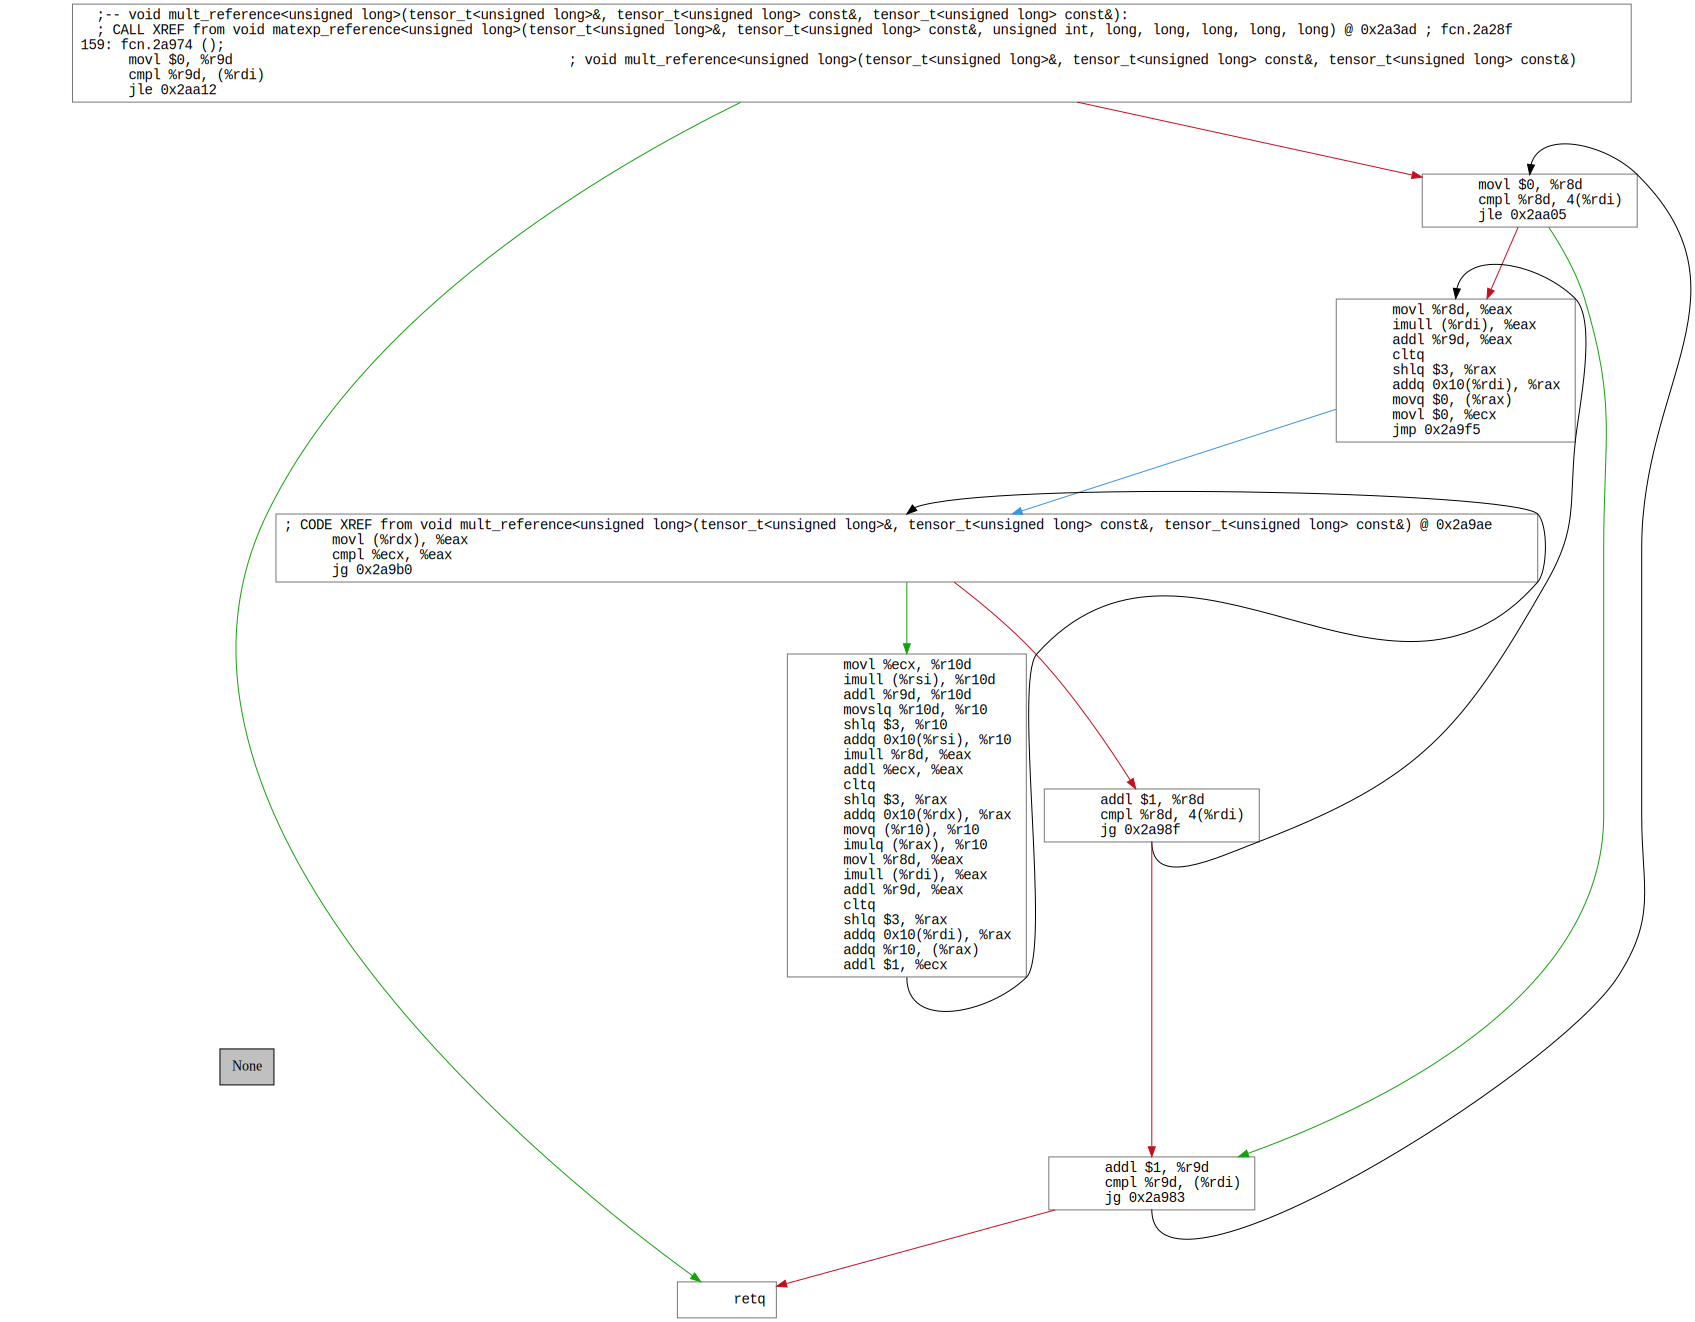

In [95]:
do_cfg("matexp.exe", symbol="sym.void_mult_reference_unsigned_long__tensor_t_unsigned_long___tensor_t_unsigned_long__const__tensor_t_unsigned_long__const_" , output="matexp4.png")

It's probably a bit of a mess.  I suggest copying it, downloading it, or opening it in it's own tab.

### Profiling 

Profiling can be valuable tool in figuring out where your code is spending time.  

To profile your allocator, you need to recompile it with profiling enabled:

**NOTE:** Don't forget to rebuild without `GPROF=yes`. BUilding in support for gprof will slow down your code a bit.

In [96]:
!make clean matexp.exe GPROF=yes 

rm -rf build/ .tmp
rm: cannot remove 'build/': Directory not empty
/cse142L/cse141pp-archlab/cse141.make:78: recipe for target '_lab-clean' failed
make: [_lab-clean] Error 1 (ignored)
************************* UNABLE TO DELETE build/ Clean unsuccessful ******************************
 Here's what's in build:
build/:
total 481
drwxr-xr-x 2 snikfar root       3 Aug 26 19:47 .
drwxr-xr-x 8 snikfar root     121 Aug 26 19:47 ..
-rwxr-xr-x 1 snikfar root 1075904 Aug 26 18:55 .nfs000000001a018be90000043c
If there's a 'build/.nsf*', you'll need to rename 'build' to 'junk'.  Then 'make clean' will succeed
rm -rf *.gv *-gv.pdf *.pin-trace #*.csv 
rm -rf *.exe *.o *.i *.s *.out *.d *.gcda *.gcno *.gprof *.gcov *.csv.raw core	
rm -rf 
mkdir -p build/
cp matexp_main.cpp build/matexp_main.cpp 
gcc-8 -c -Wall -Werror -g -pg   -fPIC -pthread    -O3 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse

You'll need to profile one type of benchmark at a time.  just run one of the lines below at a time.  For good accuracy, you should profile in the cloud.  

Think carefully about to profile:

1.  It's not a bad idea to profile the whole benchark, but it can be a bit hard to interpret the results, because there's a lot going on.
2.  The results are sometimes clearer if you focus on just one test case.
3.  Make sure you run a large enough test so that `matexp.exe` spends the vast majority of its time in your code.  This can be surprisingly large: `--size 600` is a good place start.

Here's how to profile in the cloud:

In [97]:
!cse142 job run --lab caches2 --take matexp.exe --force "./matexp.exe --MHz 3500 --function bench_reference; gprof ./matexp.exe > gprof.out"
!cat gprof.out

You are submitting a job for lab "Lab 4: Caches II" (caches2).
The due date for Lab 4: Caches II has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job 66607b71-216e-4ad4-a348-7fb199bbf168 0.00 0.00
Ready for submission. 2.61 2.61
Job 66607b71-216e-4ad4-a348-7fb199bbf168 is in state 'PUBLISHED'. 3.73 6.33 
Job 66607b71-216e-4ad4-a348-7fb199bbf168 is in state 'RUNNING'. 1.05 7.38......................................... 
Job 66607b71-216e-4ad4-a348-7fb199bbf168 is in state 'DONE_RUNNING'. 43.91 51.29.. 
Job 66607b71-216e-4ad4-a348-7fb199bbf168 succeeded. 3.14 54.43Writing results 1.00 55.43
registering function: bench_solution
registering function: bench_reference
registering function: matexp_reference_c
registering function: matexp_solution_c
Loading Native engine.
Gonna run bench_reference
Running bench_reference
.
Updated these files: ./

The output is a big for Jupyter Notebook.  In a terminal you can do:

```
less -S gprof.out

```

Which will let you look at the file without wrapped lines.

You may notice some unfamiliar functions.  Here's what some of them are:

1.  `nlohmann::basic*`: This is a json library.  If you spend much time here, you aren't running a large enough test case.
2.  `boost::*` or `OptionSpec` various utilities for command line parsing and parameter passing.  Again, if you see this, run a larger test case.
3.  `mcount` is the gprof instrumentation function.  It gets called a lot, but it's not there.

Another problem you may run into:  the compiler may inline everything so all the time is one function.  This is not very informative.  You can get around by turning off inlining:

In [98]:
!make clean matexp.exe GPROF=yes OPTIMIZE="-O3"
!cse142 job run --lab caches2 --force "./matexp.exe --MHz 3500 --function matexp_solution_c --size 350 --power 10; gprof -l ./matexp.exe > gprof.out" # Run one test

rm -rf build/ .tmp
rm: cannot remove 'build/.nfs000000001a018be90000043c': Device or resource busy
/cse142L/cse141pp-archlab/cse141.make:78: recipe for target '_lab-clean' failed
make: [_lab-clean] Error 1 (ignored)
************************* UNABLE TO DELETE build/ Clean unsuccessful ******************************
 Here's what's in build:
build/:
total 481
drwxr-xr-x 2 snikfar root       3 Aug 26 19:48 .
drwxr-xr-x 8 snikfar root     115 Aug 26 19:48 ..
-rwxr-xr-x 1 snikfar root 1075904 Aug 26 18:55 .nfs000000001a018be90000043c
If there's a 'build/.nsf*', you'll need to rename 'build' to 'junk'.  Then 'make clean' will succeed
rm -rf *.gv *-gv.pdf *.pin-trace #*.csv 
rm -rf *.exe *.o *.i *.s *.out *.d *.gcda *.gcno *.gprof *.gcov *.csv.raw core	
rm -rf 
mkdir -p build/
cp matexp_main.cpp build/matexp_main.cpp 
gcc-8 -c -Wall -Werror -g -pg   -fPIC -pthread    -O3 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE1

In [99]:
!cat gprof.out

Flat profile:

Each sample counts as 0.01 seconds.
  %   cumulative   self              self     total           
 time   seconds   seconds    calls  Ts/call  Ts/call  name    
 68.28      1.55     1.55                             void mult_fast<unsigned long>(tensor_t<unsigned long>&, tensor_t<unsigned long> const&, tensor_t<unsigned long> const&, long, long, long, long, long) (matexp_solution.hpp:154 @ 2b8e6)
  7.49      1.72     0.17                             void do_mult<unsigned long>(tensor_t<unsigned long>&, tensor_t<unsigned long> const&, tensor_t<unsigned long> const&, long, long, long, long, long) (tensor_t.hpp:145 @ 2b8be)
  5.29      1.84     0.12                             void mult_fast<unsigned long>(tensor_t<unsigned long>&, tensor_t<unsigned long> const&, tensor_t<unsigned long> const&, long, long, long, long, long) (matexp_solution.hpp:154 @ 2b889)
  4.41      1.94     0.10                             void mult_fast<unsigned long>(tensor_t<unsigned long>&, tensor_t

You might notice that performance drops significantly!  The resulting profile has more detail, but it's also not as accurate a reflection of your real program.  However, it can provide useful guidance about where you code is spending time.  YOu have to be careful though

### Debugging 

Your code will certainly have errors in it, and you'll need to debug.  THe first thing you need to do is to tone down the optimizations, because they make debugging almost impossible.  Recall that `-Og` is the right flag to use for optimization while debugging:

In [100]:
!make clean matexp.exe OPTIMIZE="-Og"

rm -rf build/ .tmp
rm: cannot remove 'build/.nfs000000001a018be90000043c': Device or resource busy
/cse142L/cse141pp-archlab/cse141.make:78: recipe for target '_lab-clean' failed
make: [_lab-clean] Error 1 (ignored)
************************* UNABLE TO DELETE build/ Clean unsuccessful ******************************
 Here's what's in build:
build/:
total 481
drwxr-xr-x 2 snikfar root       3 Aug 26 19:49 .
drwxr-xr-x 8 snikfar root     115 Aug 26 19:49 ..
-rwxr-xr-x 1 snikfar root 1075904 Aug 26 18:55 .nfs000000001a018be90000043c
If there's a 'build/.nsf*', you'll need to rename 'build' to 'junk'.  Then 'make clean' will succeed
rm -rf *.gv *-gv.pdf *.pin-trace #*.csv 
rm -rf *.exe *.o *.i *.s *.out *.d *.gcda *.gcno *.gprof *.gcov *.csv.raw core	
rm -rf 
mkdir -p build/
cp matexp_main.cpp build/matexp_main.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -Og -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141p

Unfortunately, the Linux debugger `gdb` doesn't work inside the note book.  If you want to use it, you can do so at the terminal:

```
$ gdb matexp.exe
GNU gdb (Ubuntu 8.1.1-0ubuntu1) 8.1.1
Copyright (C) 2018 Free Software Foundation, Inc.
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.  Type "show copying"
and "show warranty" for details.
This GDB was configured as "x86_64-linux-gnu".
Type "show configuration" for configuration details.
For bug reporting instructions, please see:
<http://www.gnu.org/software/gdb/bugs/>.
Find the GDB manual and other documentation resources online at:
<http://www.gnu.org/software/gdb/documentation/>.
For help, type "help".
Type "apropos word" to search for commands related to "word"...
Reading symbols from matexp.exe...rdone.
(gdb) run --function matexp_solution_c --size 30 --power 3
Starting program: /cse142L/labs/CSE141pp-Lab-Caches-II/matexp.exe --function matexp_solution_c --size 30 --power 3
warning: Error disabling address space randomization: Operation not permitted
[Thread debugging using libthread_db enabled]
Using host libthread_db library "/lib/x86_64-linux-gnu/libthread_db.so.1".
registering function: bench_solution
registering function: bench_reference
registering function: matexp_reference_c
registering function: matexp_solution_c
Loading Native engine.
Gonna run matexp_solution_c
Running matexp_solution_c
.
[Inferior 1 (process 61156) exited normally]
(gdb)
```

The best place to start is at `matexp_solution_c`.  From there you can step into your solution code.

```
bash$ gdb alloc_main.exe
(gdb) break matexp_solution_c
(gdb) run --function matexp_solution_c --size 100  --power 2
(gdb) list
```

Sometimes that will note give a good result, even without optimizations.  Instead, you can set a break point at a line number:

```
bash$ gdb alloc_main.exe
(gdb) break matexp_solution.hpp:47
(gdb) run --function matexp_solution_c --size 100  --power 2
(gdb) list
```

There's a pretty good `gdb` [tutorial here](https://www.cs.cmu.edu/~gilpin/tutorial/).

### Tracing With Moneta

Moneta was originally built specifically to help with visualizing cache tiling optimizations.  Here's a few tips for getting good results:

1.  Datahub can only handle traces with about 10 million memory operations, so keep the test cases small. `--size 60` is good.
2.  Use the code in `matexp_reference.hpp` as a guide for how to tag the matrices.
3.  Click on "Accesses layers" in the trace viewer to see which tags are which.
4.  Click on "None" next to the gold square and select "misses-all" to see where the misses are.
5.  Click on "tags" and then click on the check boxes to show and hide tags.


In [101]:
!make clean matexp.exe 
!mtrace --memops 10000000 -- ./matexp.exe --size 60 --power 2 --function matexp_reference_c --p1 1 --p2 1 --p3 1 --p5 1

rm -rf build/ .tmp
rm: cannot remove 'build/.nfs000000001a018be90000043c': Device or resource busy
/cse142L/cse141pp-archlab/cse141.make:78: recipe for target '_lab-clean' failed
make: [_lab-clean] Error 1 (ignored)
************************* UNABLE TO DELETE build/ Clean unsuccessful ******************************
 Here's what's in build:
build/:
total 481
drwxr-xr-x 2 snikfar root       3 Aug 26 19:49 .
drwxr-xr-x 8 snikfar root     112 Aug 26 19:49 ..
-rwxr-xr-x 1 snikfar root 1075904 Aug 26 18:55 .nfs000000001a018be90000043c
If there's a 'build/.nsf*', you'll need to rename 'build' to 'junk'.  Then 'make clean' will succeed
rm -rf *.gv *-gv.pdf *.pin-trace #*.csv 
rm -rf *.exe *.o *.i *.s *.out *.d *.gcda *.gcno *.gprof *.gcov *.csv.raw core	
rm -rf 
mkdir -p build/
cp matexp_main.cpp build/matexp_main.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -O3 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141p

In [ ]:
show_trace("./trace_0",  show_tag=["dst", "B", "A"], layer_preset=["None", "dst", "B", "A"])

## Final Measurement

When you are done, make sure your best allocator is called `matexp_solution()` in `matexp_solution.hpp`.  Your code will be invoked with `--p1` to `--p5` equal to 1, so you'll need to "bake in" the optimal values for those parameters.

Then you can submit your code to the Gradescope autograder.  It will run the commands given above and use the `ET` values from `autograde.csv` to assign your grade.

Your grade is based on your speed up relative `matexp_reference.hpp` on three benchmarks. 

For each of them, there's a target speedup given in the table.  You get a score for each benchmark between 0 and 33.3, and the overall score is the sum of these scores.  For each function, the score is compute as `your_speedup/target_speedup * 33.3`.

For this lab, you don't get extra credit for beating the targets.  This will help ensure that your design in balanced:  You much do well at all 3 benchmarks to do well on the lab.

To get points, your code must also be correct.  The autograder will run the regressions in `run_tests.exe` to check it's correctness.

You can mimic exactly what the autograder will do with the command below.  You can run the cell below to list them and the target speedups.

After you run it, the results will be in `autograde/autograde.csv` rather than `./bench.csv`.  This command builds and runs your code in a more controlled way by doing the following:

1.  Ignores all the files in your repo except `matexp_solution.hpp` and `config.make`.
2.  Copies those files into a clean clone of the starter repo.
3.  Builds `matexp.exe` from scratch.
4.  And then runs the commands the benchmarks.
5.  It then runs the `autograde.py` script to compute your grade.

Running the cell does just what the Gradescope autograder does.  And the cell below shows the name and target speedups for each benchmark.  This takes 1-2 minutes to run.


<div class="alert alert-block alert-danger">

**Only Gradescope Counts** The scores produced here **do not** count.  Only gradescope counts.  The results here should match what Gradescope does, but I would test your solution on Gradescope well-ahead of the deadline to ensure your code is working like you expect.
    
</div>

<div class="alert alert-block alert-danger">

**The autograder doesn't pass parameters**  The autograder will not pass any `-p*` parameters to your code.   You'll need to set it up so the default value (1 for all the `--p*` arguments) configures your code in the best way possible.
    
</div>


In [ ]:
!make matexp.exe
!cse142 job run --take matexp_solution.hpp --take config.make --lab caches2-bench --force  autograde

make: 'matexp.exe' is up to date.
You are submitting a job for lab "Lab 4: Caches II (Benchmark)" (caches2-bench).
The due date for Lab 4: Caches II (Benchmark) has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
You are running a autograde job.  Here's what will get run:
  git clone --branch main https://github.com/CSE142/su22-CSE142L-caches2-starter.git autograde
  make -C autograde copy-files LAB_SUBMISSION_DIR=. autograde
The outputs will appear in the 'autograde' directory.  Check STUDENT_EDITABLE_FILES in Makefile to see what source files will be copied over.
Creating job c65d2450-36e8-4842-98e9-bc18f5bdf329 0.00 0.00
Ready for submission. 2.30 2.30
Job c65d2450-36e8-4842-98e9-bc18f5bdf329 is in state 'PUBLISHED'. 1.94 4.25 
Job c65d2450-36e8-4842-98e9-bc18f5bdf329 is in state 'RUNNING'. 1.04 5.29...............................................

And run the autograder

In [ ]:
!./autograde.py --submission autograde --results autograde.json
from autograde import compute_all_scores
df = compute_all_scores(dir="autograde")
display(df)
print(f"total points: {round(sum(df['capped_score']), 2)}")

The "capped_score" column contains the number of points you'll receive.

And see the autograder's output like this:

In [ ]:
render_code("autograde.json")

Most of it is internal stuff that gradscope needs, but the key parts are the `score`, `max_score`, and `output` fields.

All that's left is commit your code:

In [ ]:
!git commit -am "Solution to the lab."
!git push

If `git push` asks for your username, you'll need to push from the command line.

If `git commit` tells you have uncommitted files, that's not a problem. 

If `git commit` tell you something like:

```
*** Please tell me who you are.

Run

git config --global user.email "you@example.com"
git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'prcheng@dsmlp-jupyter-prcheng.(none)')
Warning: Permanently added the RSA host key for IP address '140.82.112.3' to the list of known hosts.
Everything up-to-date
```

Then you can do (but fill in your @ucsd.edu email and your name):

In [ ]:

!git config --global user.email "snikfar@ucsd.edu"
!git config --global user.name "Shayan Nikfar"

# Recap

This lab completes our tour of (single processor) memory systems.  It explored what's required to exploit temporal locality and when it does and does not exist.  It also looked at other key components of the memory hierarchy:  The lower-level caches and the TLB.   Finally, it developed an optimized version of 1-D convolution using tiling and renesting, and you got to apply those concepts to computing $M^p$.  You should now be well-prepared for the next lab, where we will explore (among other things) how multiple processors further-complicate the performance of the memory hierarchy.

# Turning In the Lab

For each lab, there are two different assignments on gradescope:

1.  The lab notebook.
2.  The programming assignment.

There's also a pre-lab reading quiz on Canvas and a post-lab survey which is embedded below.

## If You Have Trouble

If it's near the deadline and you are having trouble turning in any part of your lab, you can fill out this form: https://forms.gle/ThHjESfbZRqqztXUA to let us know what's going on and provide us access to the work you have done prior to the deadline.

<div class="alert alert-block alert-danger">

**NOTE:** Filling out the form above _before_ the deadline is the _only_ mechanism available to receive credit without turning in the assignment on time.
    
</div>

If it's more than a day before the deadline, you can reach out via Piazza and hopefully we can get it sorted out.


## Reading Quiz

The reading quiz is an online assignment on Canvas.  It's due before the class when we will assign the lab.

## The Note Book

You need to turn in your lab notebook and your programming assignment separately. 

After you complete the lab, you will turn it in by creating a version of the notebook that only contains your answers and then printing that to a pdf.

**Step 1:**  Save your workbook!!!

In [ ]:
!for i in 1 2 3 4 5; do echo Save your notebook!; sleep 1; done

**Step 2:**  Run this command:

In [ ]:
!turnin-lab Lab.ipynb
!ls -lh Lab.turnin.ipynb

The date in the above file listing should show that you just created `Lab.turnin.ipynb`

**Step 3:**  Click on this link to open it: [./Lab.turnin.ipynb](./Lab.turnin.ipynb)

**Step 4:**  Hide the table of contents by clicking the

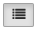

**Step 5:**  Select "Print" from _your browser's_ "file" menu.  Print directly to a PDF.

**Step 6:**  Make sure all your answers are visible and not cut off the side of the page.

**Step 7:**  Turn in that PDF via gradescope.

<div class="alert alert-block alert-danger">

**Print Carefully** It's important that you print directly to a PDF.  In particular, you should _not_ do any of the following:
    
1. **Do not** select "Print Preview" and then print that. (Remarkably, this is not the same as printing directly, so it's not clear what it is a preview of)
2. **Do not** select `Download as-> PDF via LaTex.  It generates nothing useful.
    
</div>

In gradescope, you'll need to show us where all your answers are.  Please do this carefully, if we can't find your answer, we can't grade it.

## The Programming Assignment

You'll turn in your programming assignment by providing gradescope with your github repo.   It'll run the autograder and return the results.

## Lab Survey

Please fill out this survey when you've finished the lab.  You can only submit once.  Be sure to press "submit", your answers won't be saved in the notebook.

In [63]:
from IPython.display import IFrame    
IFrame('https://docs.google.com/forms/d/1xIYT16NuMV_ocYWY3ttDuoR01yt4if63mOviZRyAUXg/', width=800, height=2000)


Ignore this.

# My Notes

In [ ]:
from notebook import *
def plot_consistency(file_list, bins=10, groupby="label", FOM="ET"):
    """
    Take a list of CSV files, group them by a column, and measure te consistency of FOM.
    
    Use with run_consistency.sh and run_canary.sh check the reproducibility of results. 
    """

    df = render_csv(file_list)
    g = df.groupby(by=groupby)
    g.hist(column=FOM, bins=bins)
    mean = g.mean(numeric_only=True)[FOM]
    max = g.max(numeric_only=True)[FOM]
    min = g.min(numeric_only=True)[FOM]
    std = g.std()[FOM]
    print(f"N = {len(df)/len(std)}")
    print("MEAN:")
    display(mean)
    print("STD:")
    display(std)
    error = std/mean
    print("STD/mean:")
    display(error)
    print("max-min/mean:")
    display((max - min)/(mean))
    return g.mean(numeric_only=True).copy()

plot_consistency("consistency/scores-*.csv", bins=100)

In [ ]:

!make matexp.exe
!cse142 job run --lab caches2 --take ./matexp.exe --take L1.cfg  --force "./matexp.exe --MHz 3500 --stat-set ./L1.cfg --stats 120-big.csv --function matexp_solution_c --size 120 --power 2 --p1 1 5 10 15 20 25 30 35 40 45 55 60 65 70 75 80 85 90 95 100 200 300 400 500 600 --p2 1 --p3 1  --p4 1 --p5 1"

In [ ]:
df=render_csv(["stats.csv", "big.csv"])
display(df)
plotPE(df=df, lines=True, what=[("p1", "L1_cache_misses"), ("p1", "ET"), ("p1", "L1_MPI"), ("p1", "IC"), ("p1", "CT")])

In [ ]:
df=render_csv("120-big.csv")
display(df)
plotPE(df=df, lines=True, what=[("p1", "L1_cache_misses"), ("p1", "ET"), ("p1", "L1_MPI"), ("p1", "IC"), ("p1", "CT")])

In [ ]:
df=render_csv("320-big.csv")
display(df)
plotPE(df=df, lines=True, what=[("p1", "L1_cache_misses"), ("p1", "ET"), ("p1", "L1_MPI"), ("p1", "IC"), ("p1", "CT")])

In [ ]:
plotPE(df=df, lines=True, what=[("p1", "L1_cache_misses"), ("p1", "ET"), ("p1", "L1_MPI"), ("p1", "IC"), ("p1", "CT")])

In [ ]:

!make matexp.exe
!cse142 job run --lab caches2 --take ./matexp.exe --take L1.cfg  --force "./matexp.exe --MHz 3500 --stat-set ./L1.cfg --stats i-on-inside.csv --function bench_solution --p1 1 --p2 1 --p3 1  --p4 0 1 2 --p5 0 1"

In [ ]:
data = render_csv("stats.csv")
data

In [ ]:
t = [(3.19,2.2),(7.52,3.5),(2.9,18.5)]

In [ ]:
base, speedups = zip(*t)

In [ ]:
base

In [ ]:
data["target_speedups"] = speedups *6
data["base"] = base*6
data["speedup"] = data["base"]/data["ET"]
data["score"] = data["speedup"]/data["target_speedups"] *33
data["score"] = data["score"].apply(lambda x: round(x,2))

In [ ]:
data["exp"] = data["p4"].apply(lambda x: ["baseline", "opt", "unopt"][x])
data["mult"] = data["p5"].apply(lambda x: ["linear", "binary"][x])

data[["p4", "p5", "exp", "mult","ET", "size", "power","base", "target_speedups", "speedup", "score"]]

In [ ]:
t=data.groupby(by=["exp", "mult"]).sum().copy()
t["exp"] = list(zip(*t.index))[1]
t["opt"] = list(zip(*t.index))[0]

In [ ]:
t.index=range(0,len(t))
t[["exp", "opt", "score"]]

In [ ]:
t.index=range(0,len(t))
t[["exp", "opt", "score"]]

###### 